In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 500

In [25]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Basic stats - 1\Basic stats - 1\Sales_data_with_discounts.csv")
df

Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        12100             181500          11.654820     21153.498820   
1        10100             101000          11.560498     11676.102961   
2        16100             112700           9.456886     10657.910157   
3        20100             120600           6.935385      8364.074702   
4         8100              24300          17.995663      4372.946230   
..         ...                ...                ...              ...   
445       1300               2600          15.475687       402.367873   
446       2600              15600          17.057027      2660.896242   
447       1600               3200          18.965550       606.897606   
448       1900               5700          16.793014       957.201826   
449       3100               3100          15.333300       475.332295   

     Net Sales Value  
0      160346.501180  
1       89323.897039  
2      102042.089843  
3      112235.925298  
4       19927.053770  
..               ...  
445      2197.632127  
446     12939.103758  
447      2593.102394  
448      4742.798174  
449      2624.667705  

[450 rows x 13 columns]

In [30]:
#Identify numerical columns in the dataset.
numerical = df.select_dtypes(include=['number']).columns
numerical

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [41]:
#Calculate the mean, median, mode, and standard deviation for these columns.
statistics = df[numerical].describe().T
statistics['mode'] = df[numerical].mode().iloc[0]
statistics['median'] = df[numerical].median()
statistics

count          mean           std         min          25%  \
Volume             450.0      5.066667      4.231602    1.000000     3.000000   
Avg Price          450.0  10453.433333  18079.904840  290.000000   465.000000   
Total Sales Value  450.0  33812.835556  50535.074173  400.000000  2700.000000   
Discount Rate (%)  450.0     15.155242      4.220602    5.007822    13.965063   
Discount Amount    450.0   3346.499424   4509.902963   69.177942   460.459304   
Net Sales Value    450.0  30466.336131  46358.656624  326.974801  2202.208645   

                           50%           75%            max          mode  \
Volume                4.000000      6.000000      31.000000      3.000000   
Avg Price          1450.000000  10100.000000   60100.000000    400.000000   
Total Sales Value  5700.000000  53200.000000  196400.000000  24300.000000   
Discount Rate (%)    16.577766     18.114718      19.992407      5.007822   
Discount Amount     988.933733   5316.495427   25738.022194     69.177942   
Net Sales Value    4677.788059  47847.912852  179507.479049    326.974801   

                        median  
Volume                4.000000  
Avg Price          1450.000000  
Total Sales Value  5700.000000  
Discount Rate (%)    16.577766  
Discount Amount     988.933733  
Net Sales Value    4677.788059

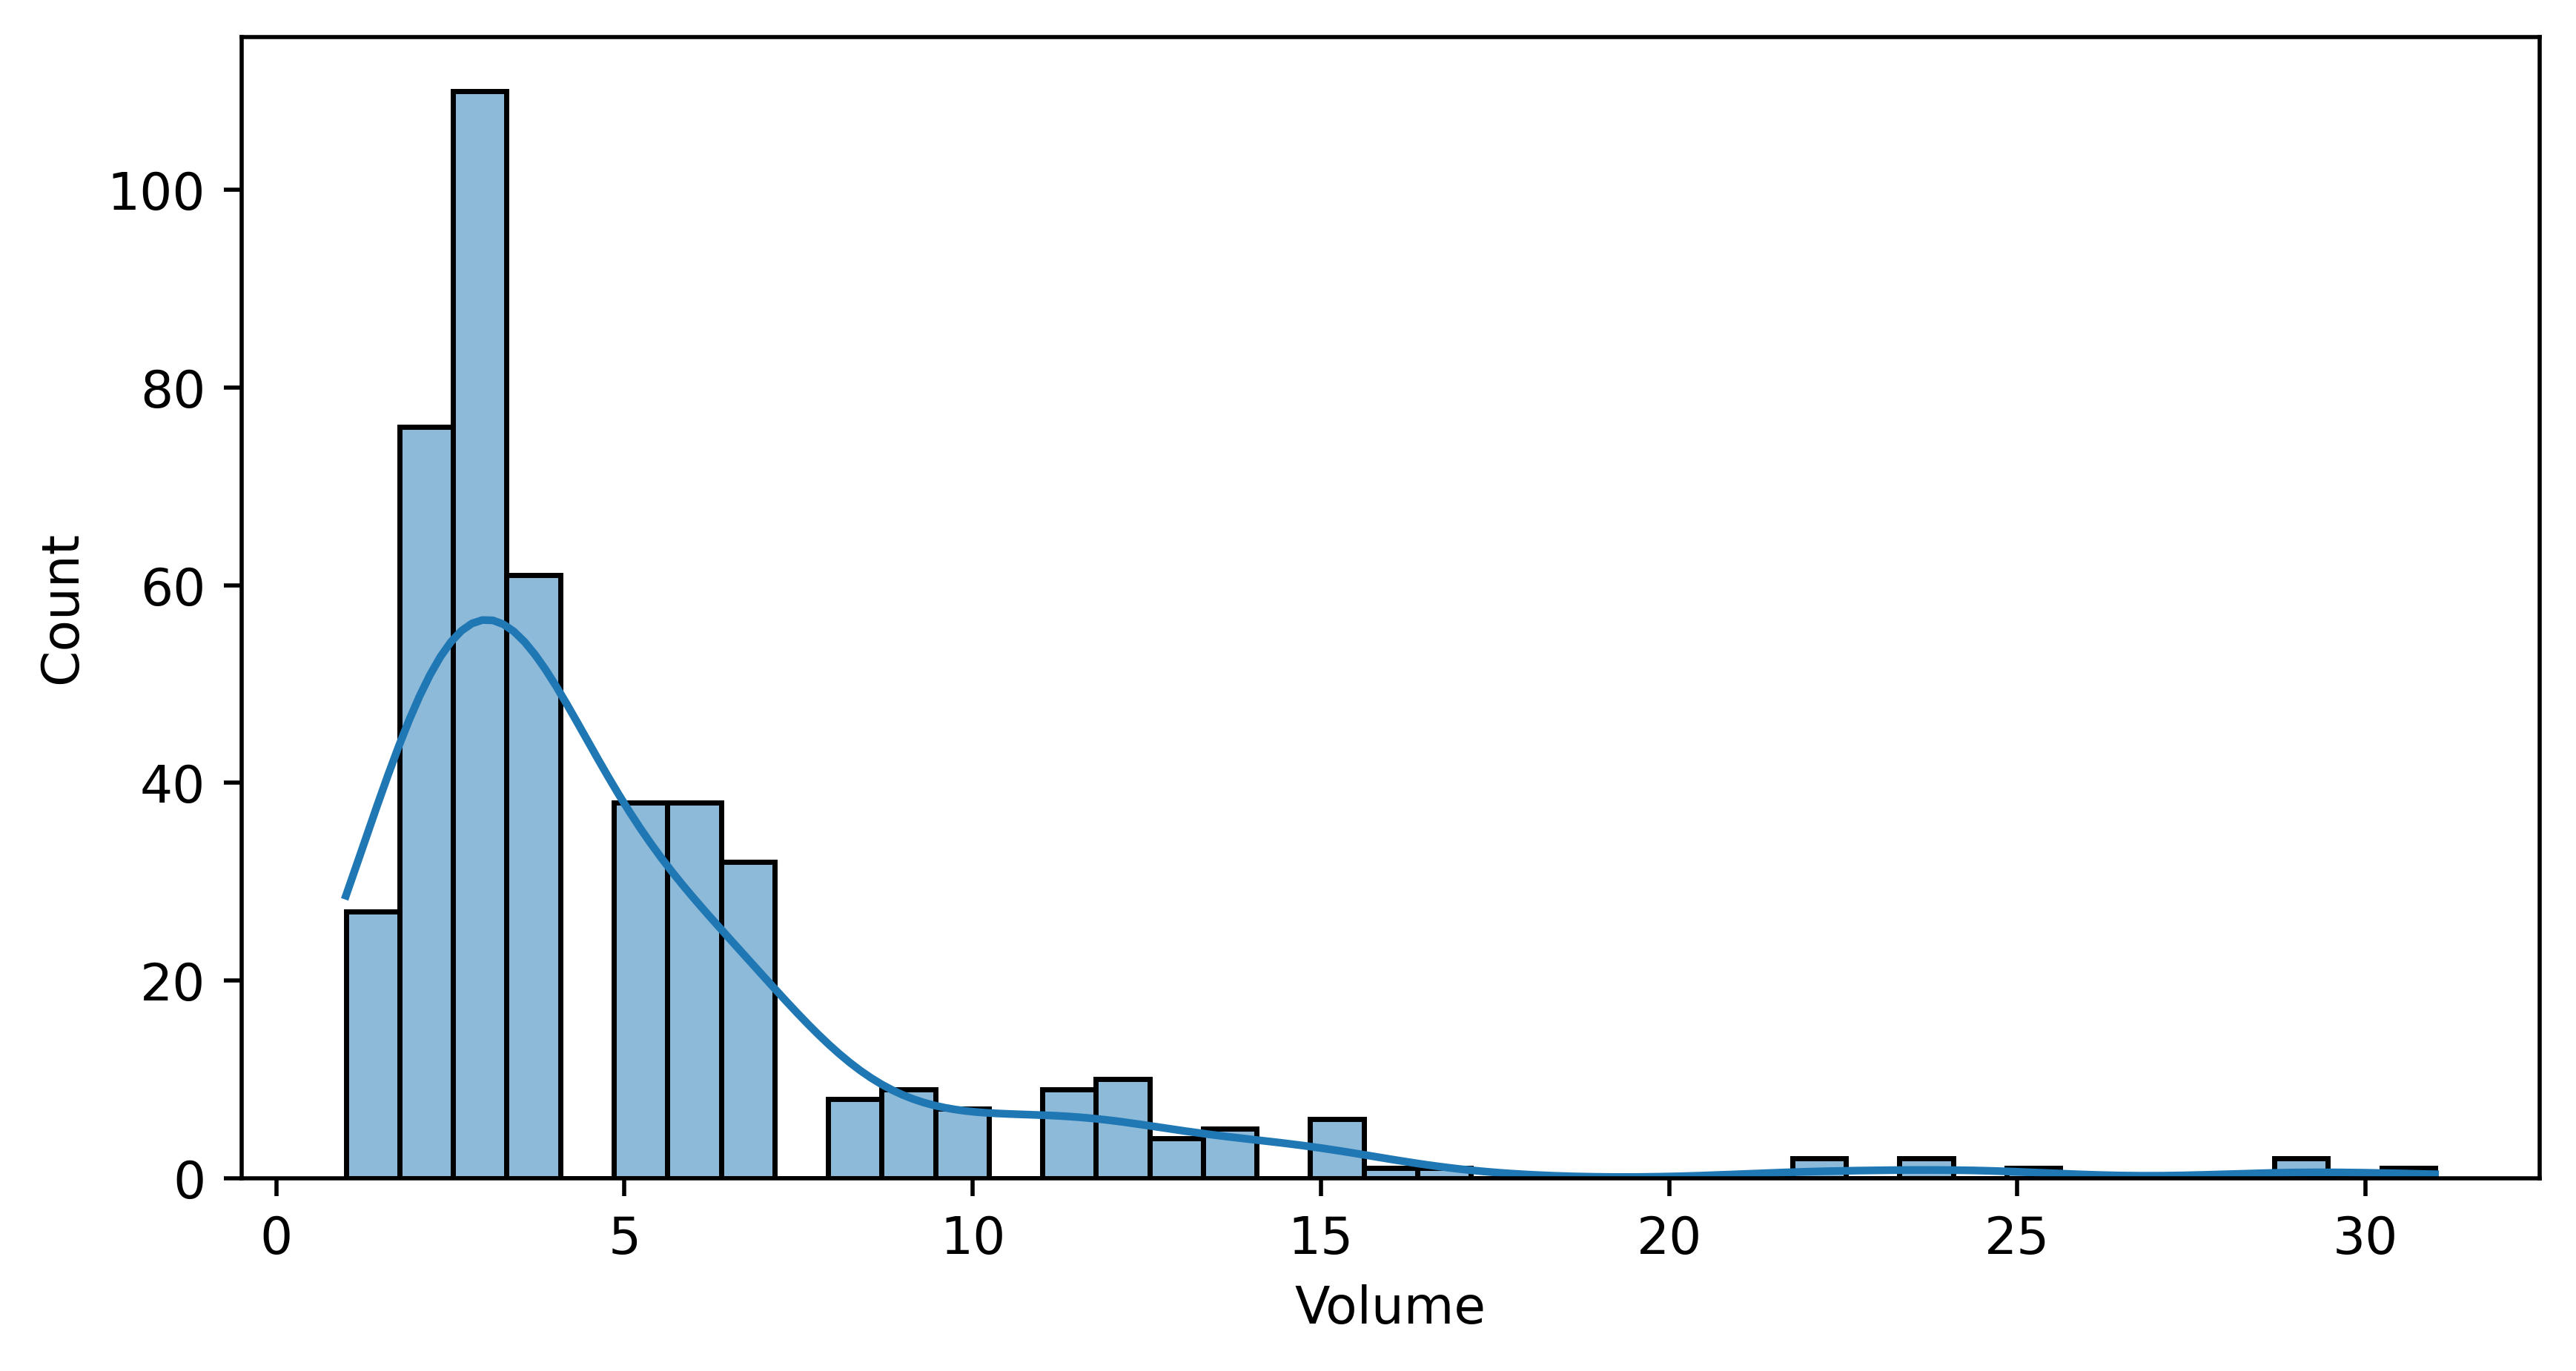

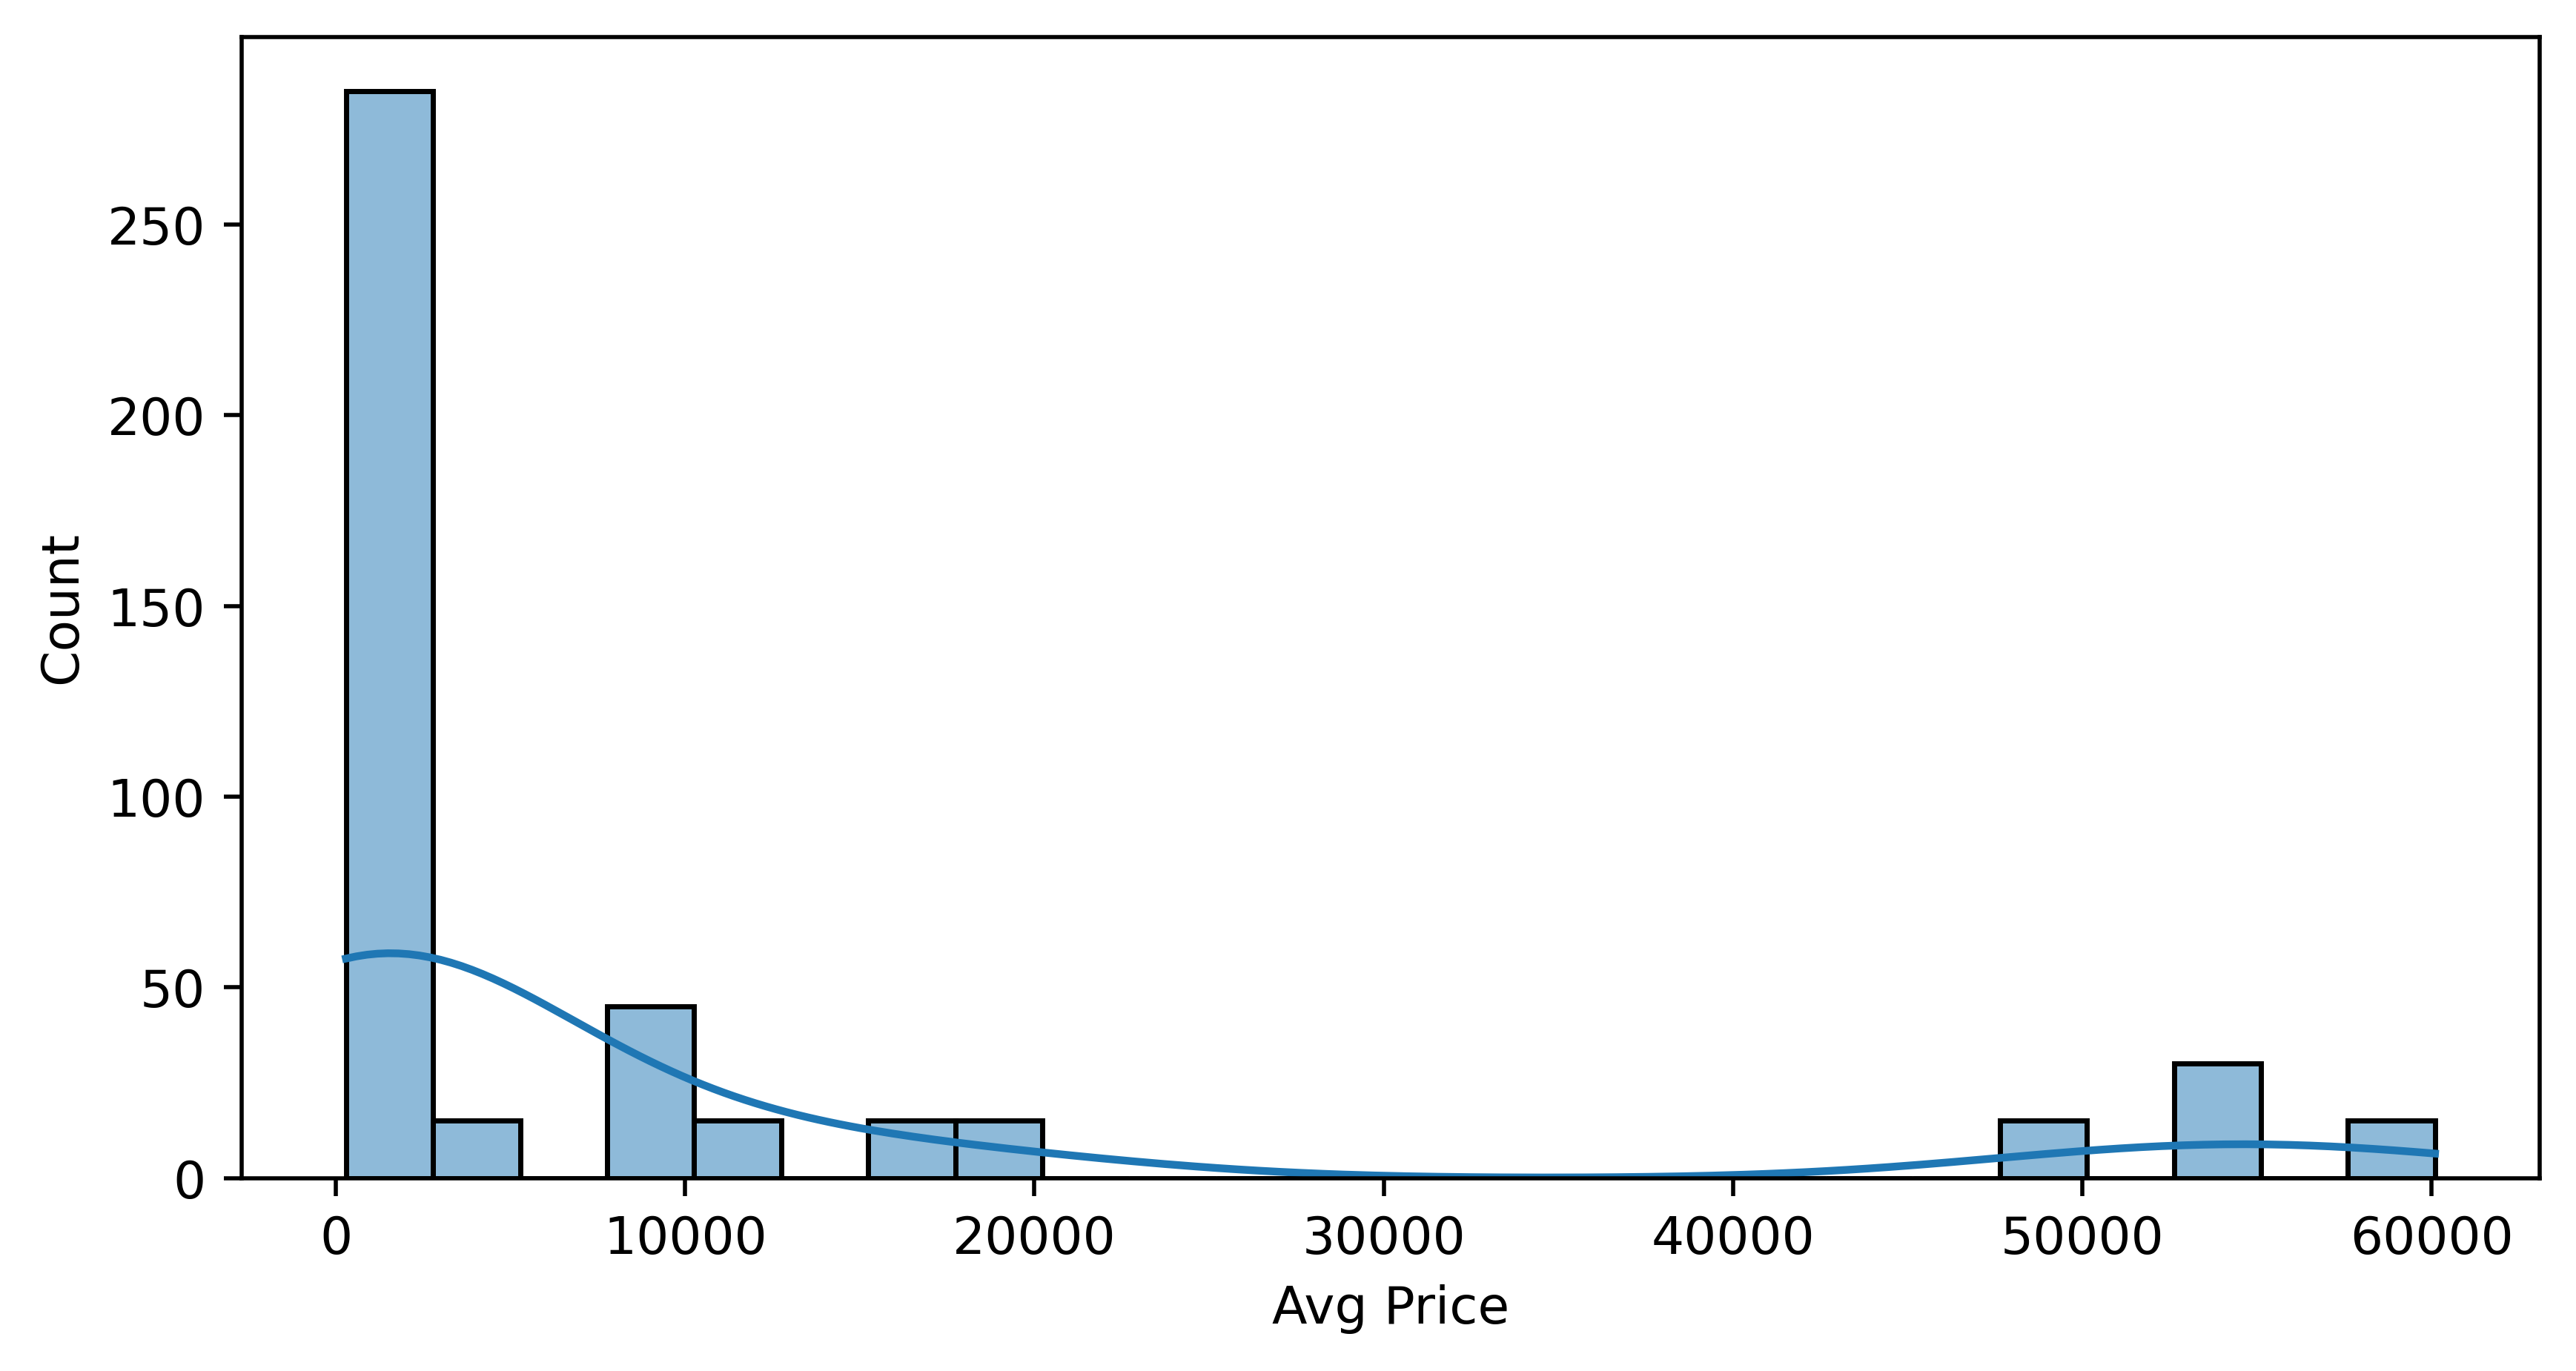

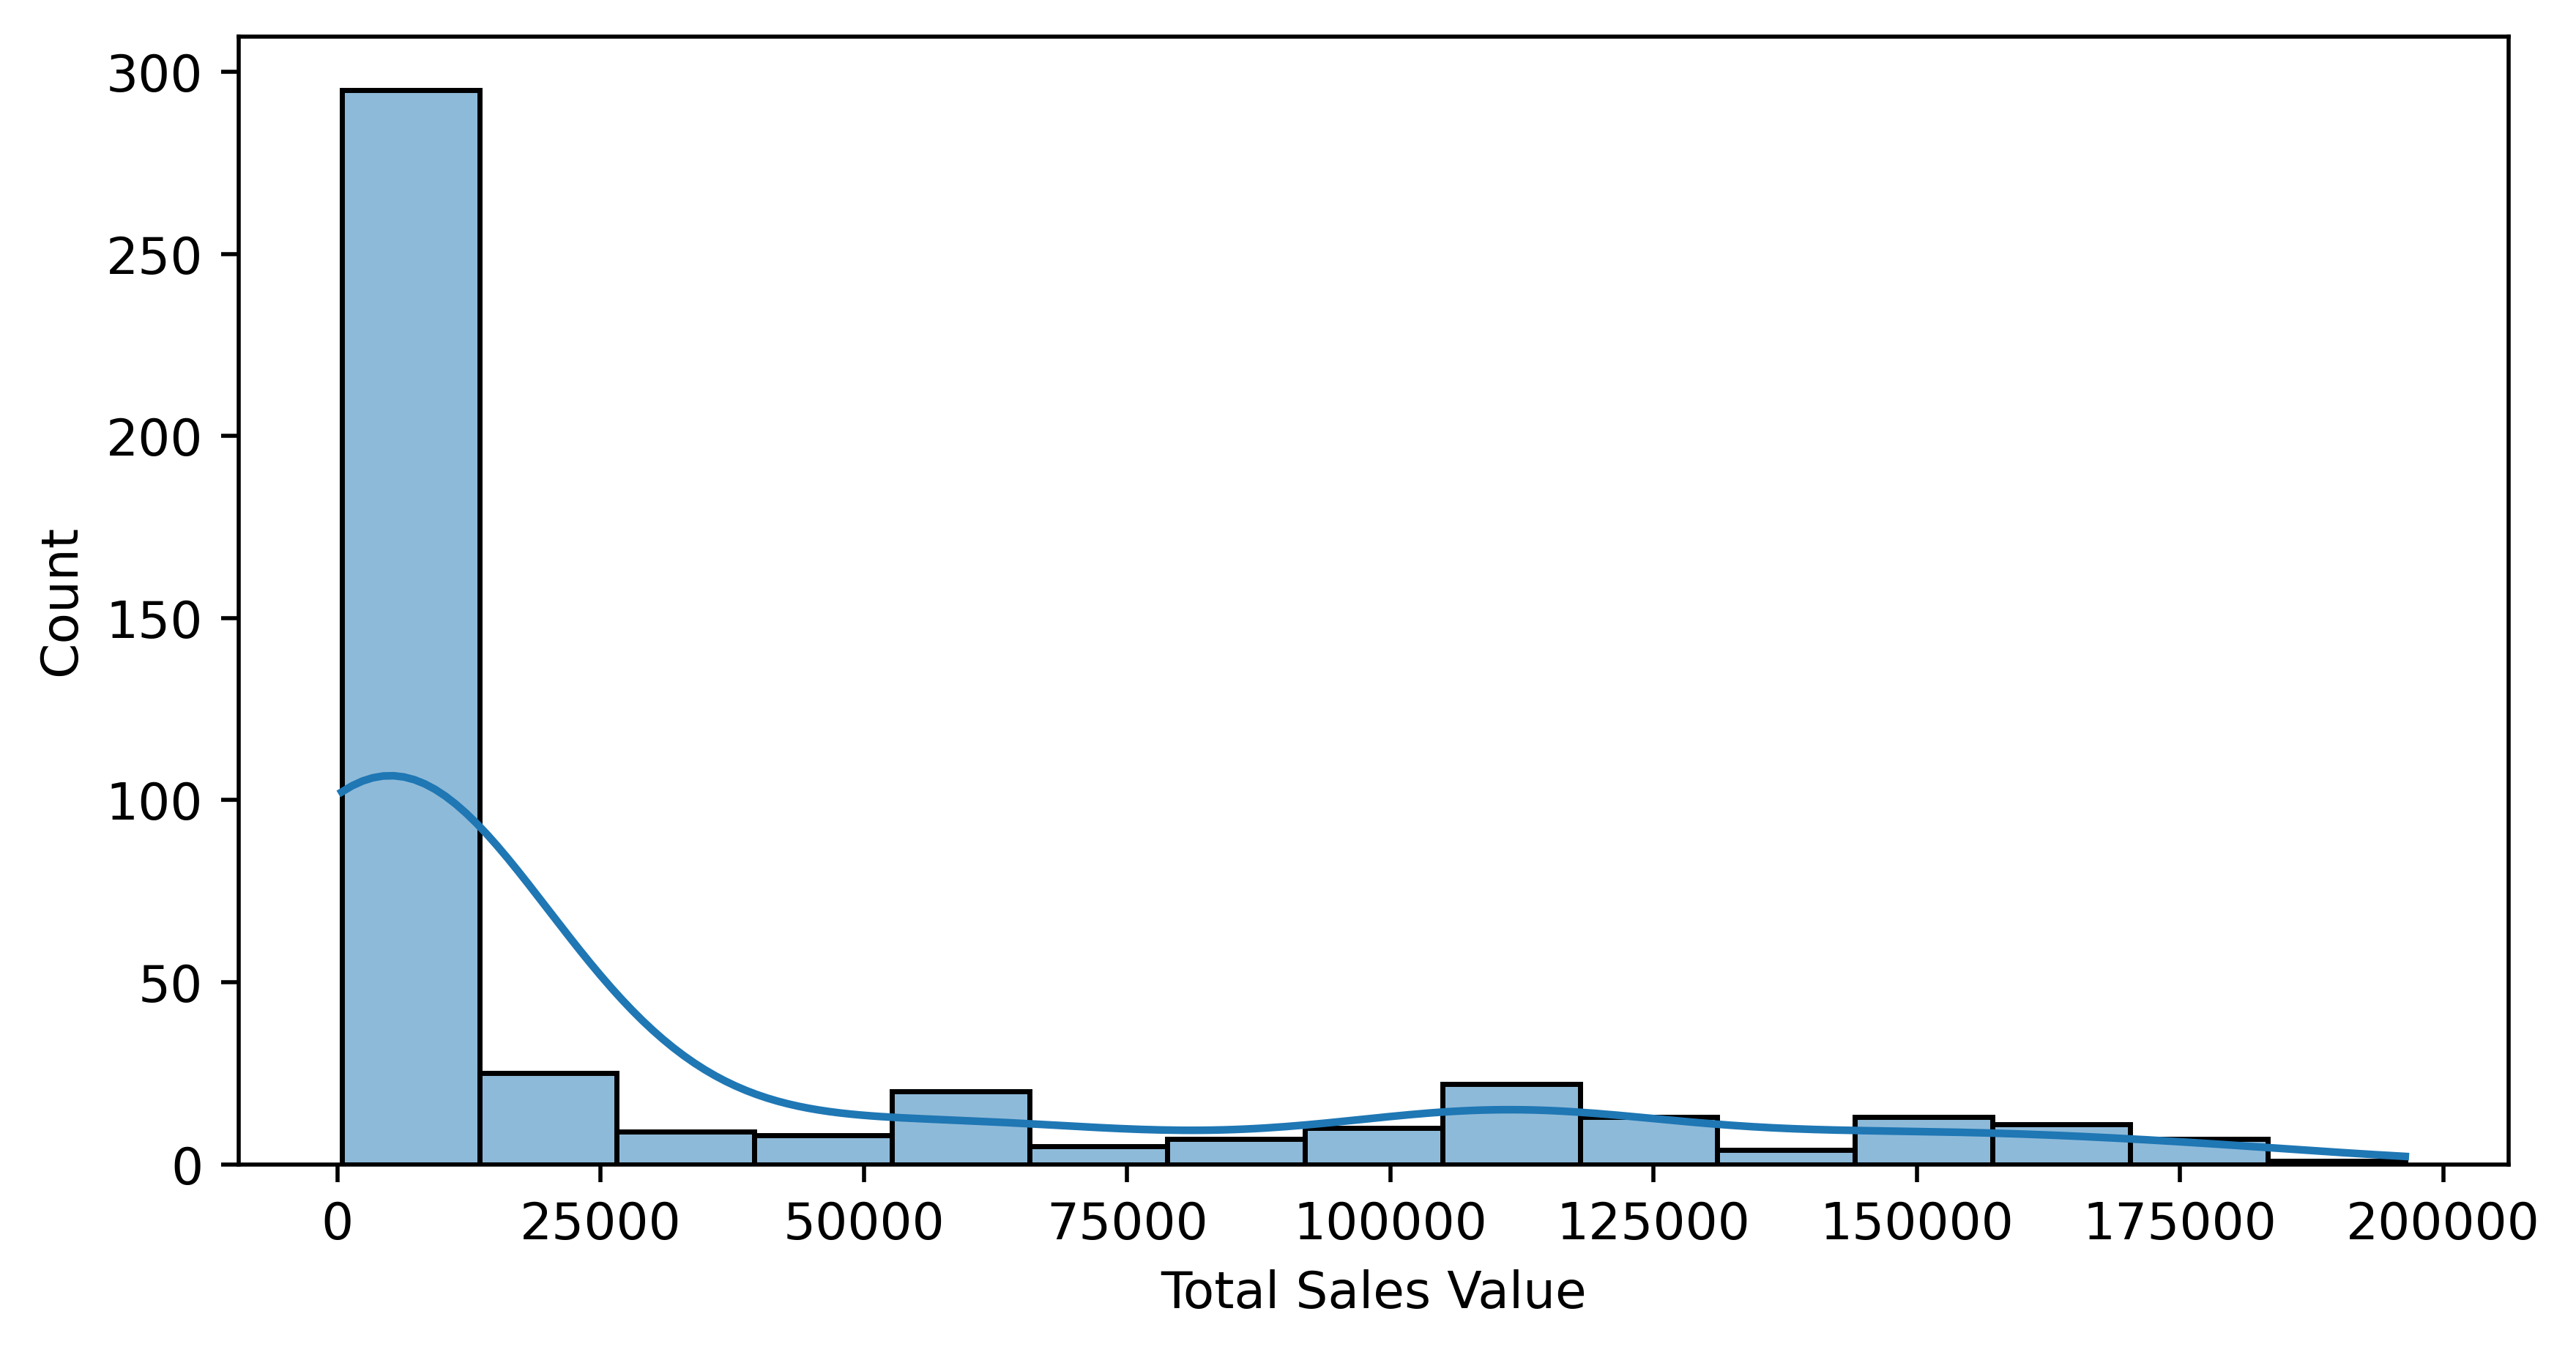

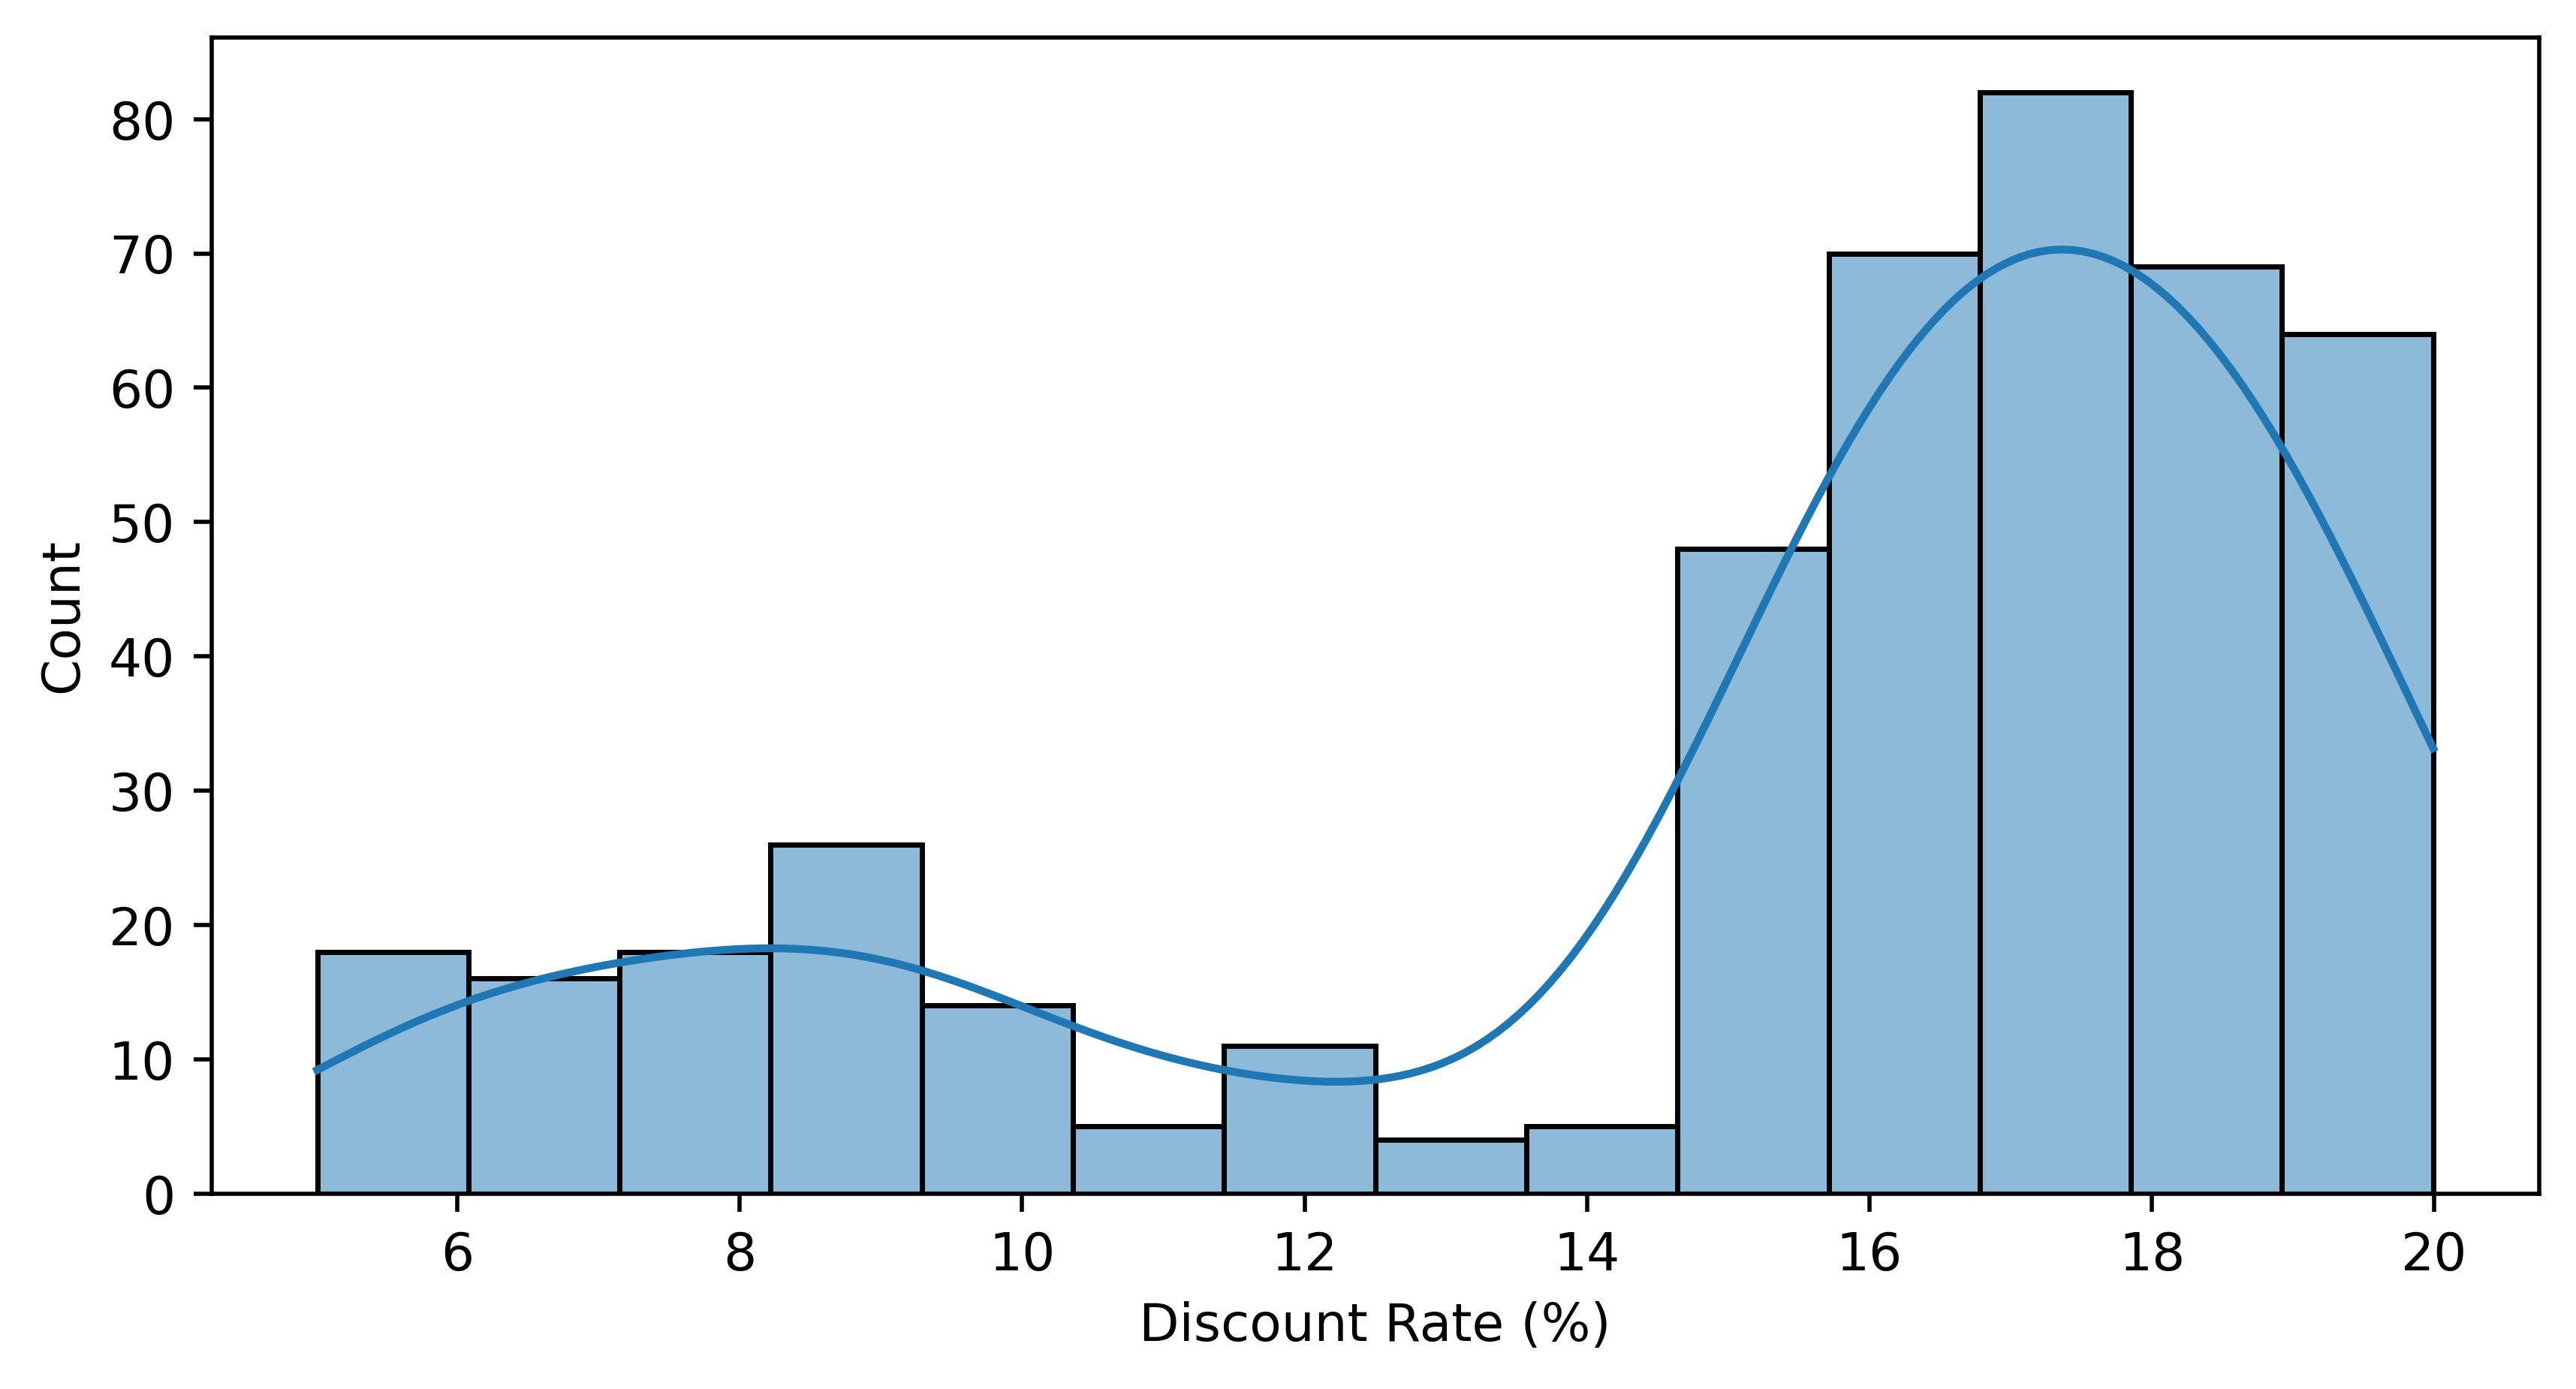

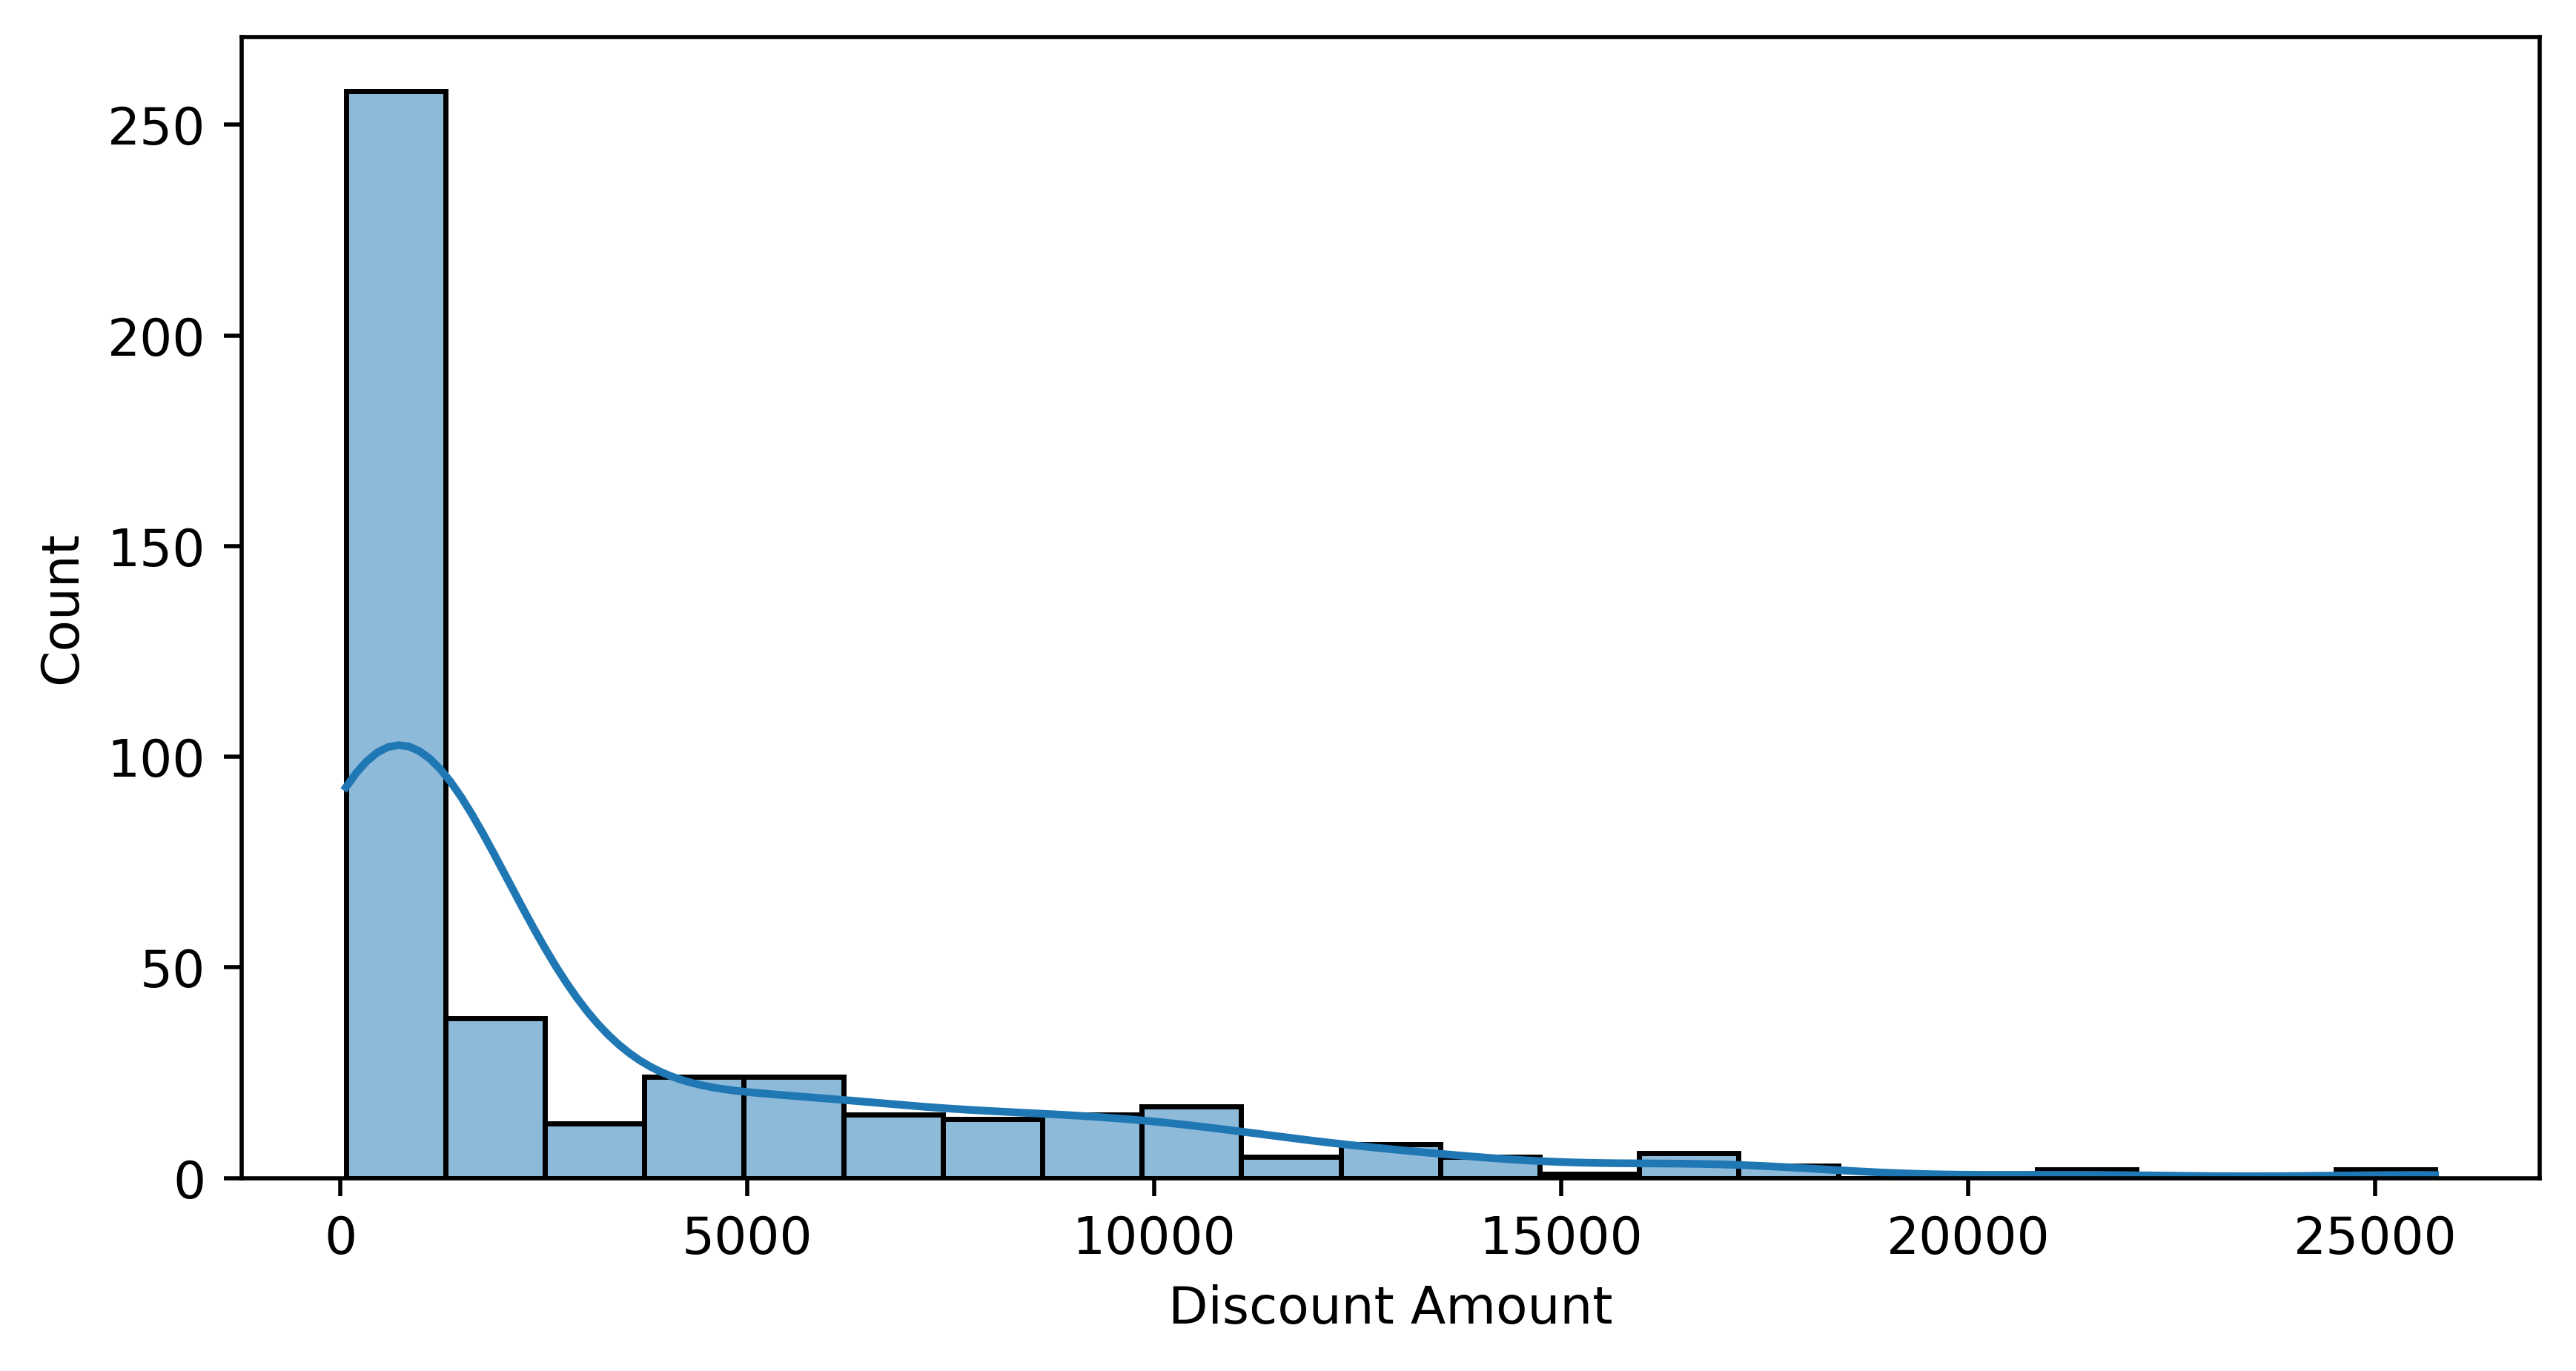

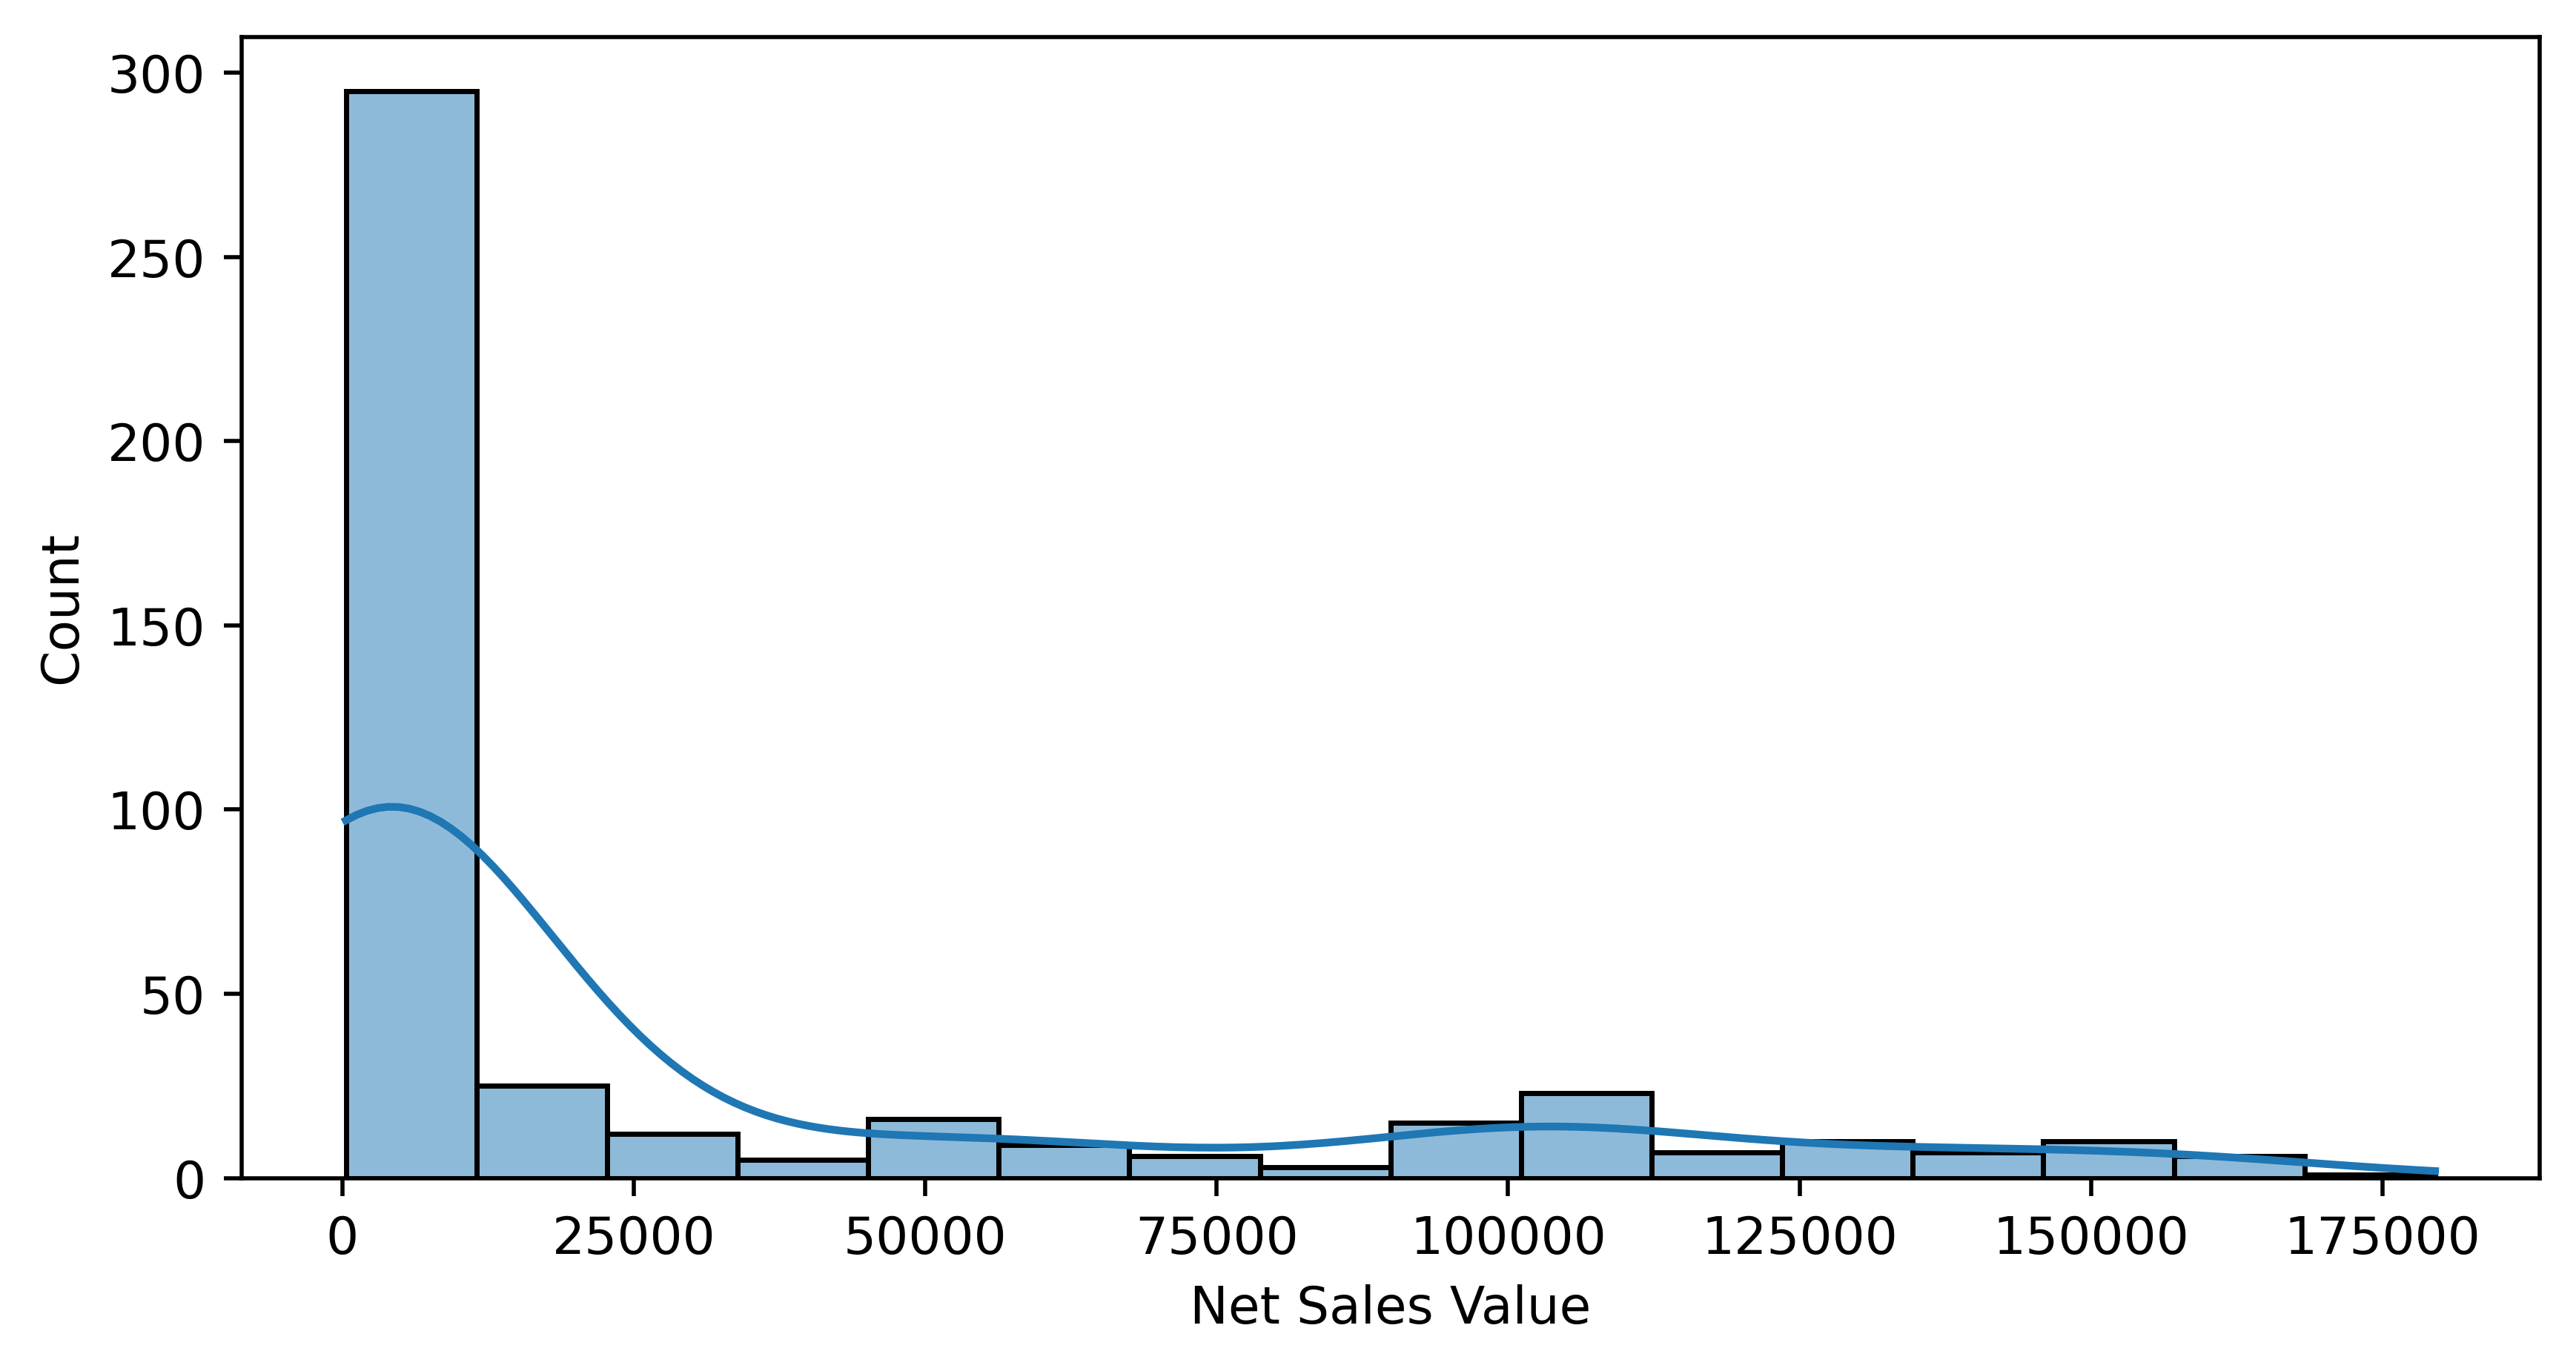

In [48]:
#Data Visualization
for i in numerical:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[i],kde=True)

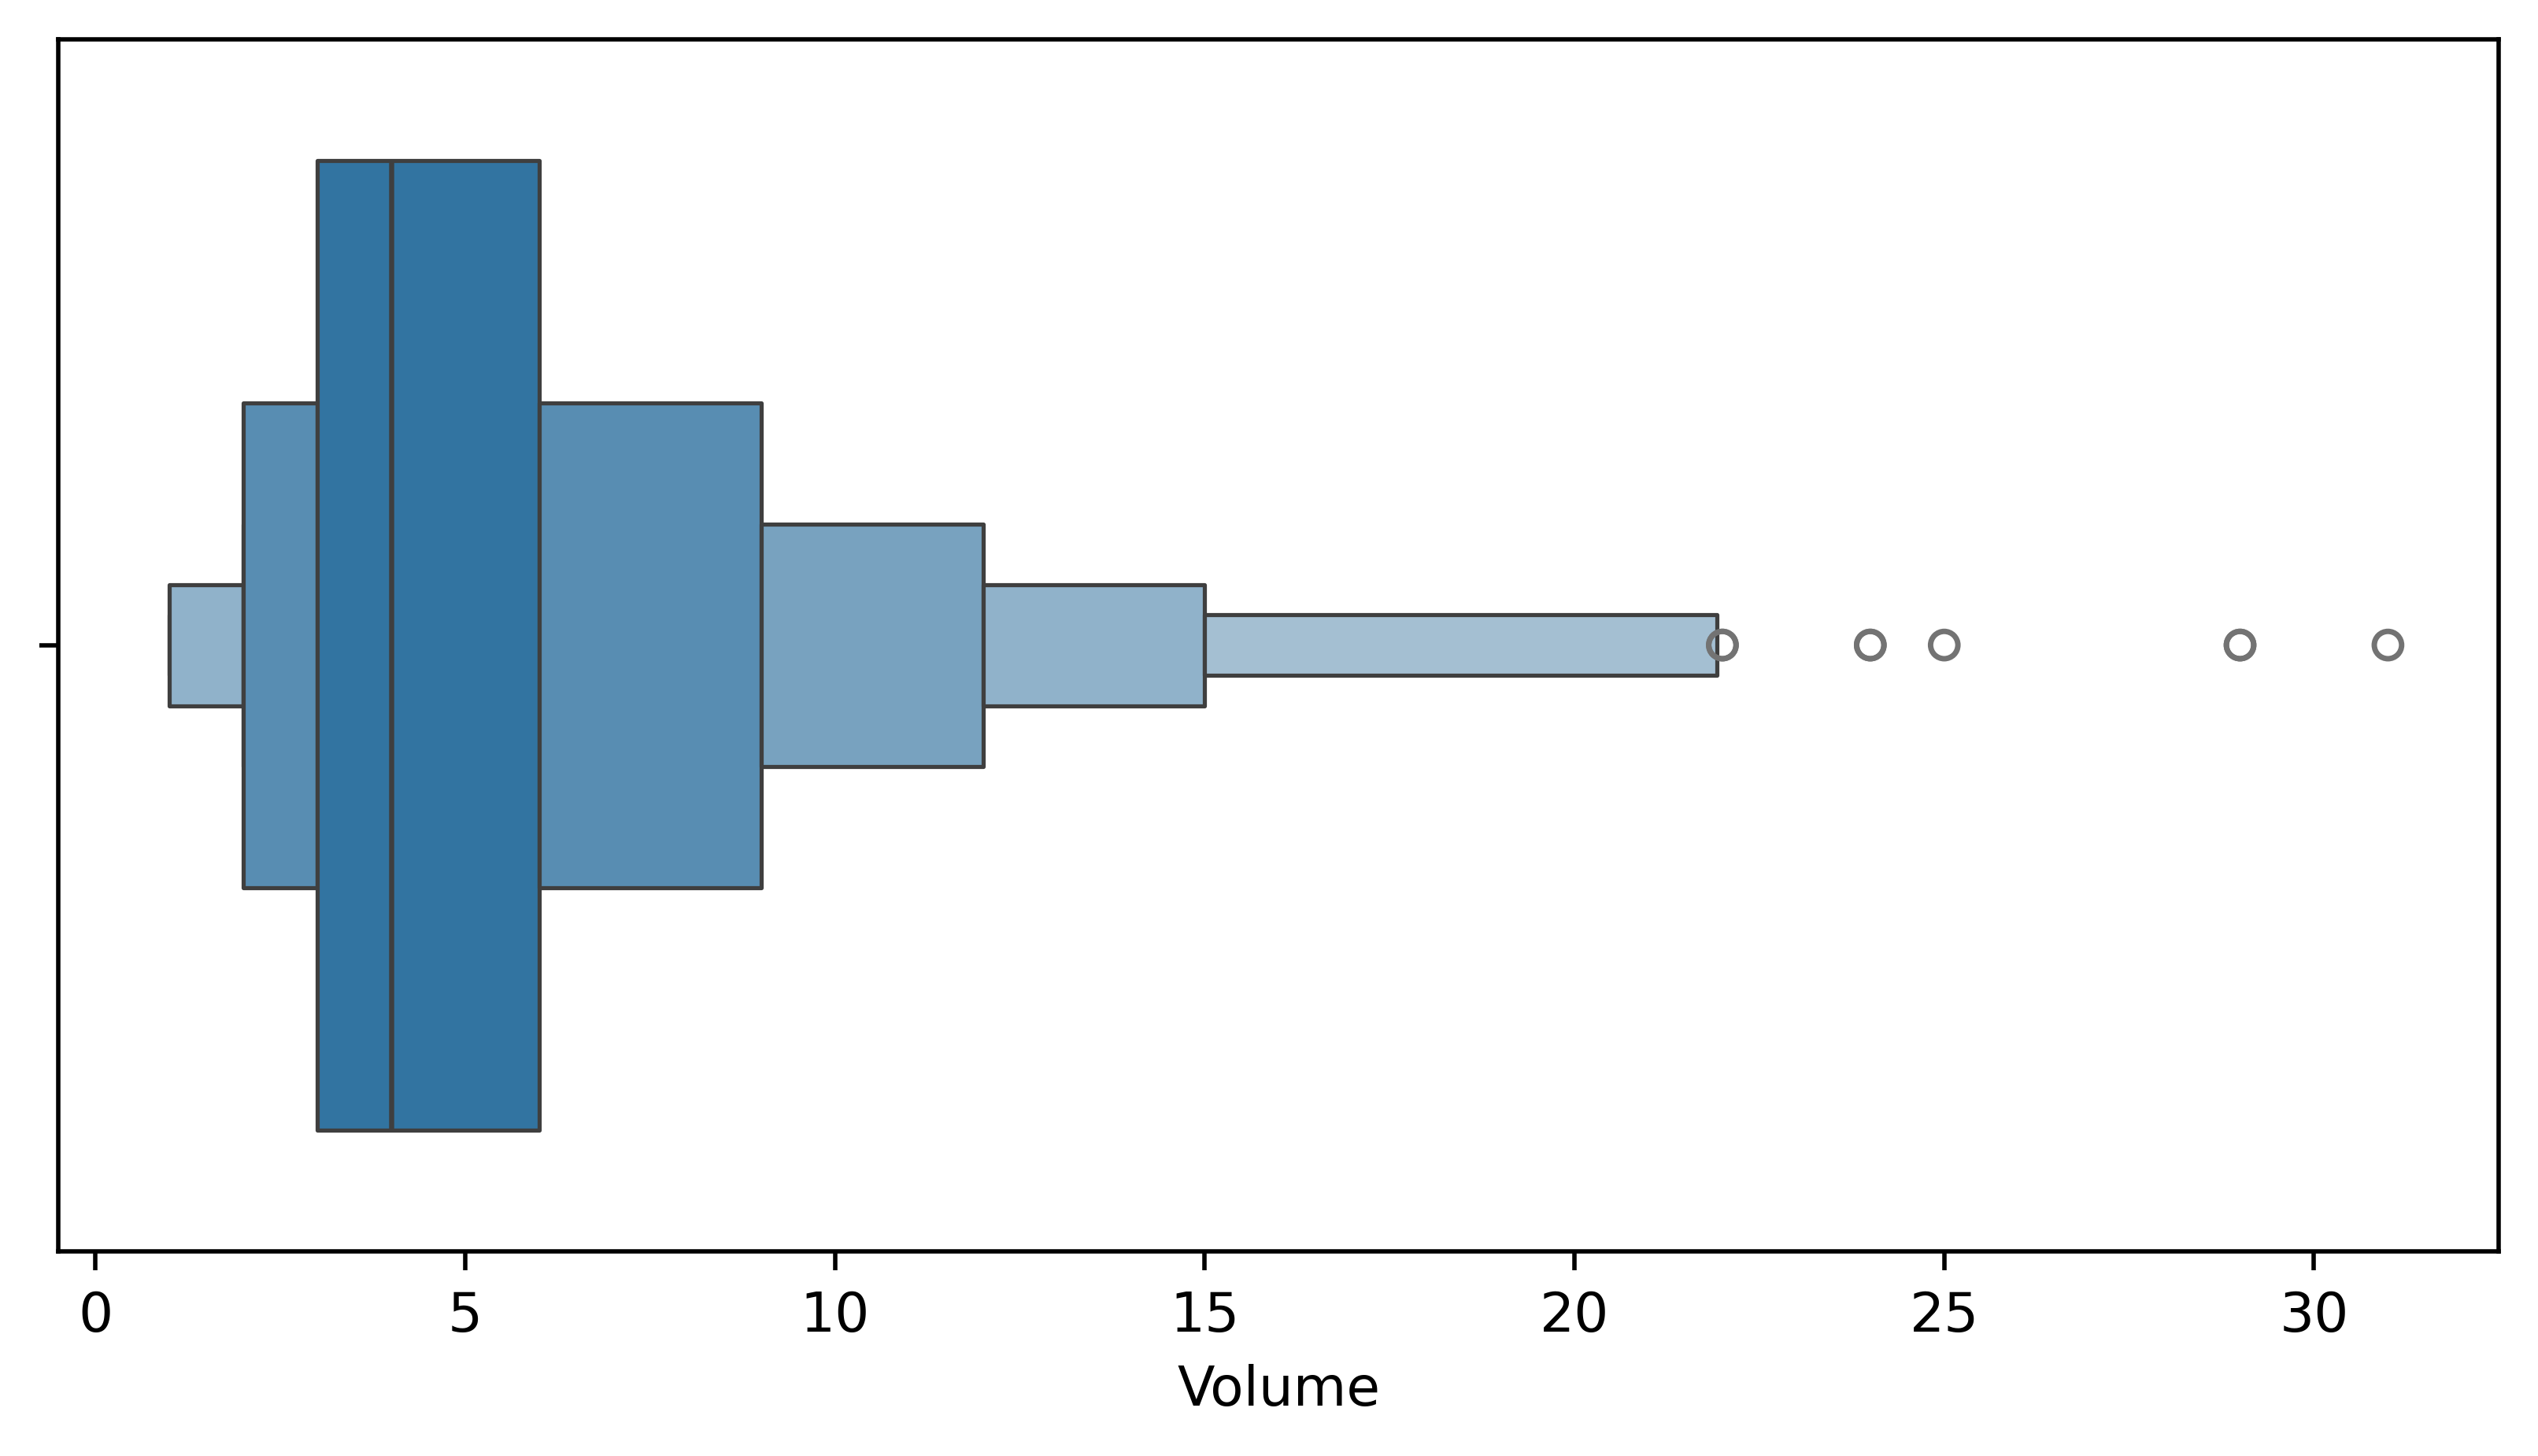

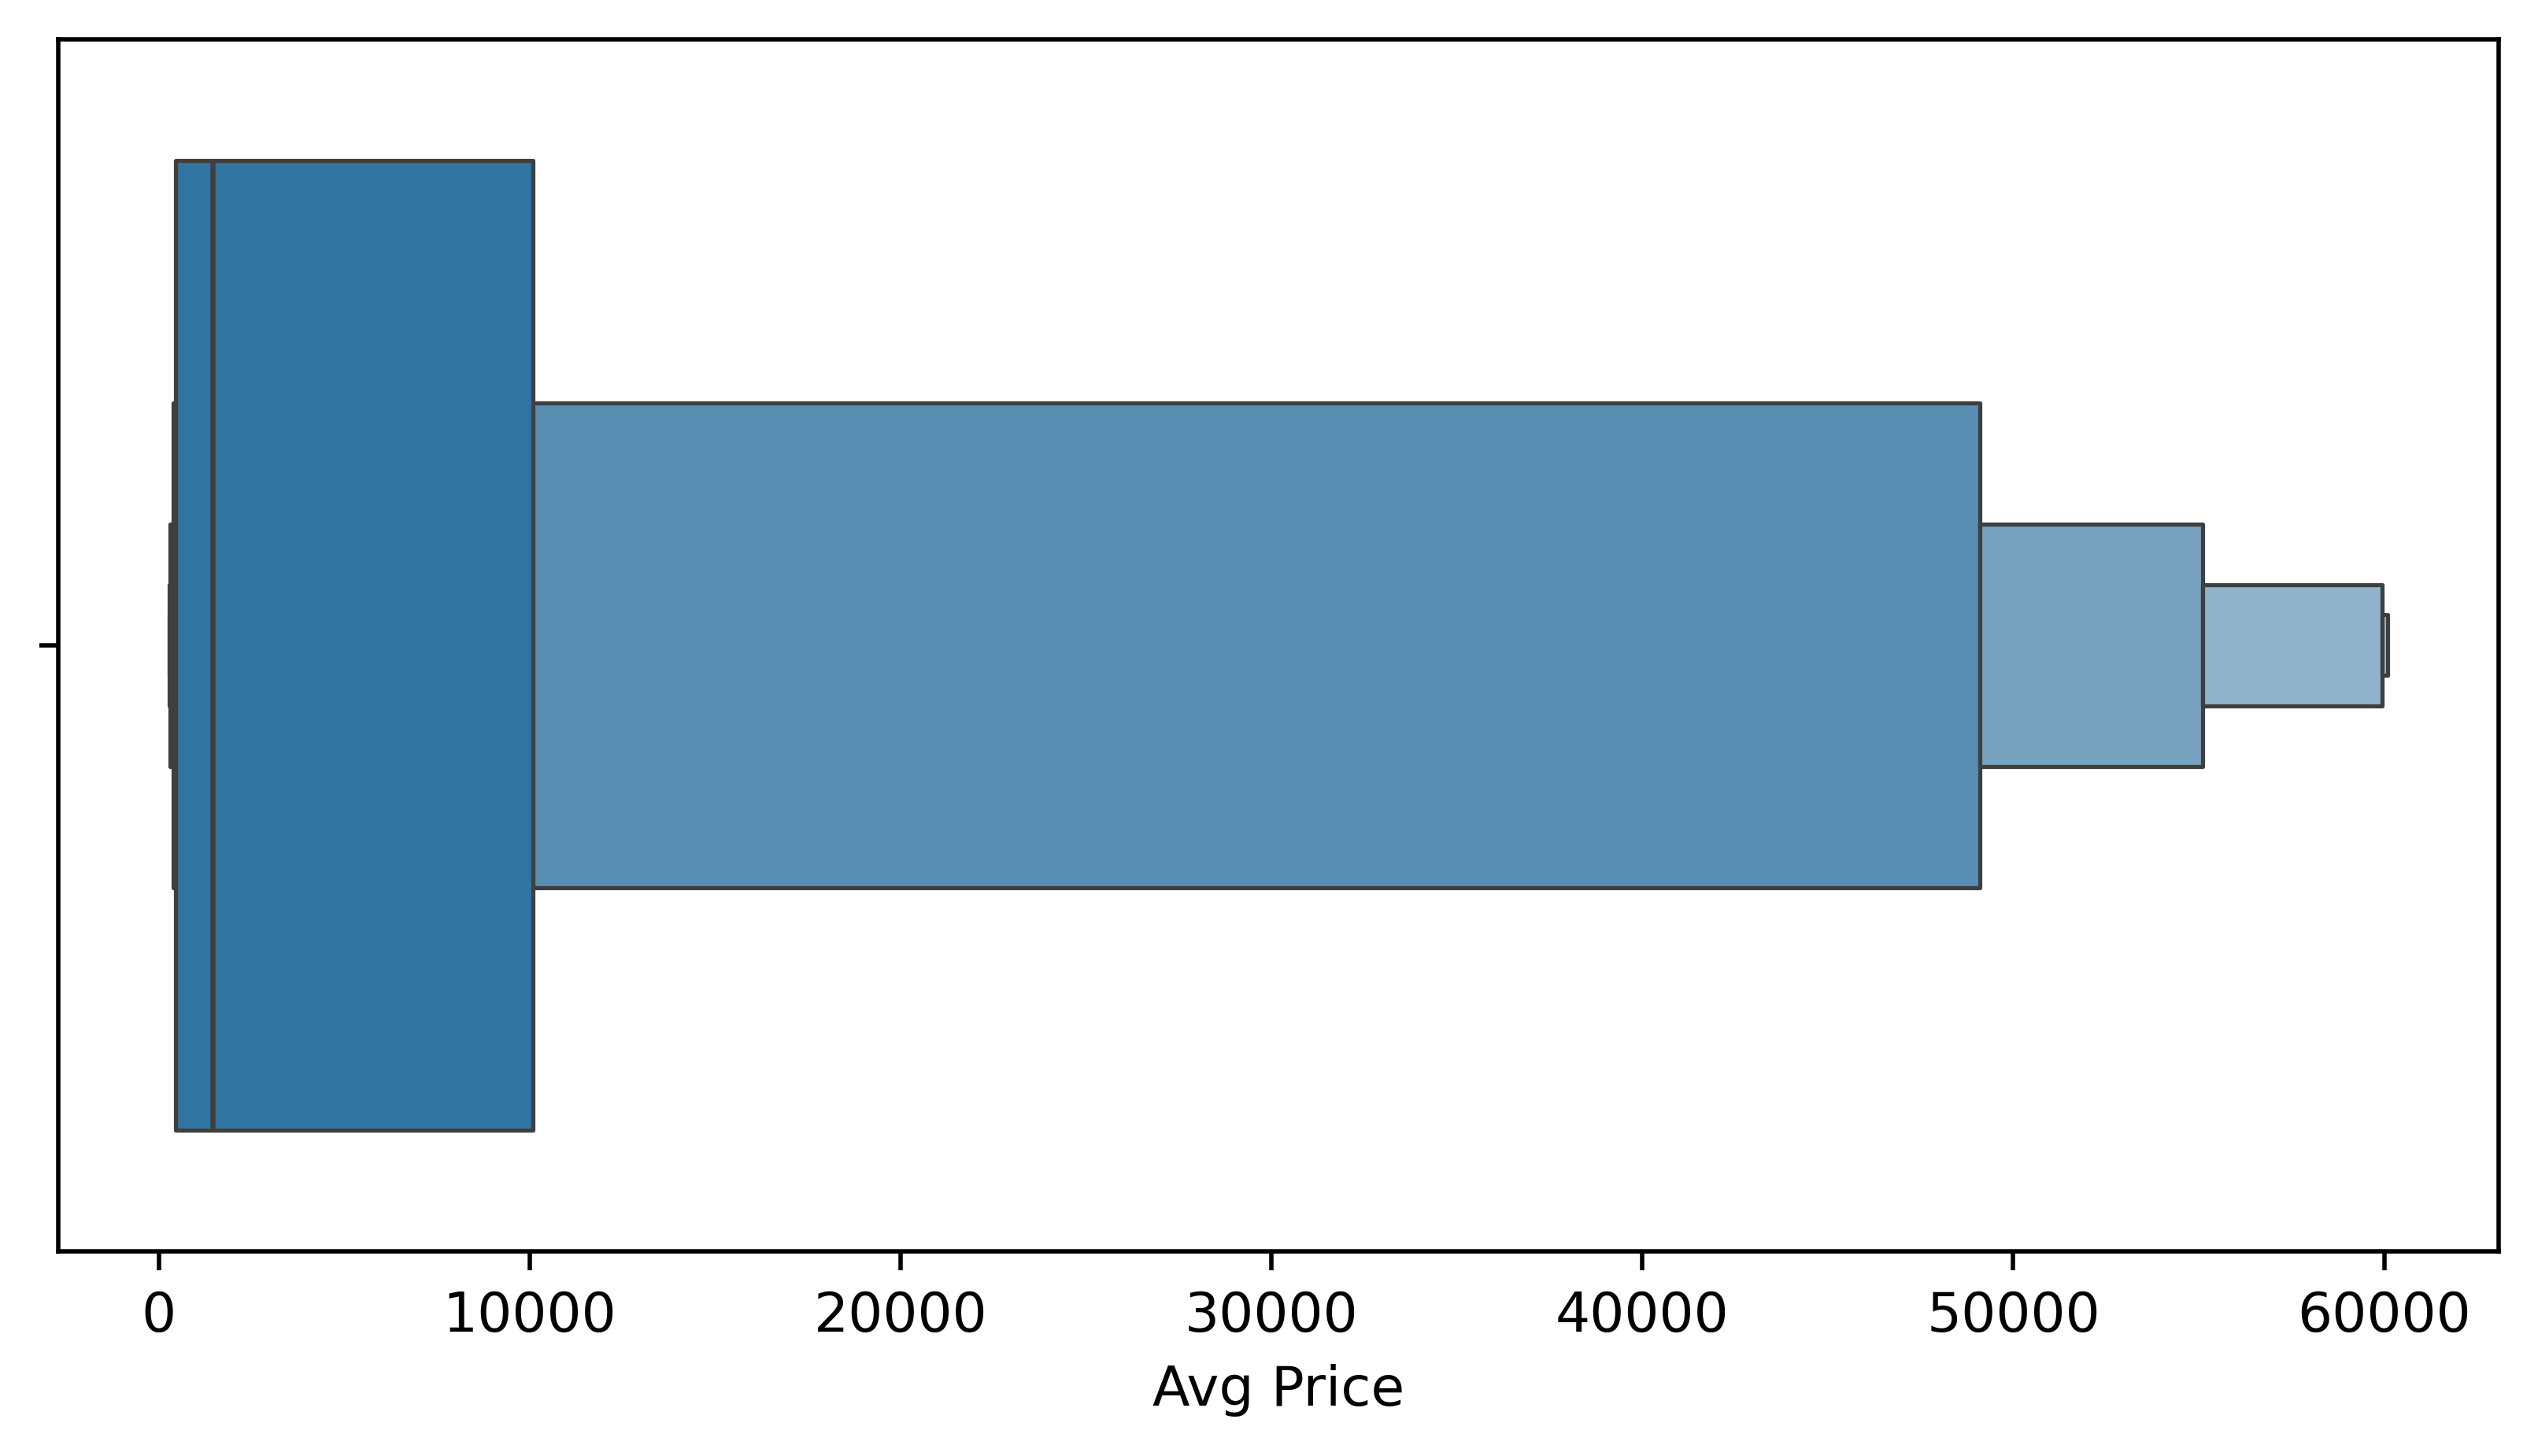

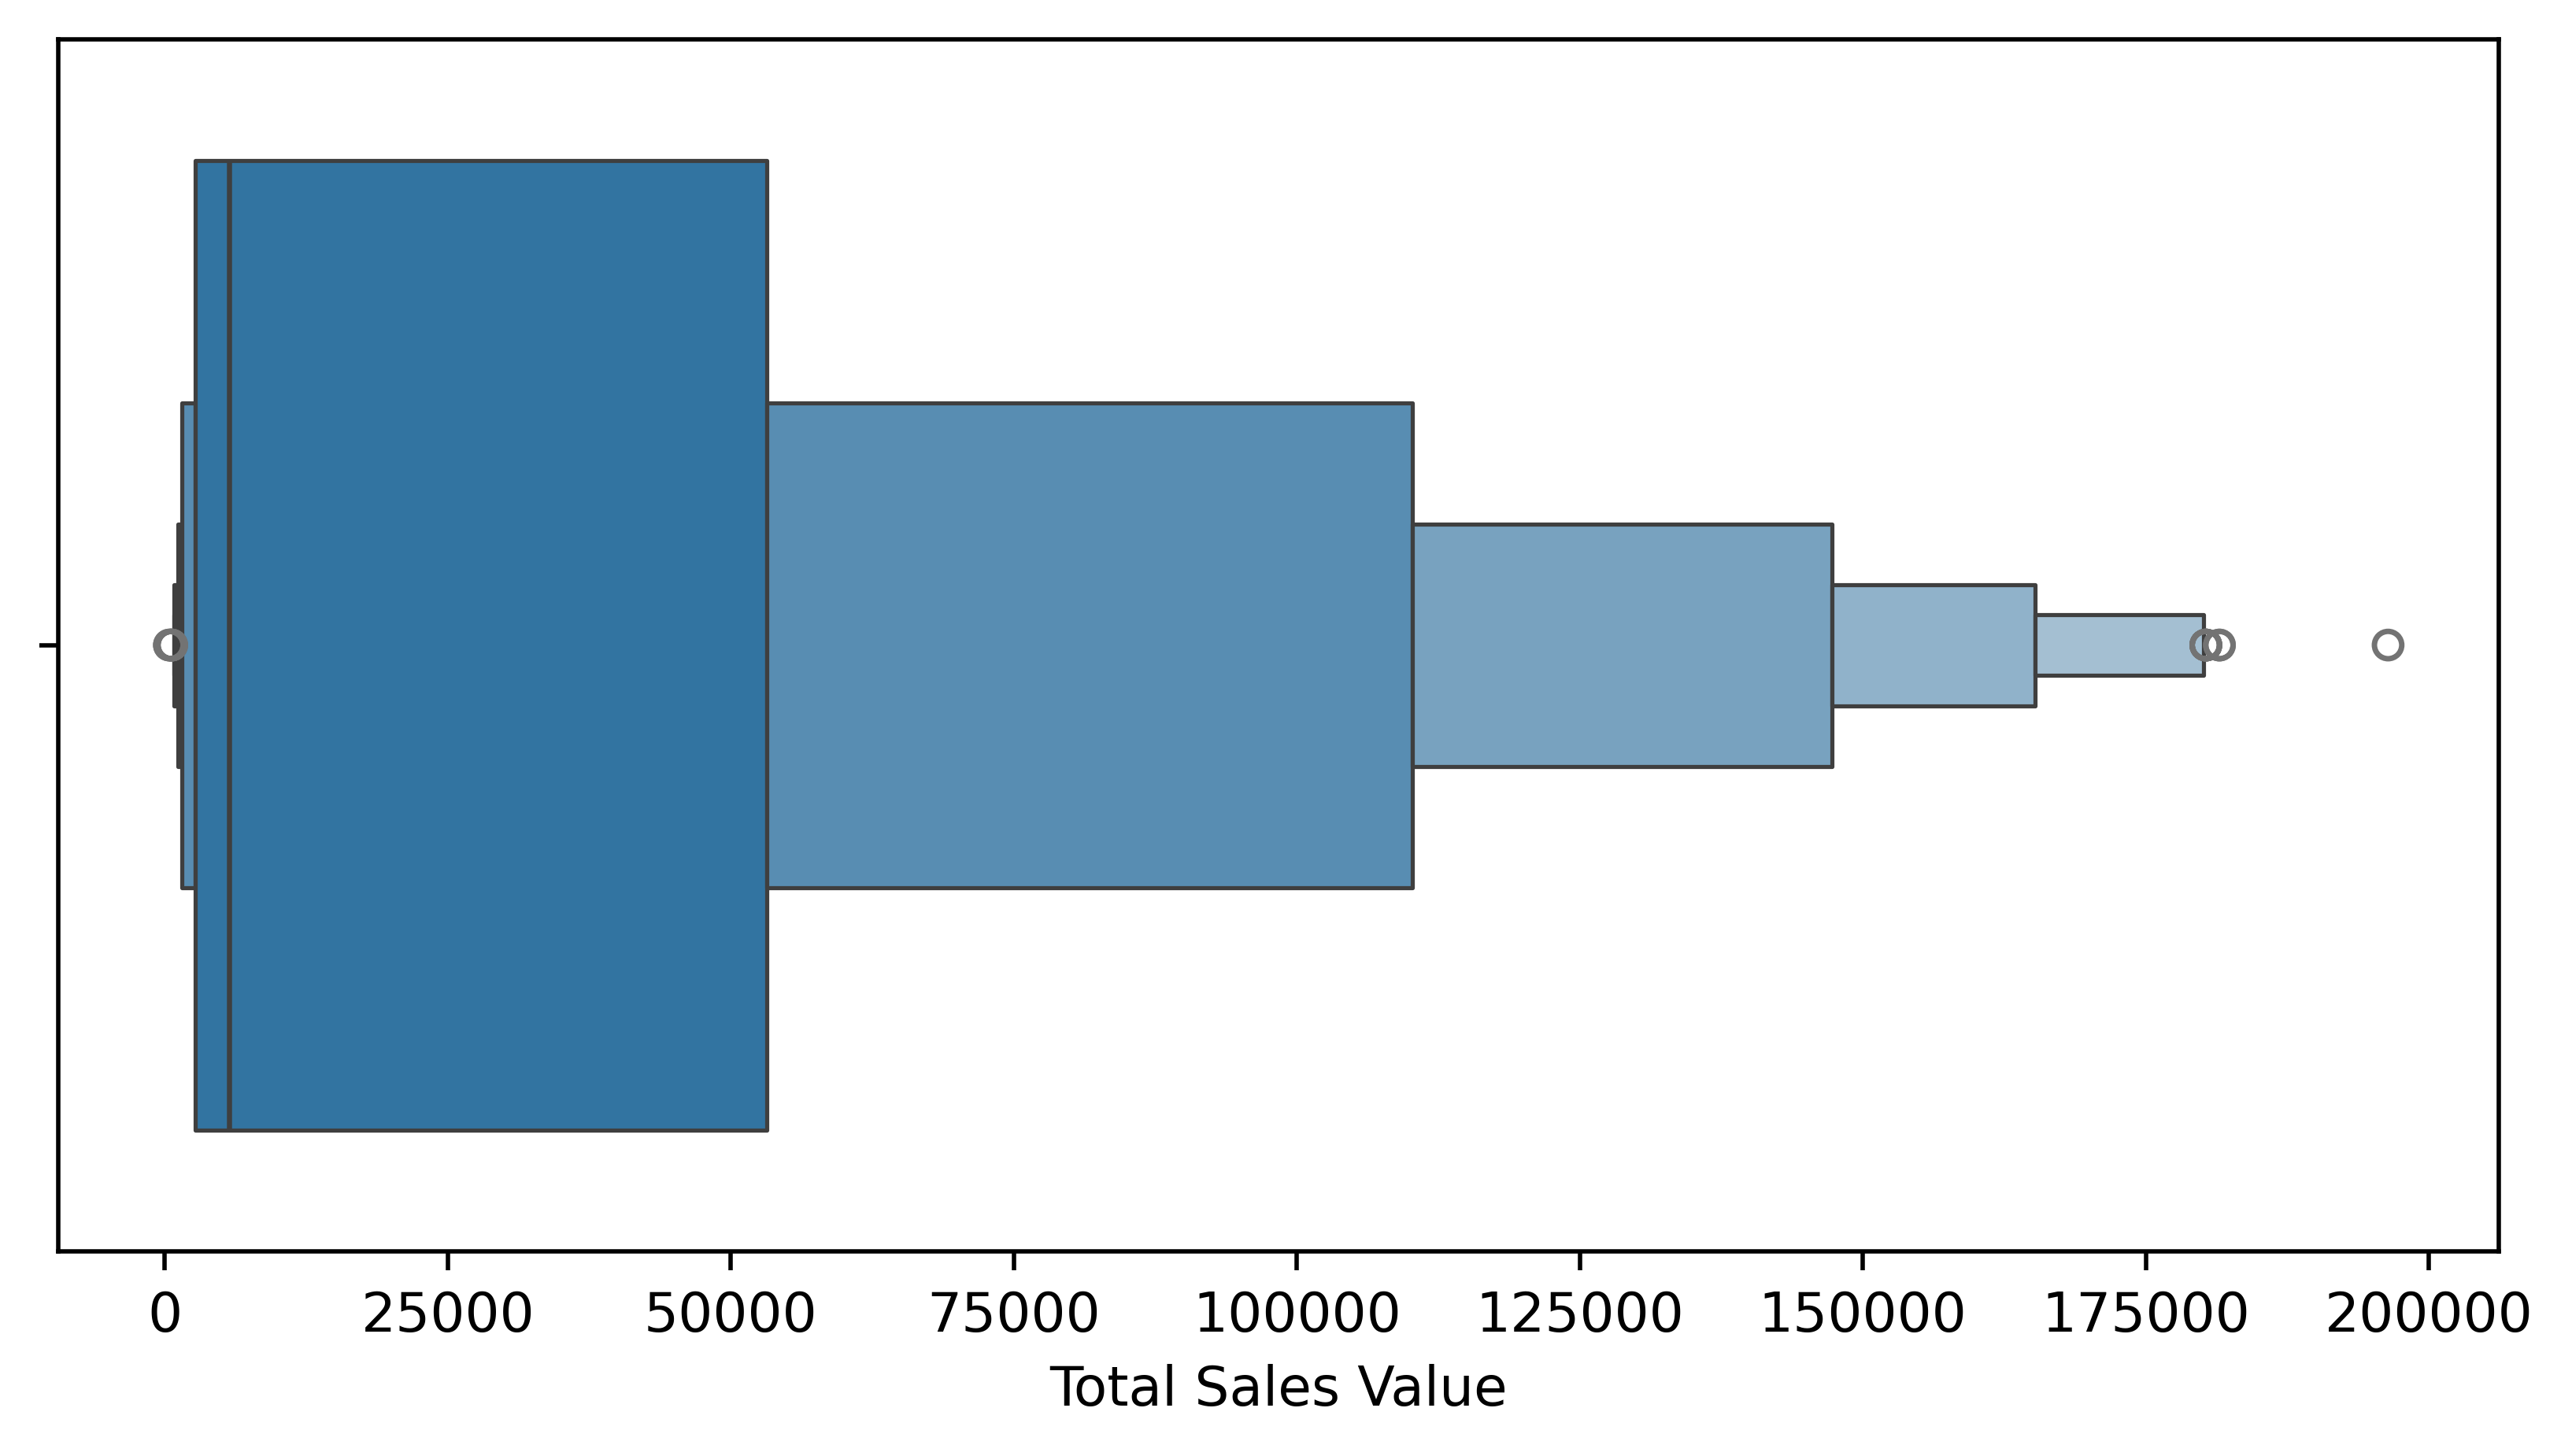

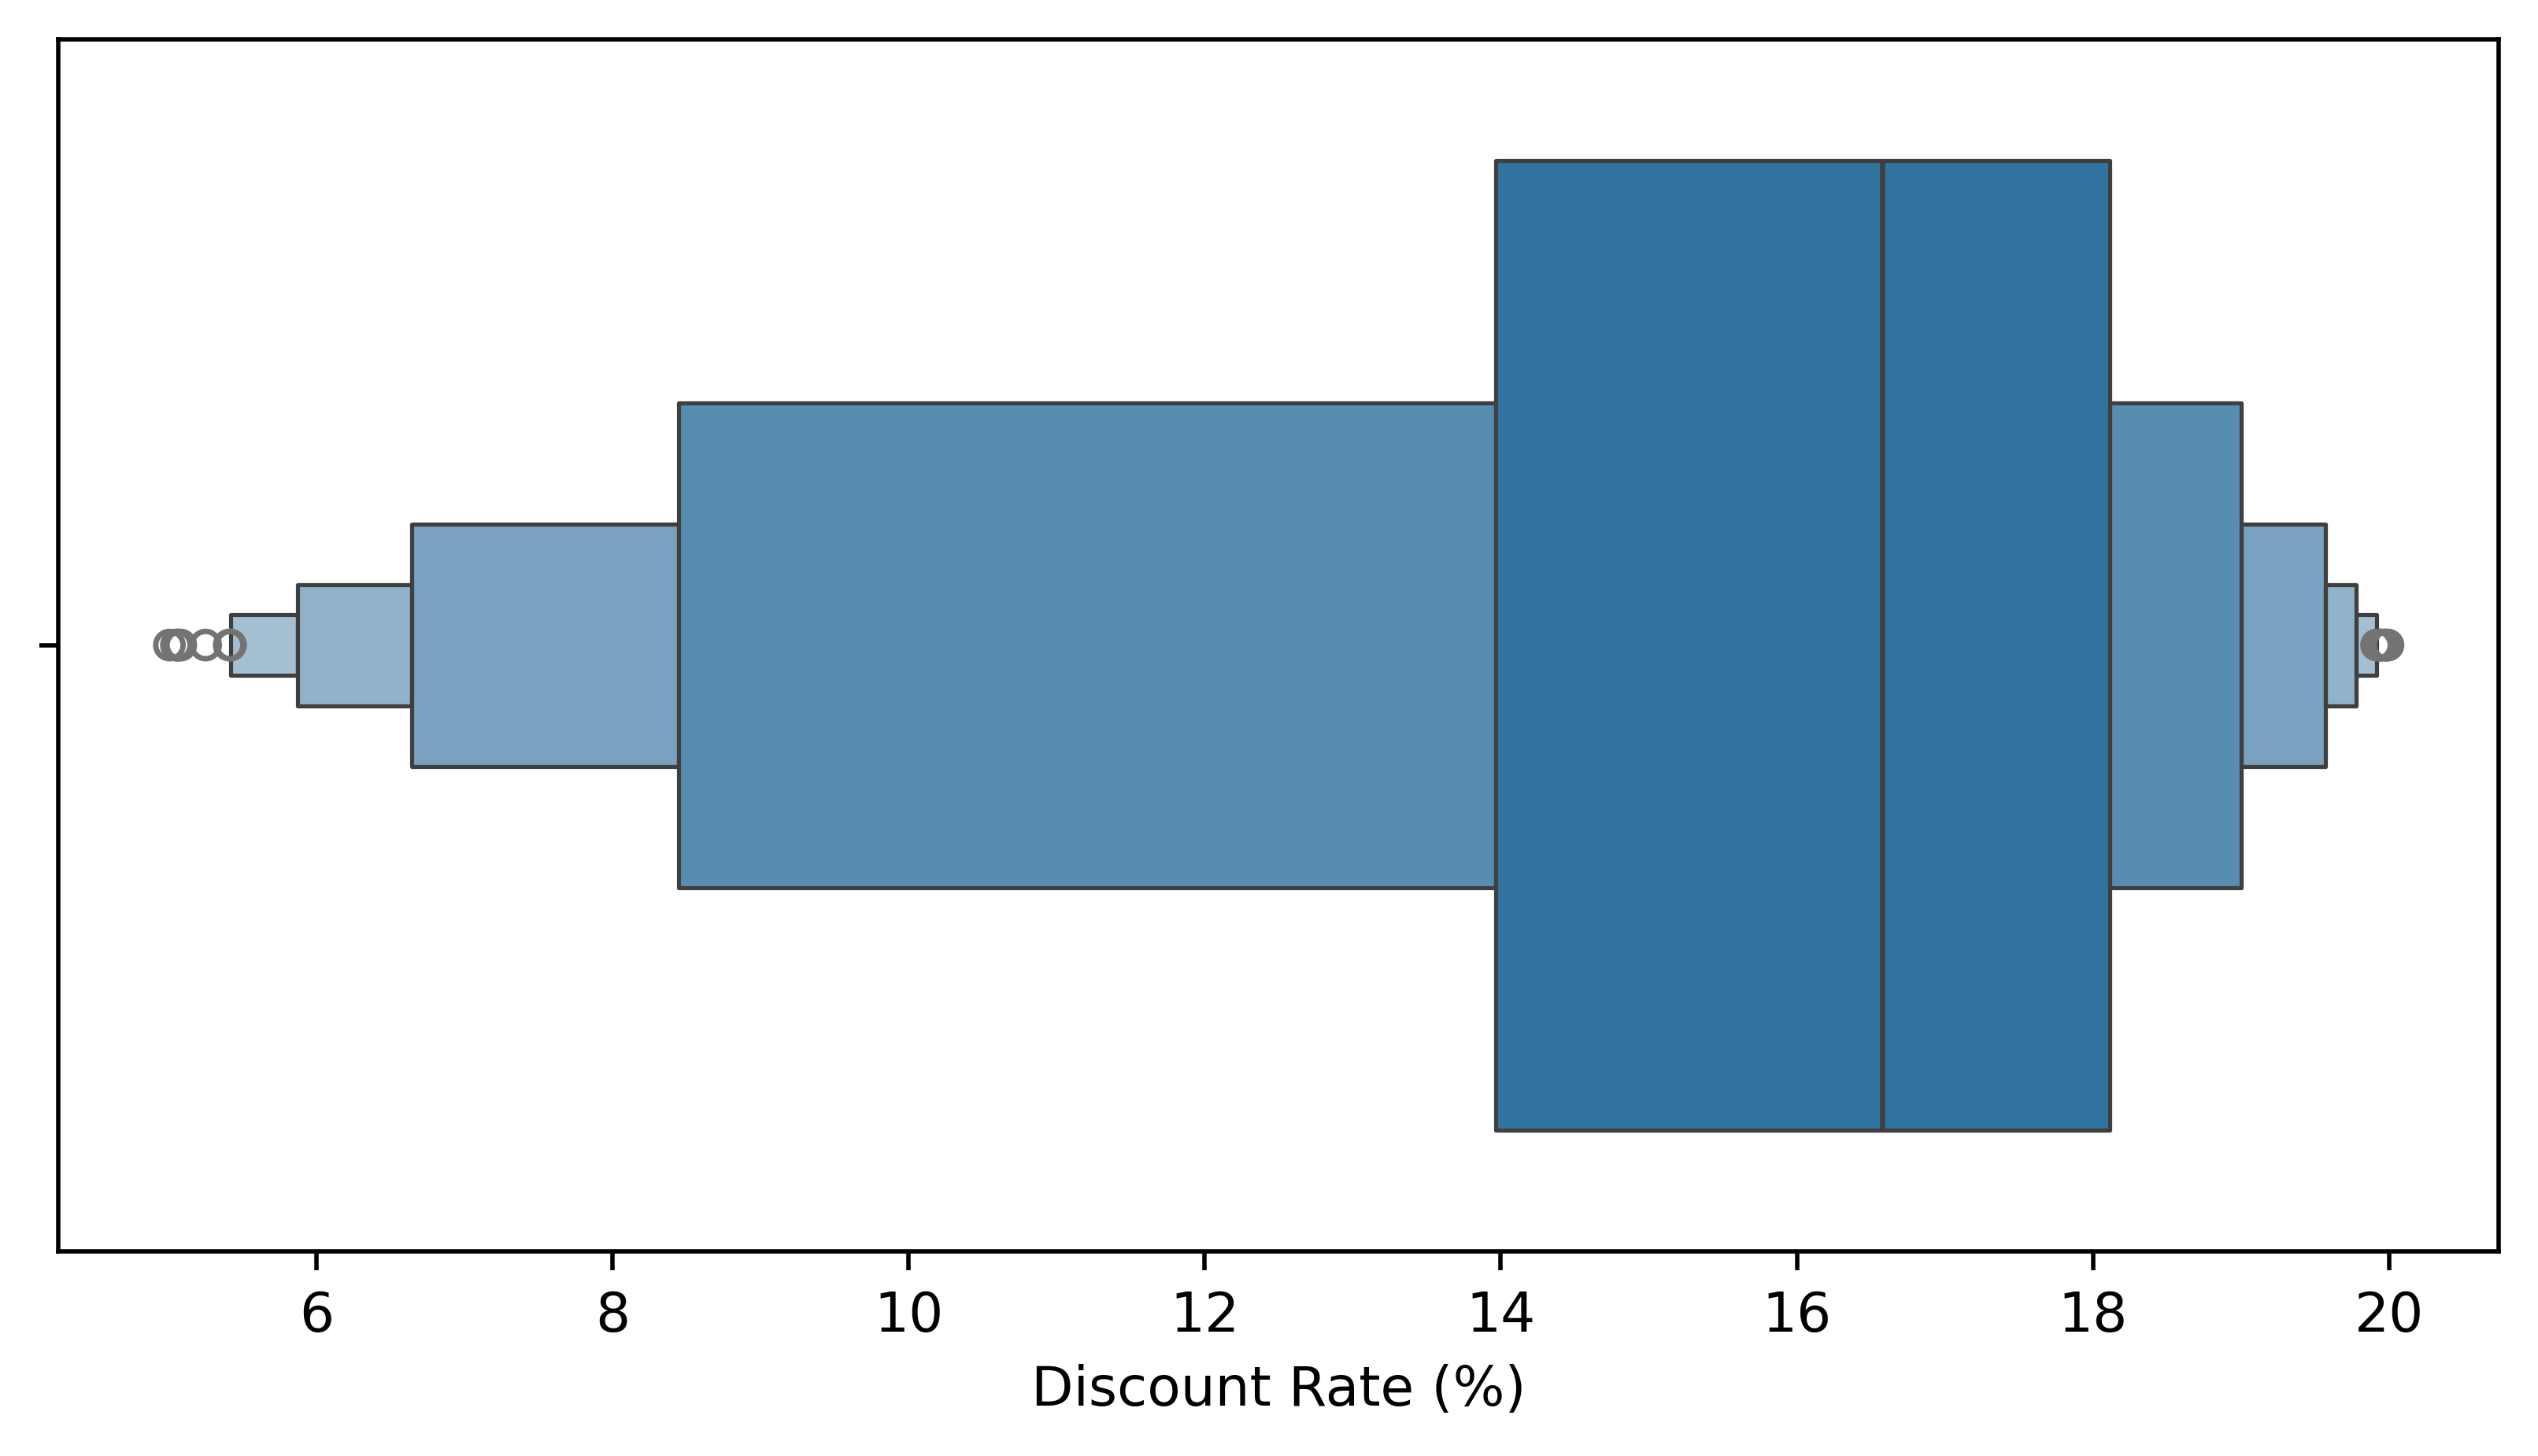

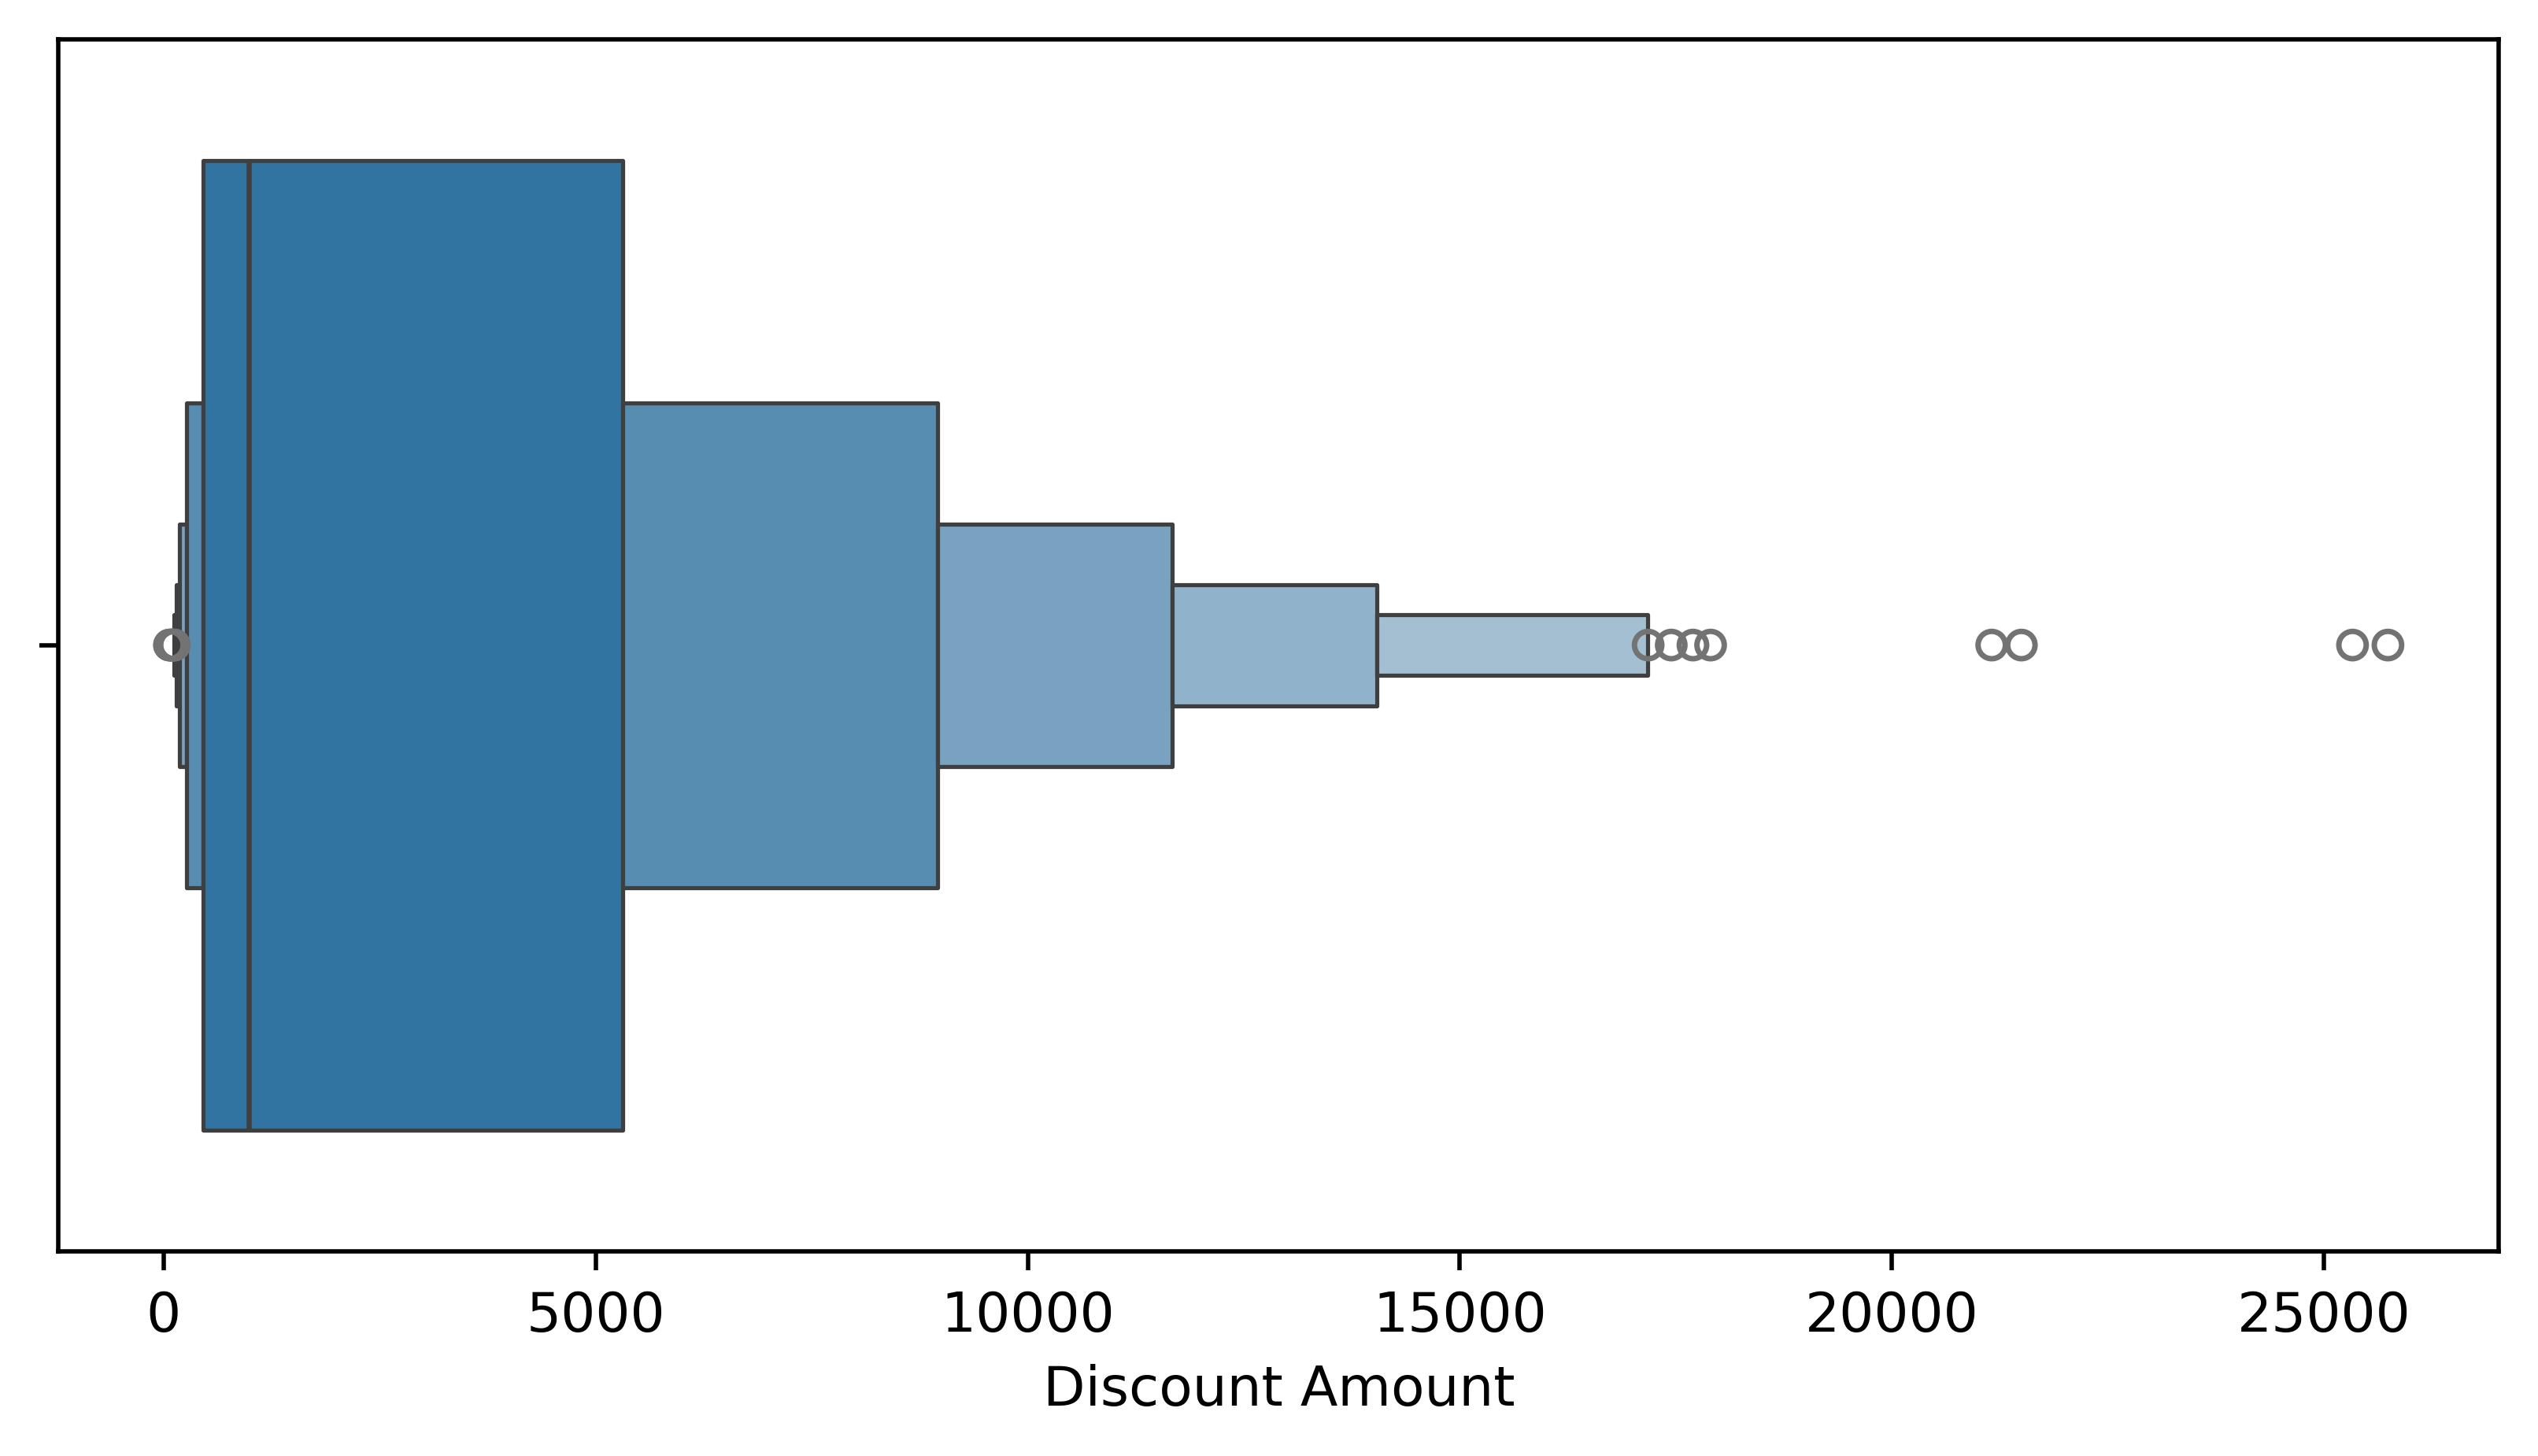

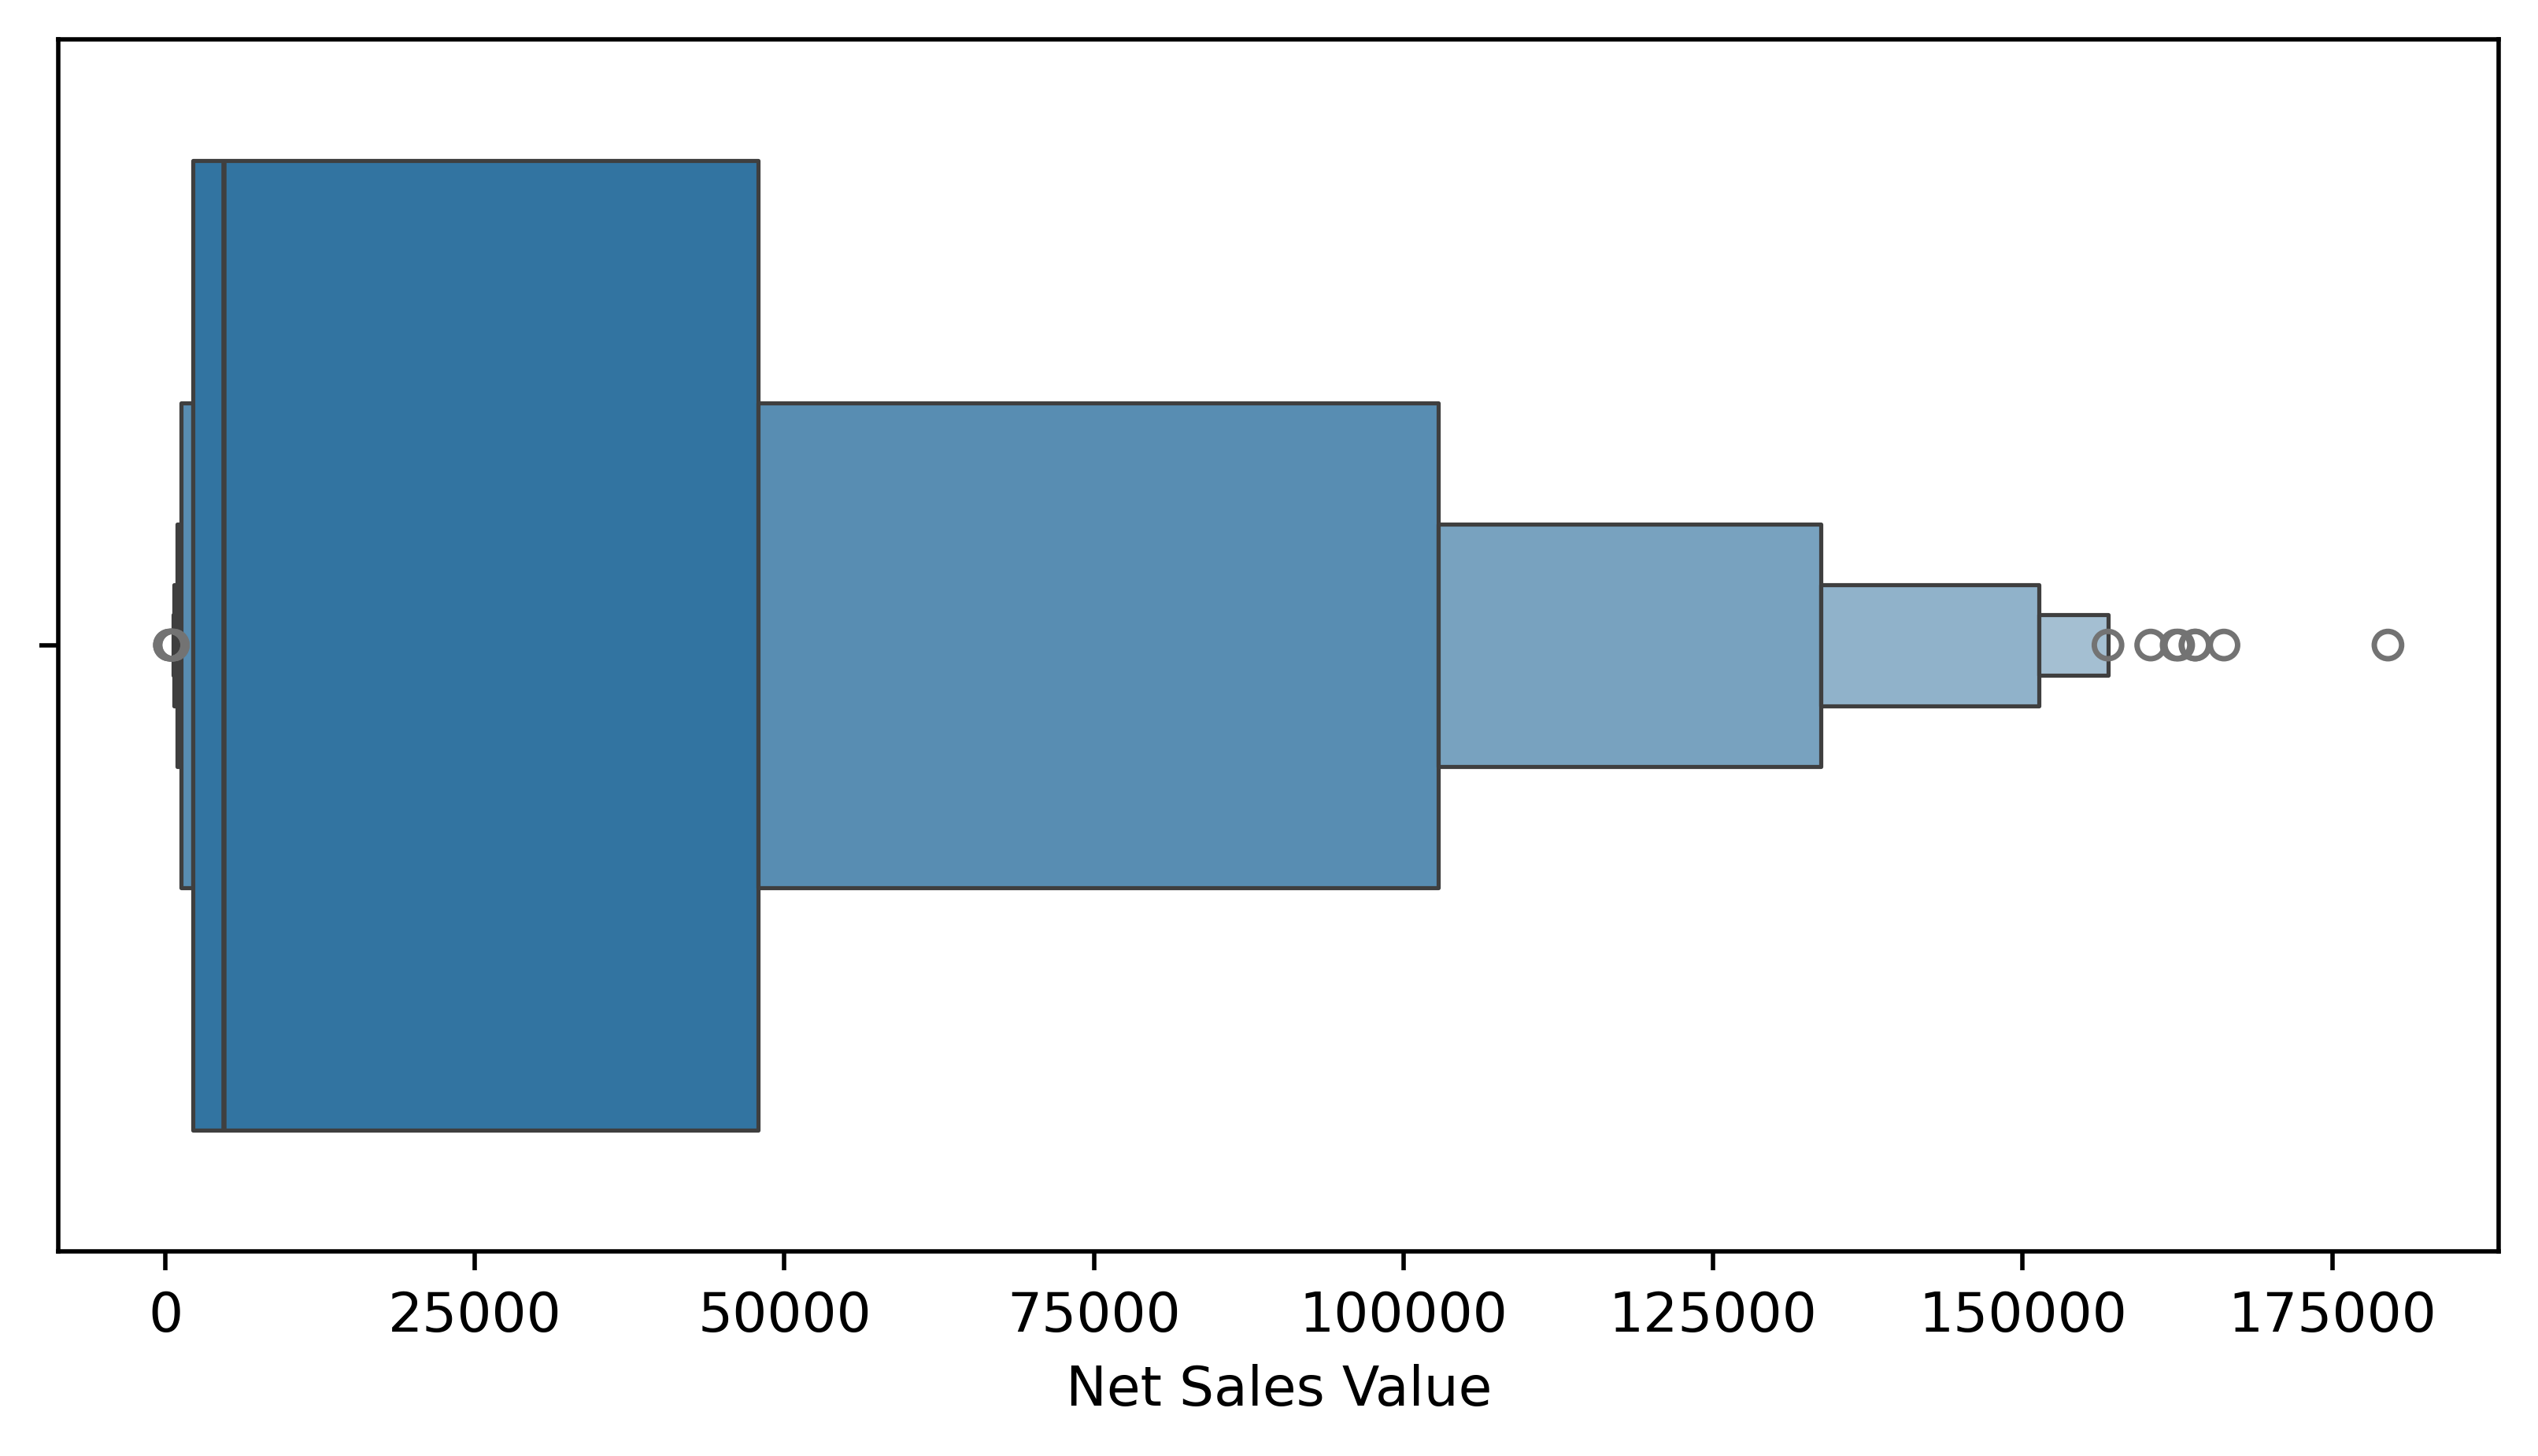

In [50]:
for j in numerical:
    plt.figure(figsize=(8, 4))
    sns.boxenplot(x=df[j])

In [51]:
#Bar Chart Analysis for Categorical Column
categorical = df.select_dtypes(include='object').columns

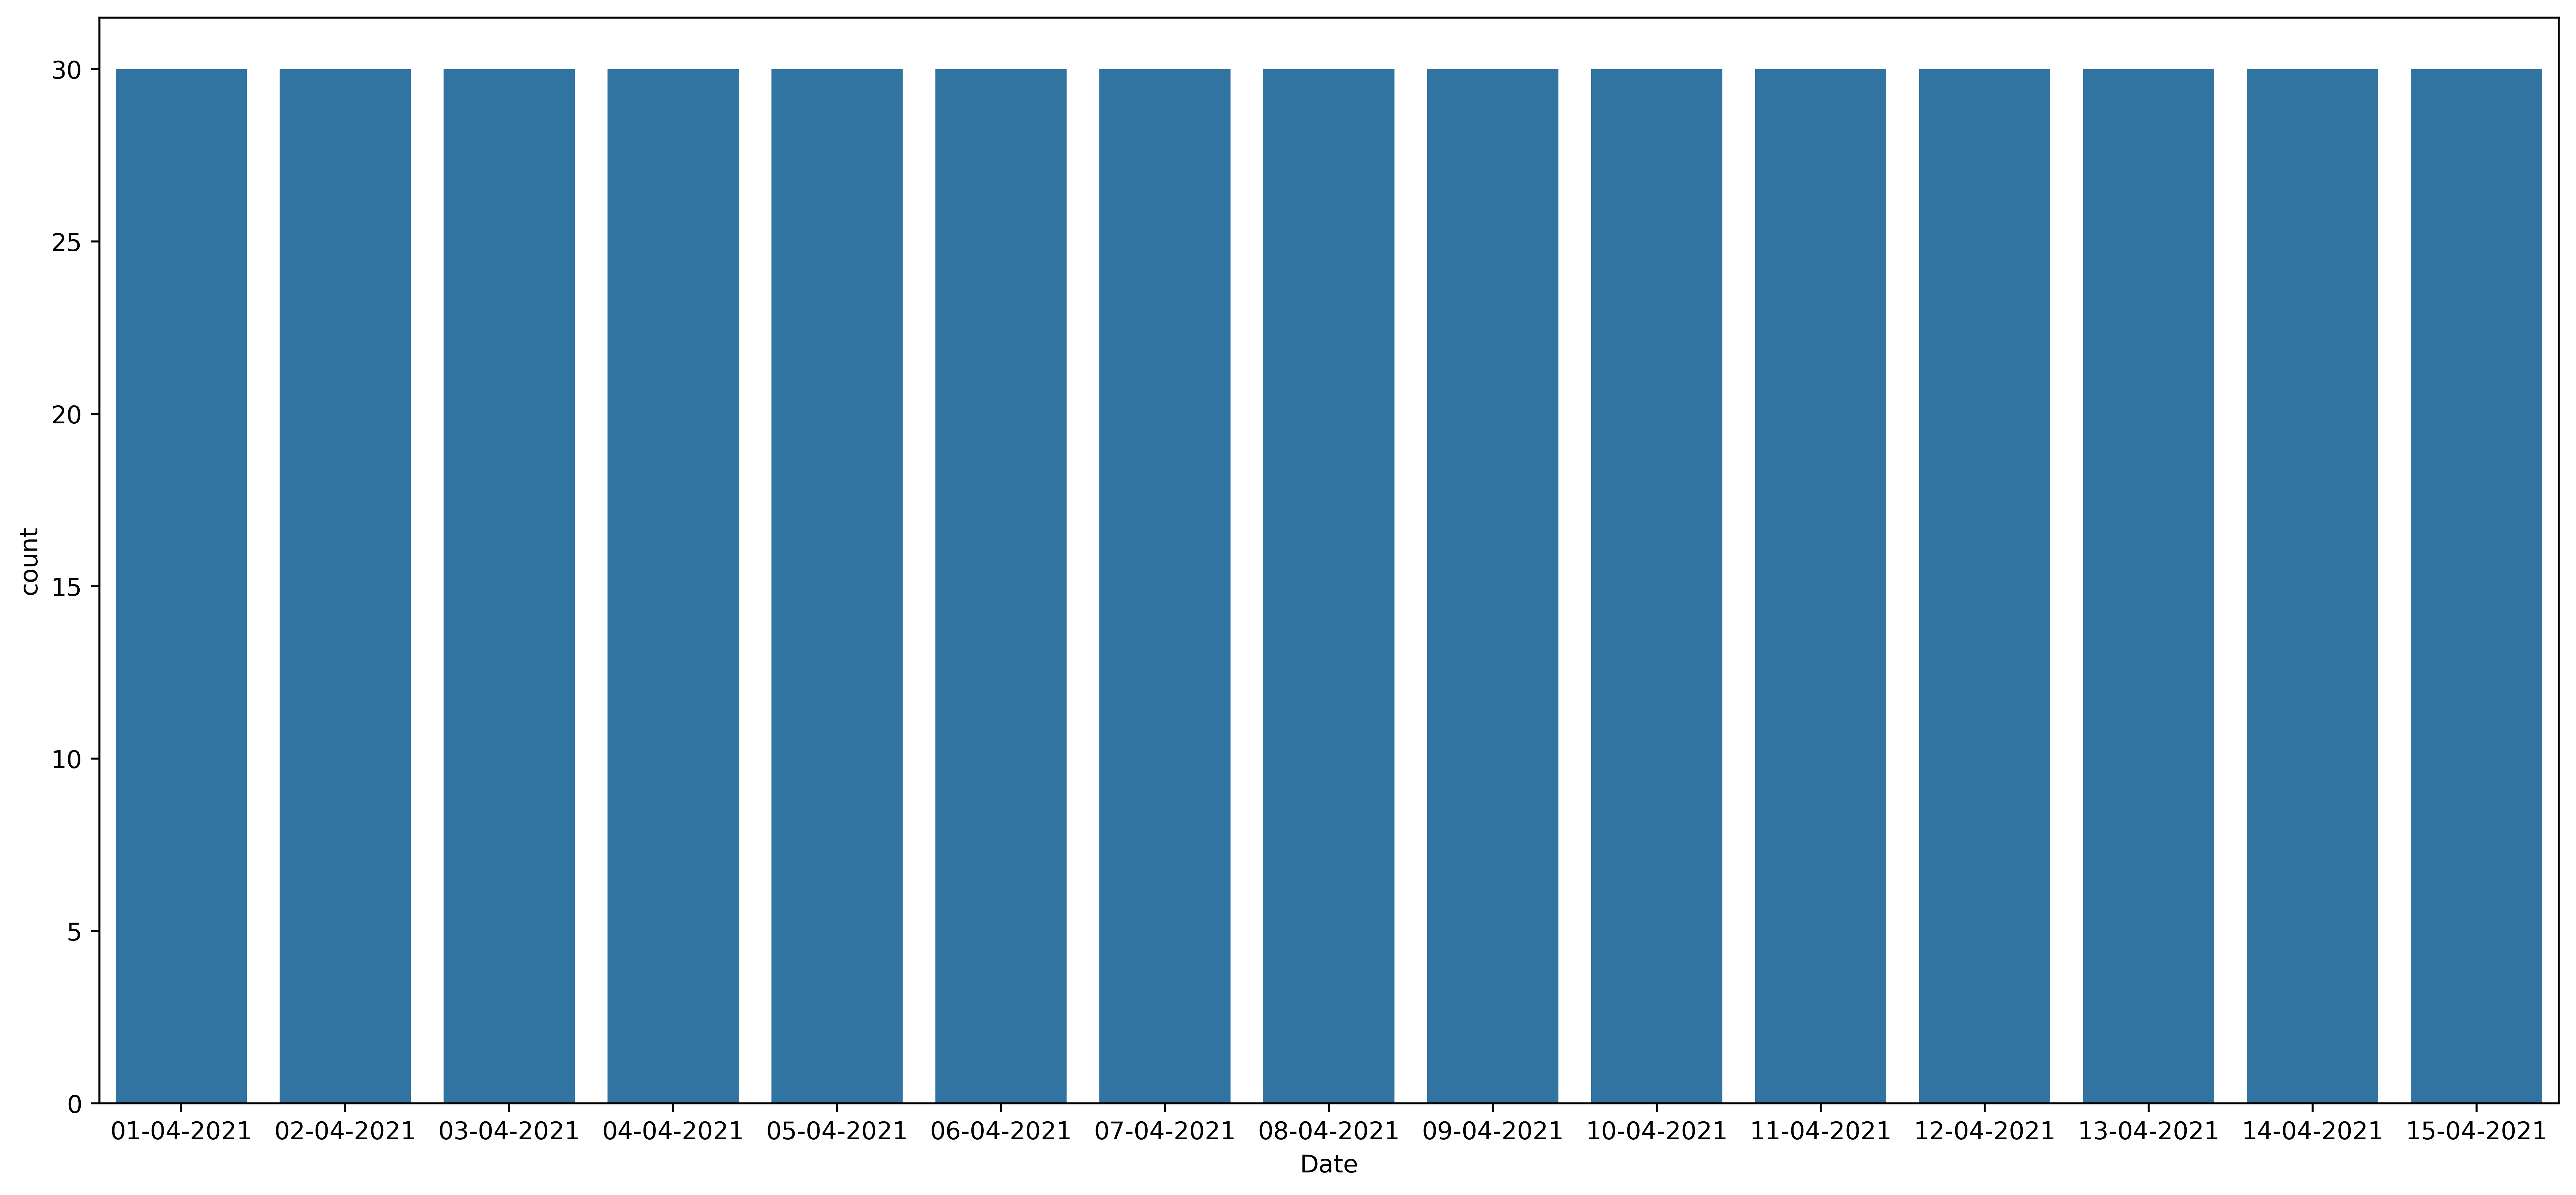

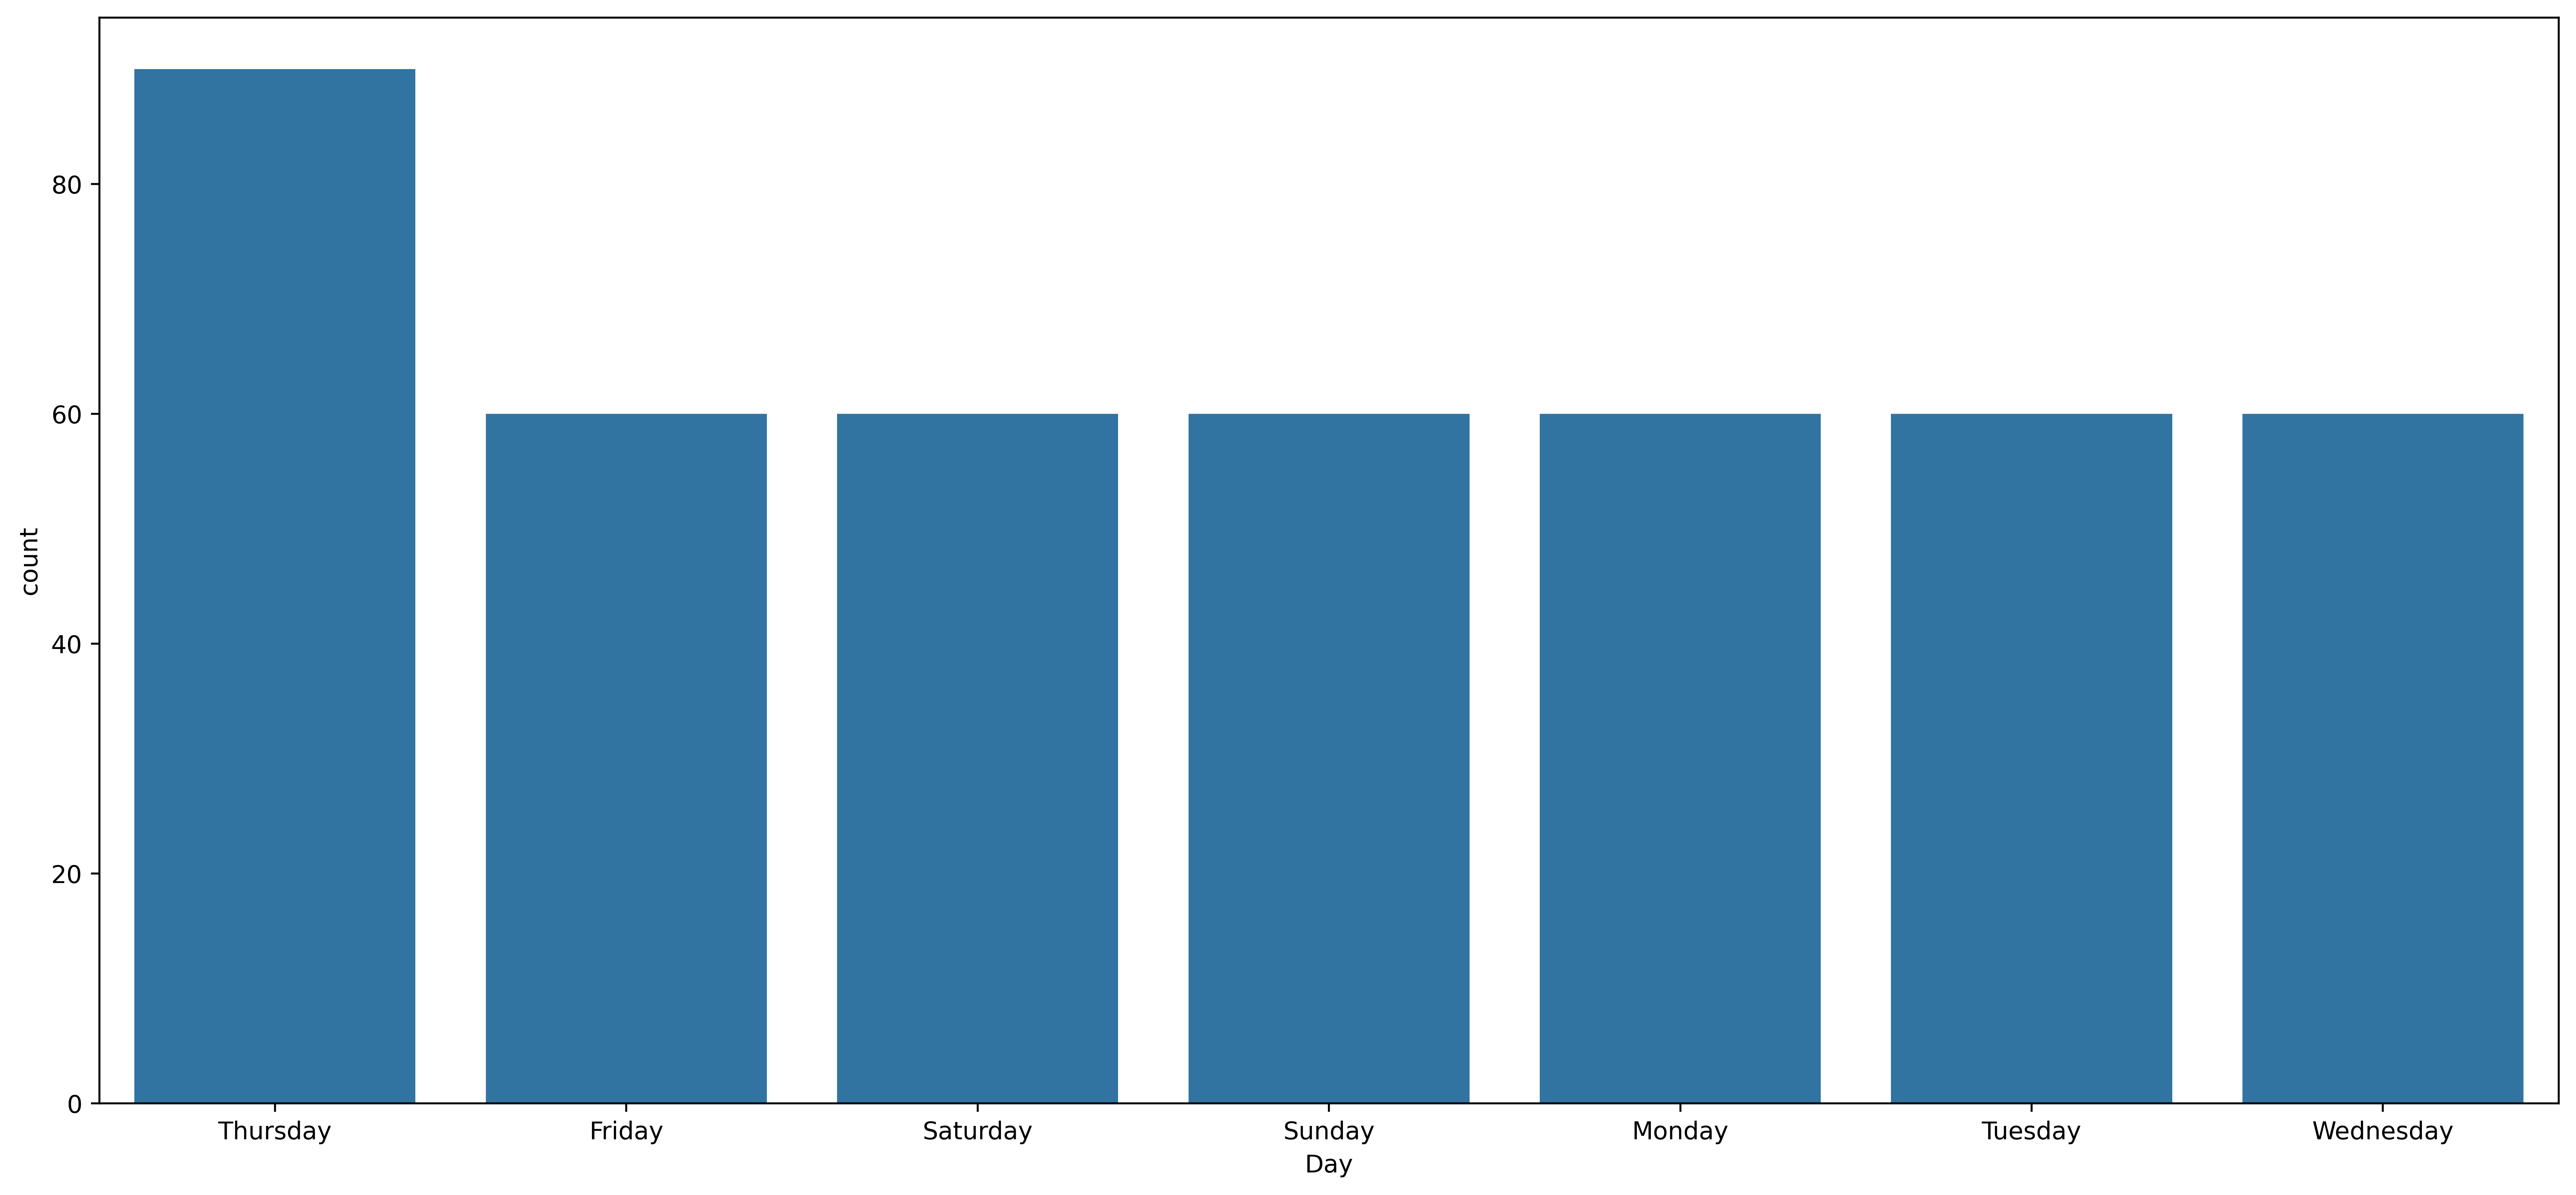

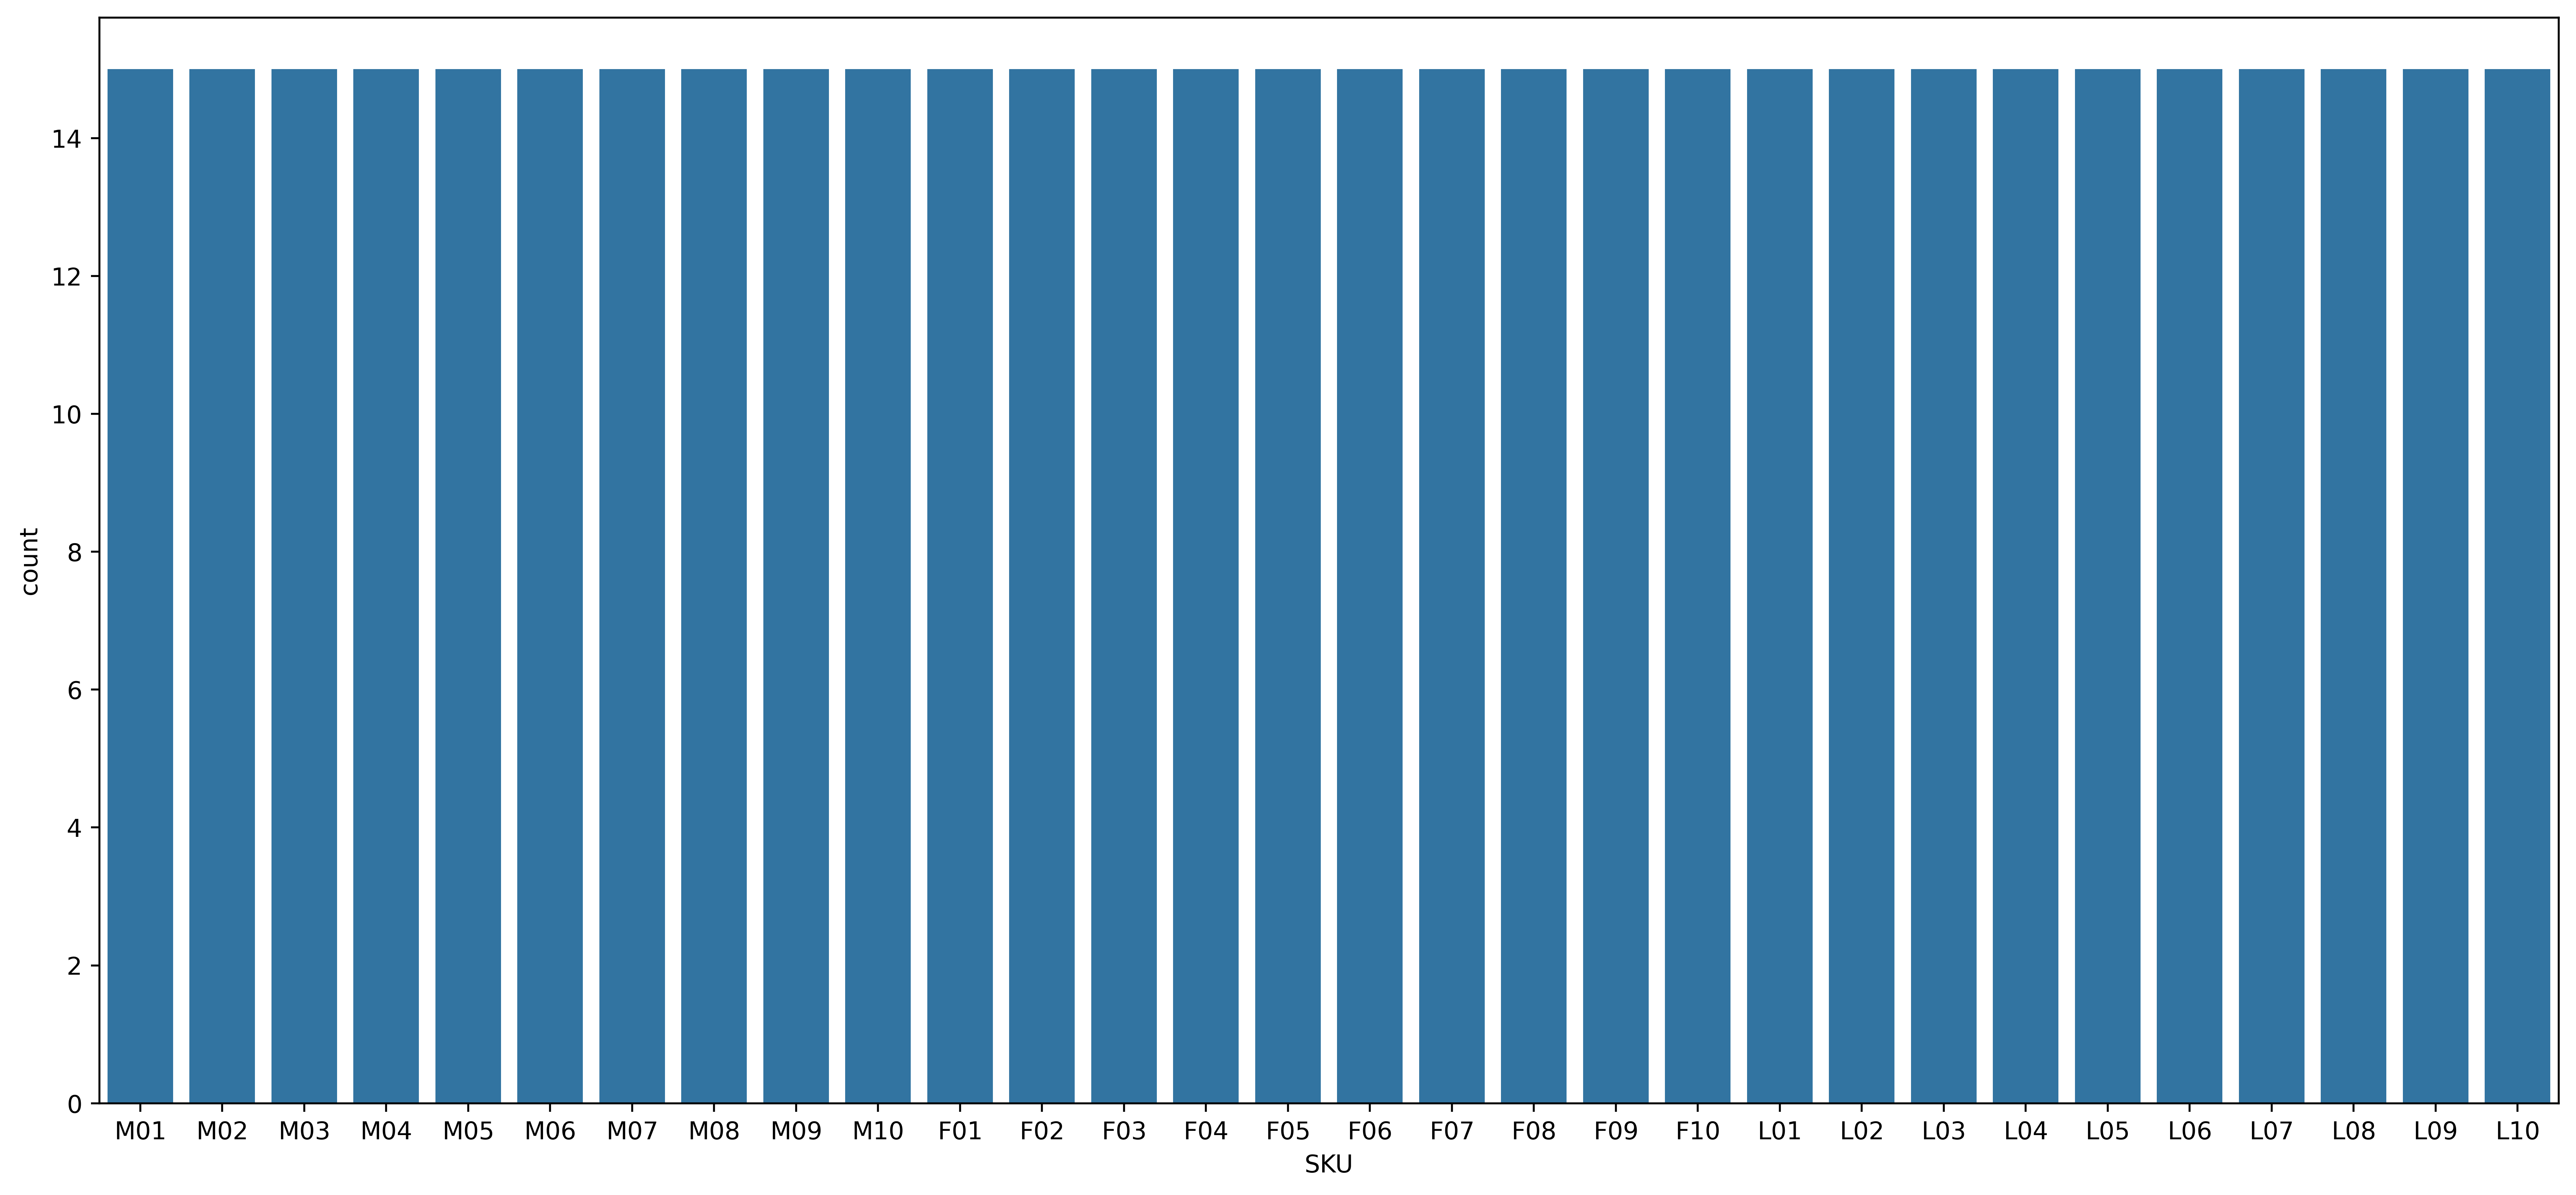

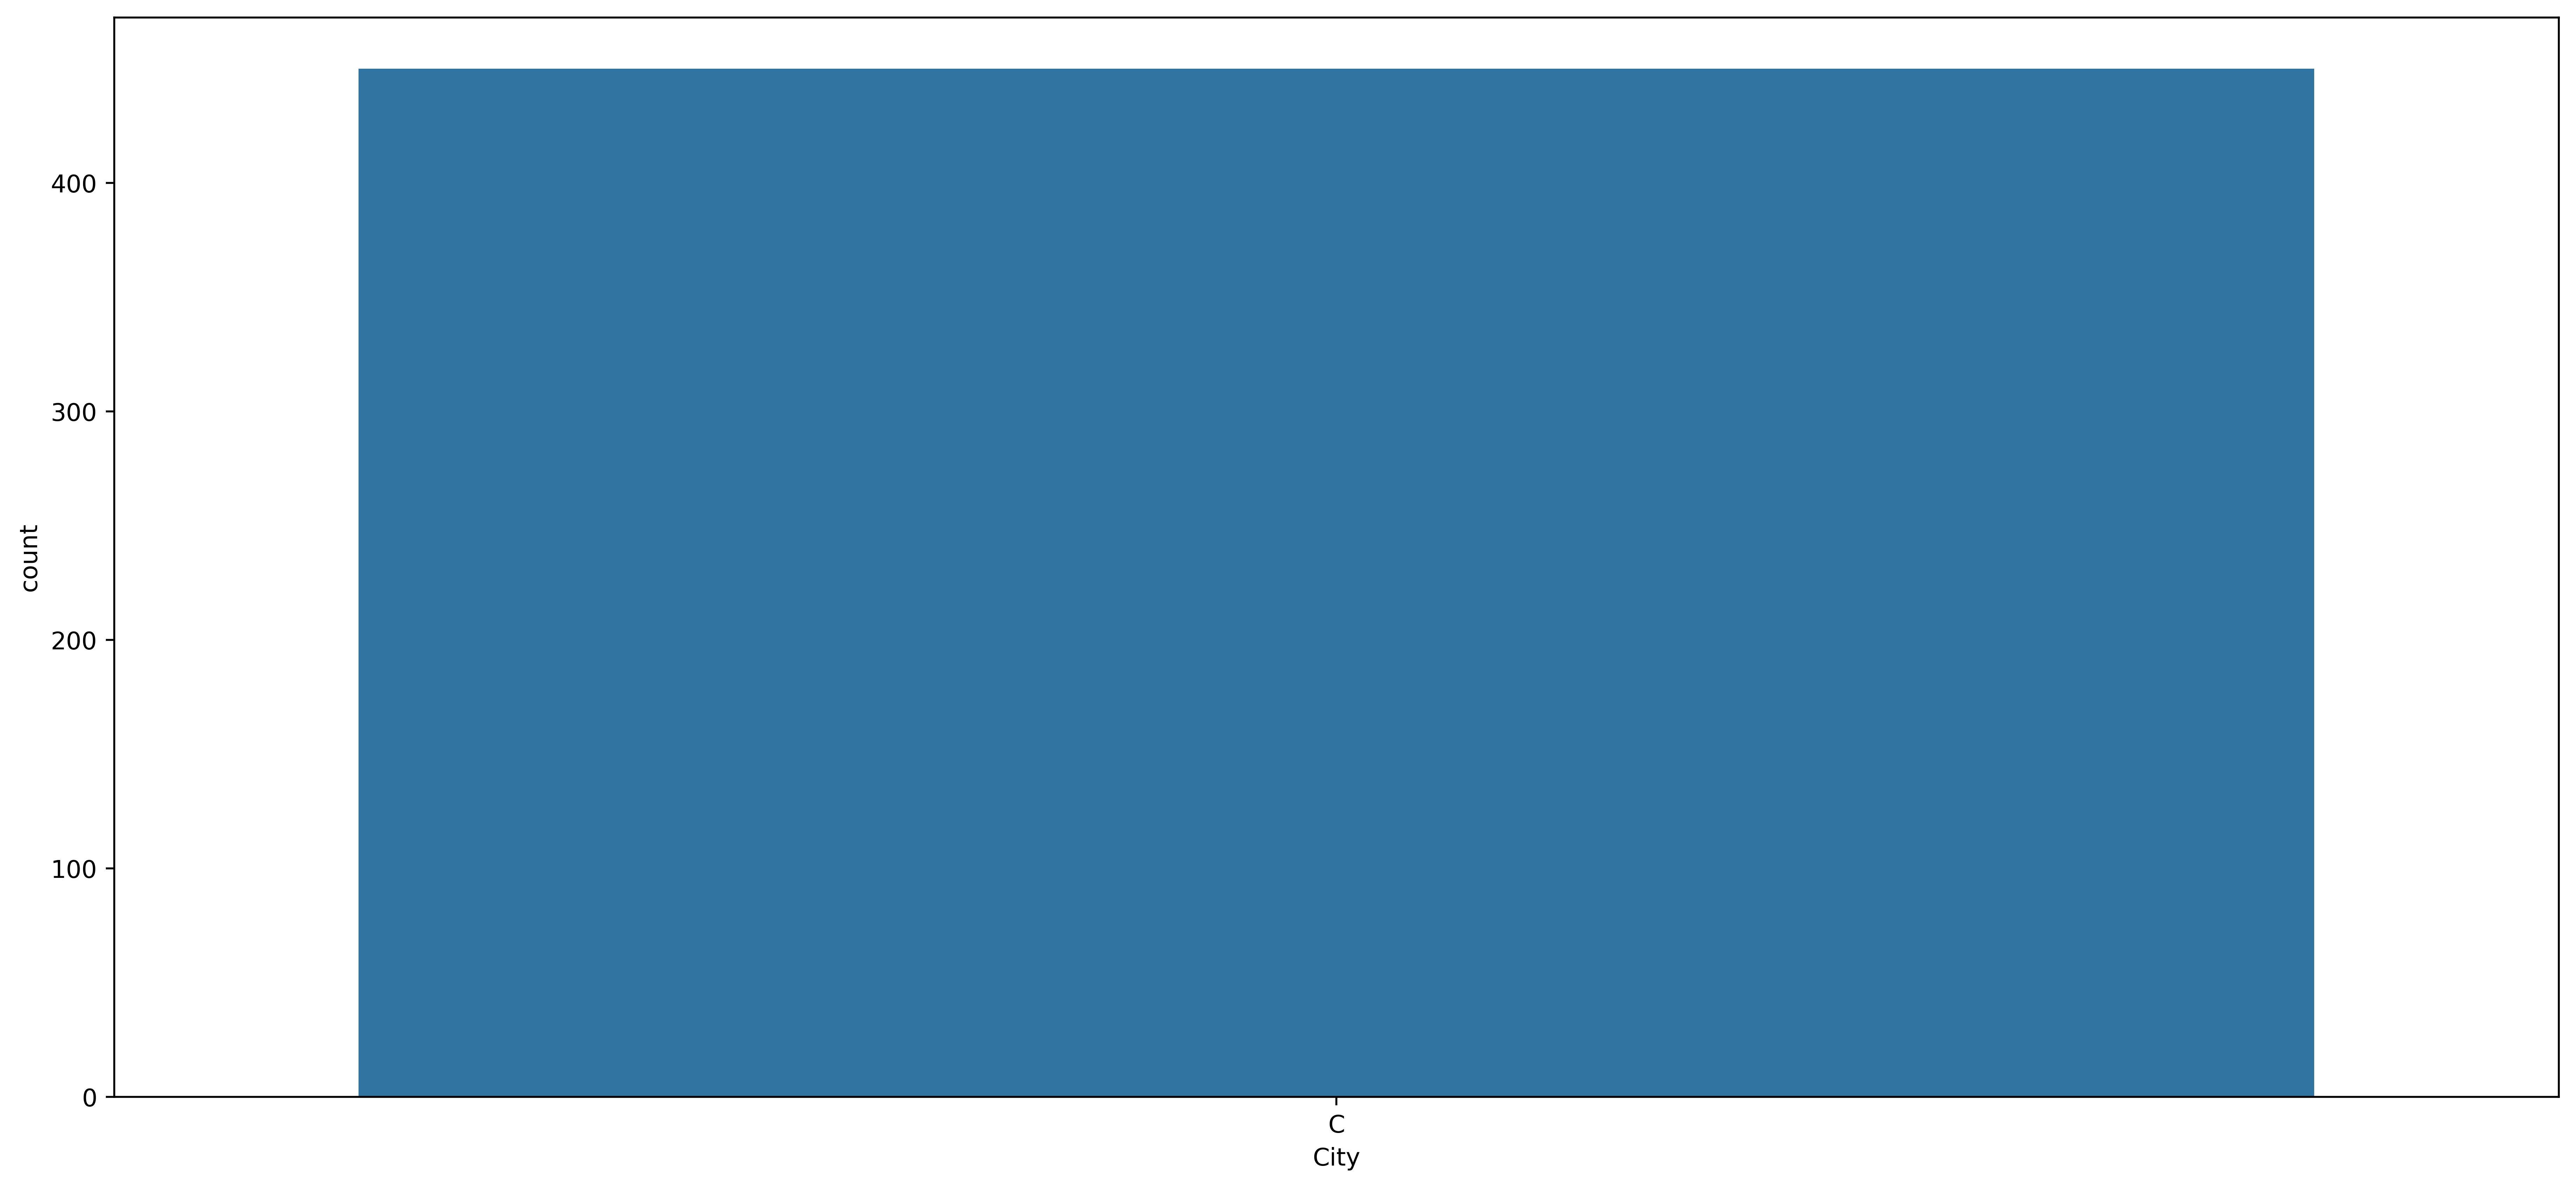

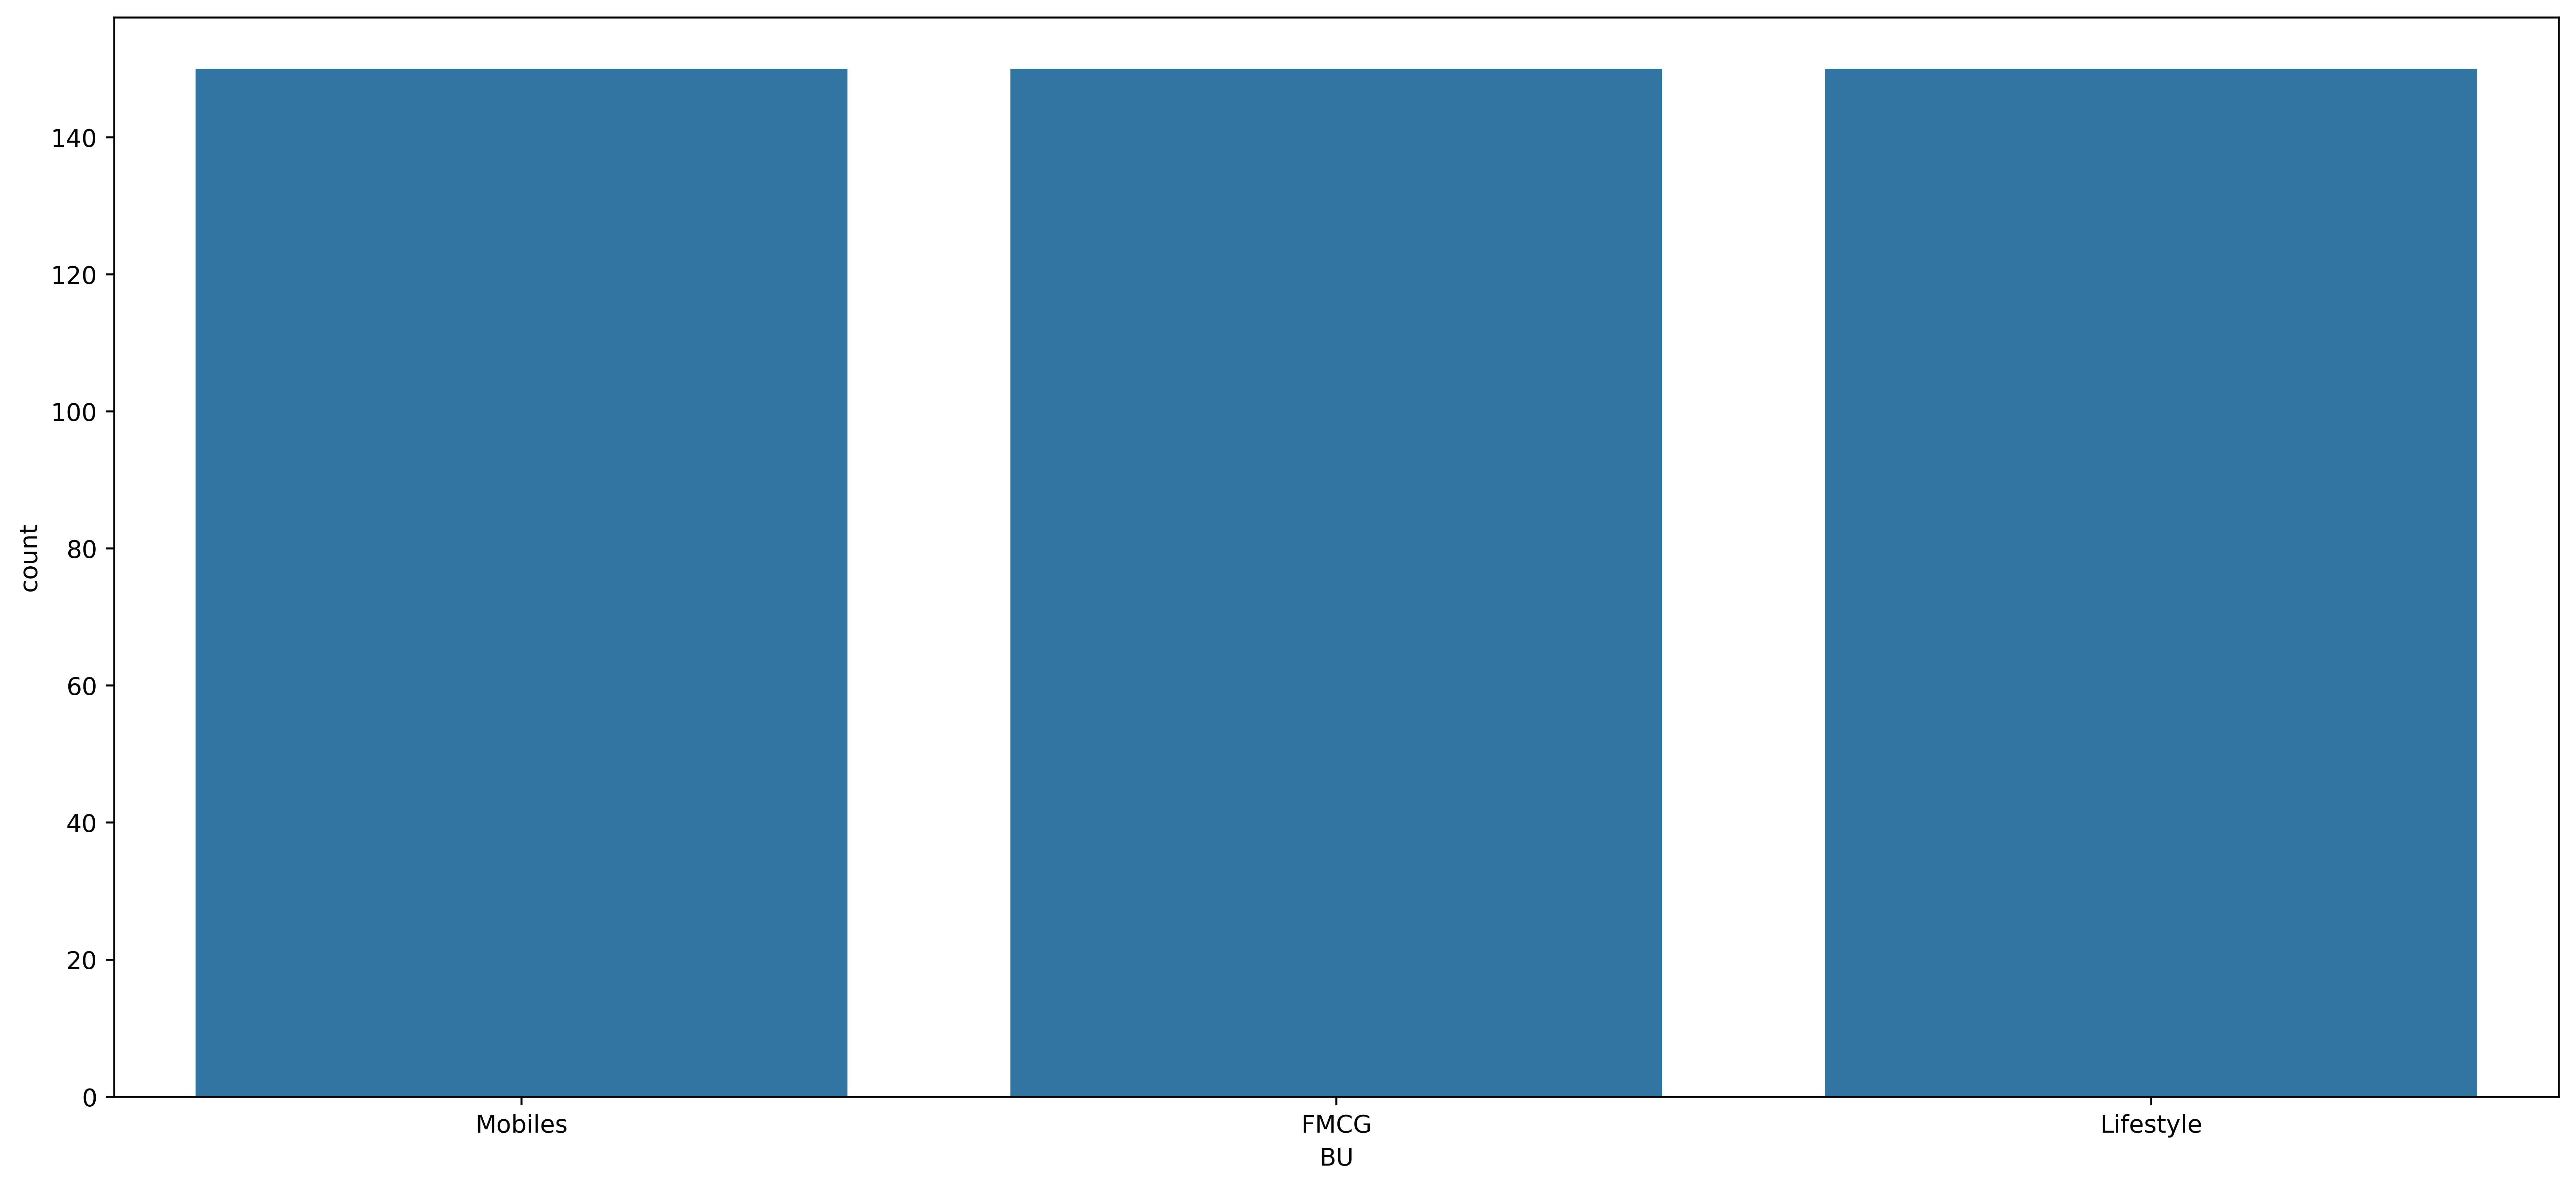

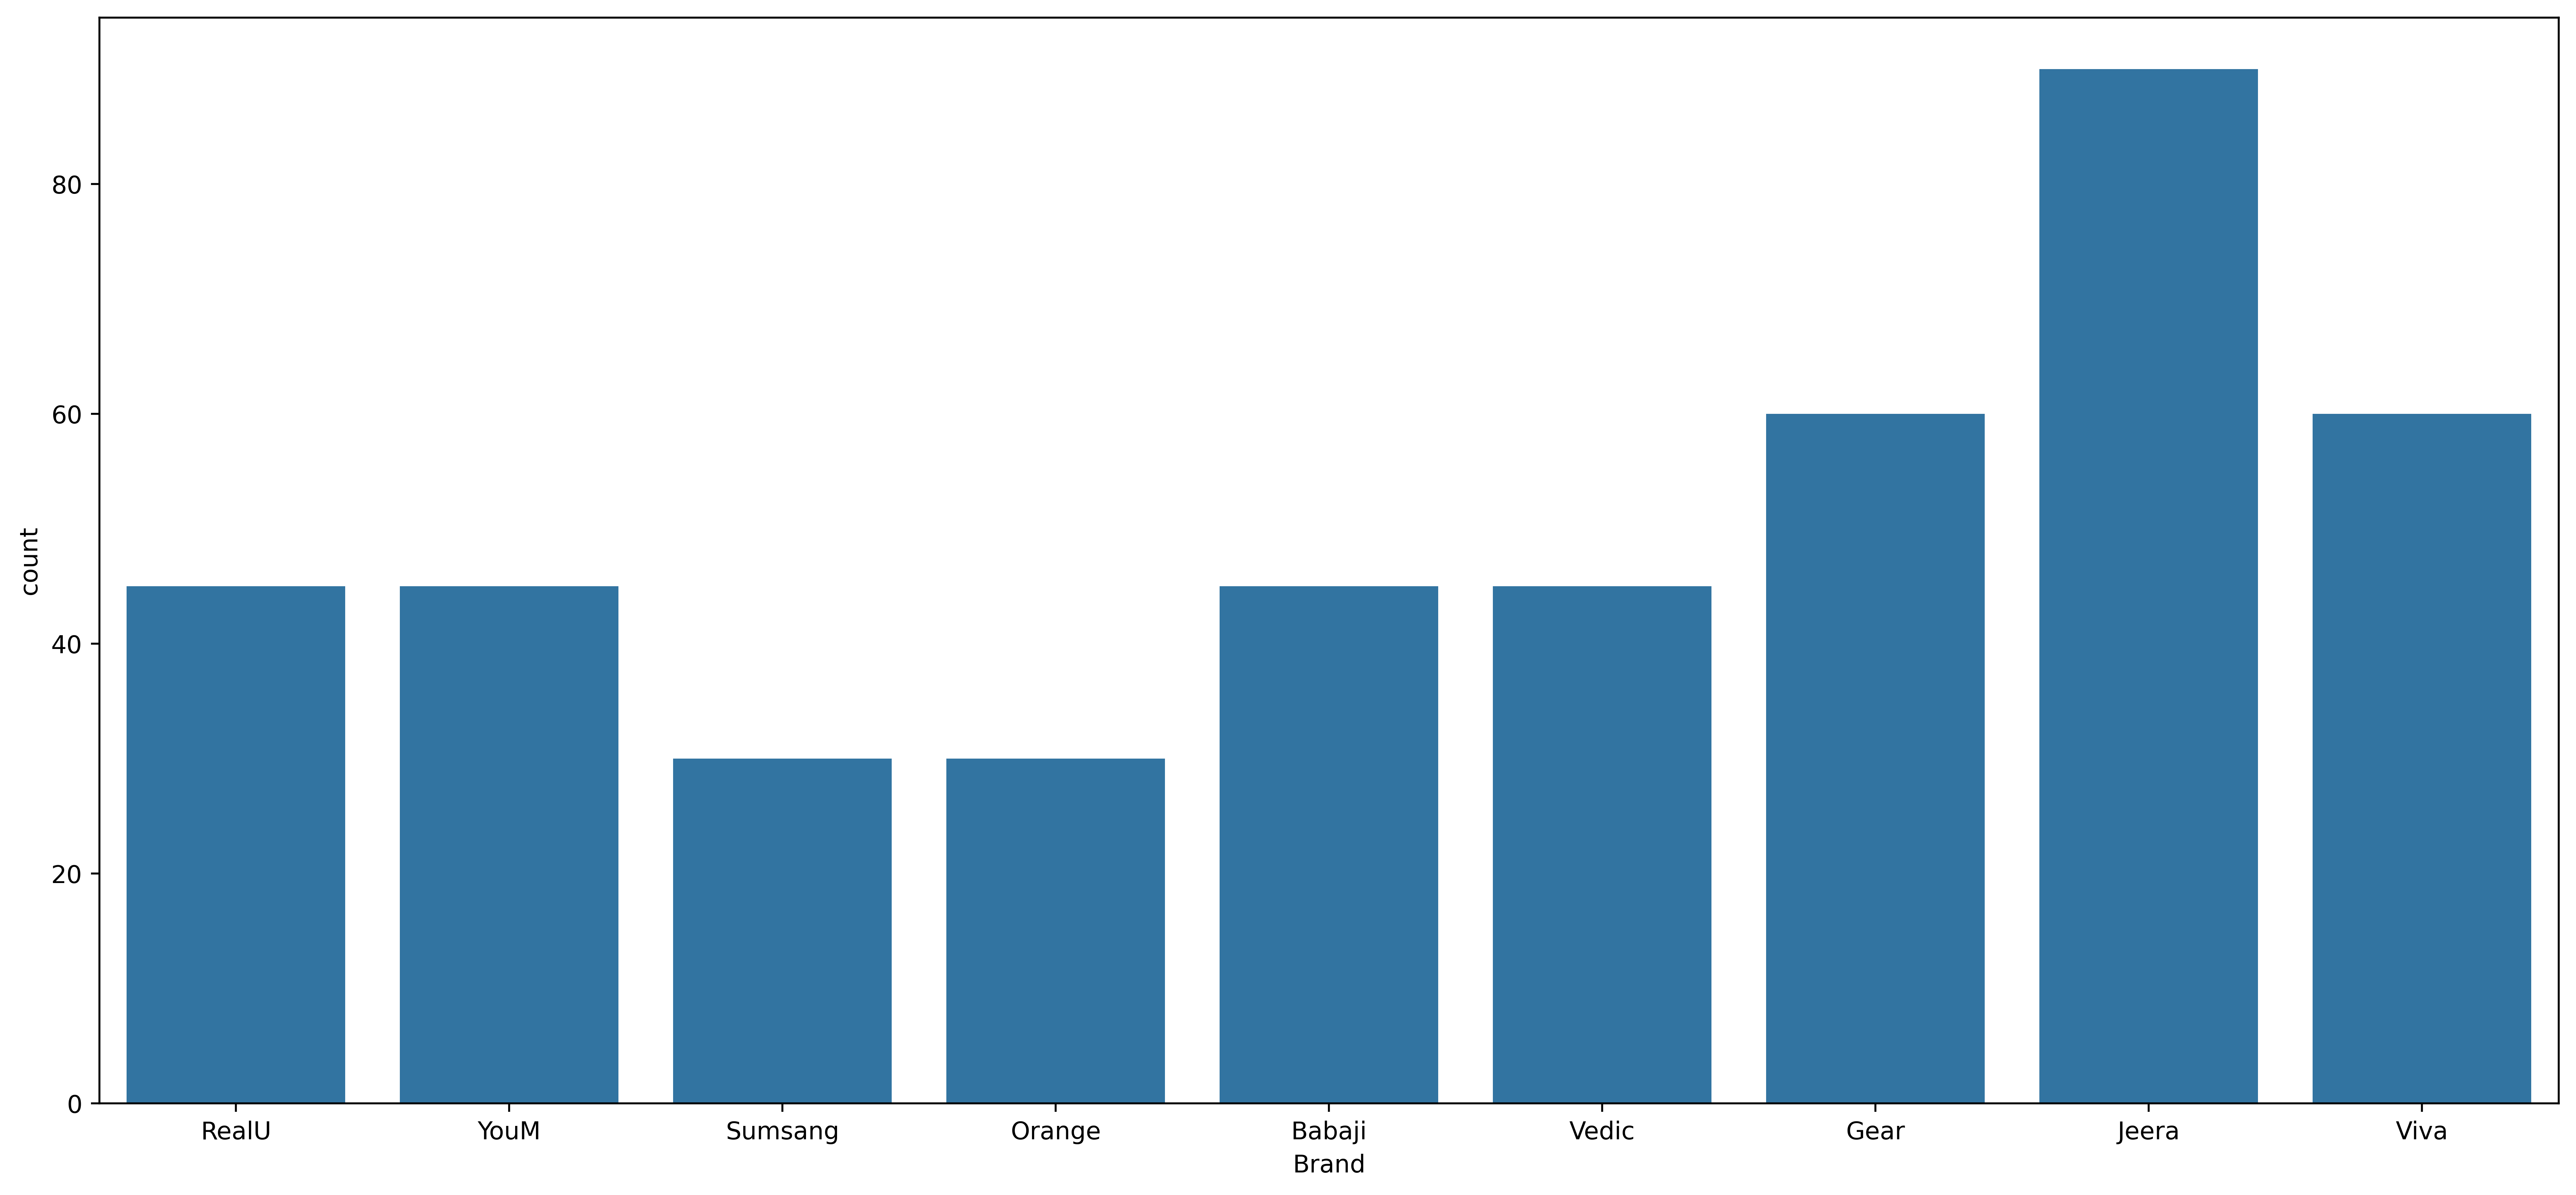

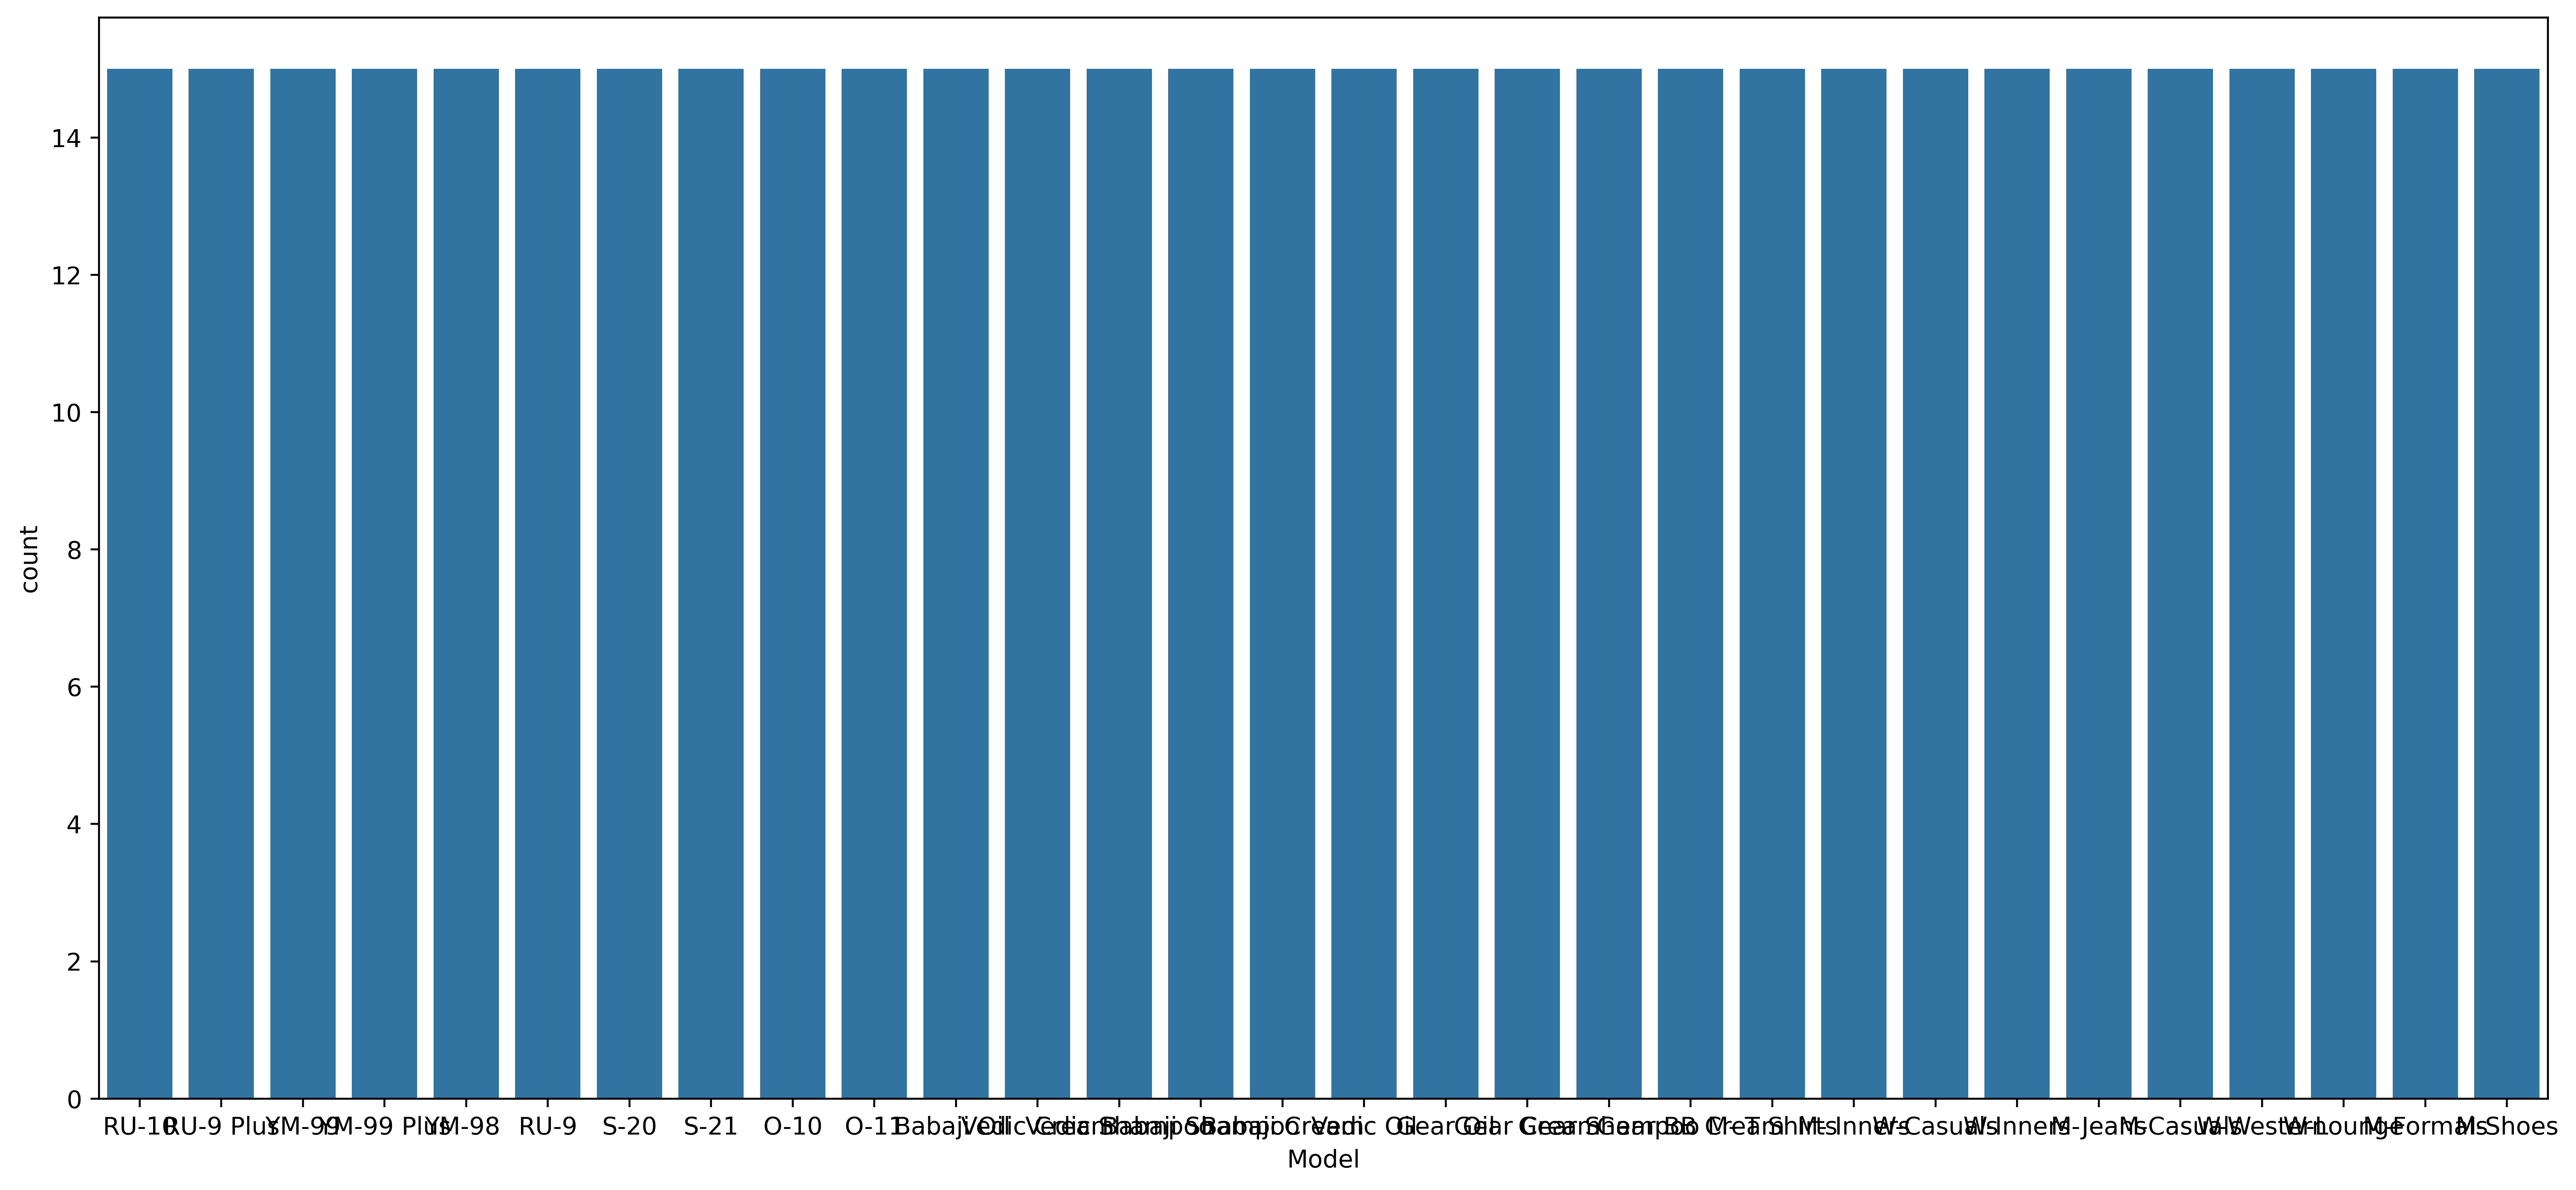

In [54]:
for k in categorical:
    plt.figure(figsize=(18,8))
    sns.countplot(x = df[k])

Provide a brief interpretation of these statistics.

In [ ]:
#Mean
#The mean provides a measure of central tendency, representing the typical value in a dataset. 
#It is sensitive to outliers, which can skew the mean if extreme values are present.

#median
#The median splits the dataset into two equal halves, with 50% of the values being below the median and 50% above.
#It is robust to outliers and skewed data, providing a better measure of central tendency when the data contains extreme values.

#Mode
#The mode indicates the most common value(s) in the dataset. 
#There can be more than one mode (bimodal or multimodal) if multiple values have the highest frequency. 
#The mode is useful for understanding the most typical value in categorical data or for identifying peaks in numerical data distributions.

In [55]:
#Standardization of Numerical Variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical] = scaler.fit_transform(df[numerical])

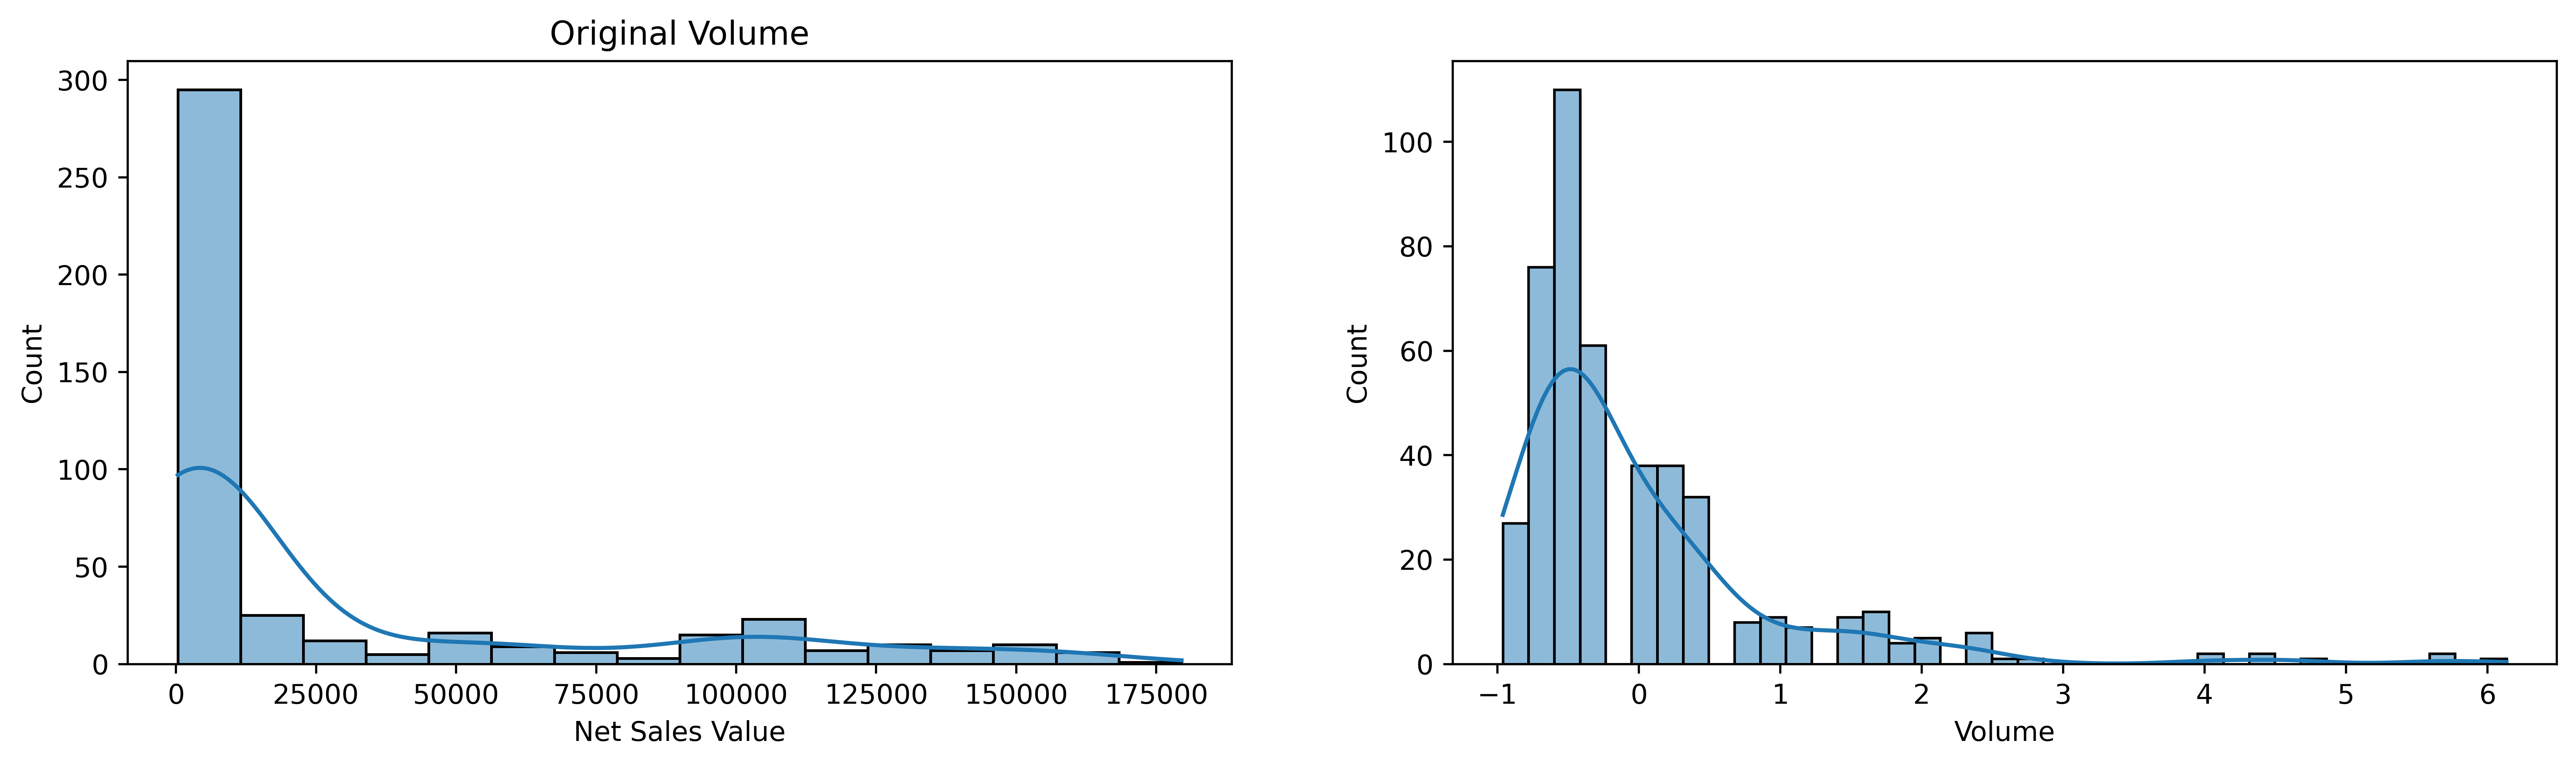

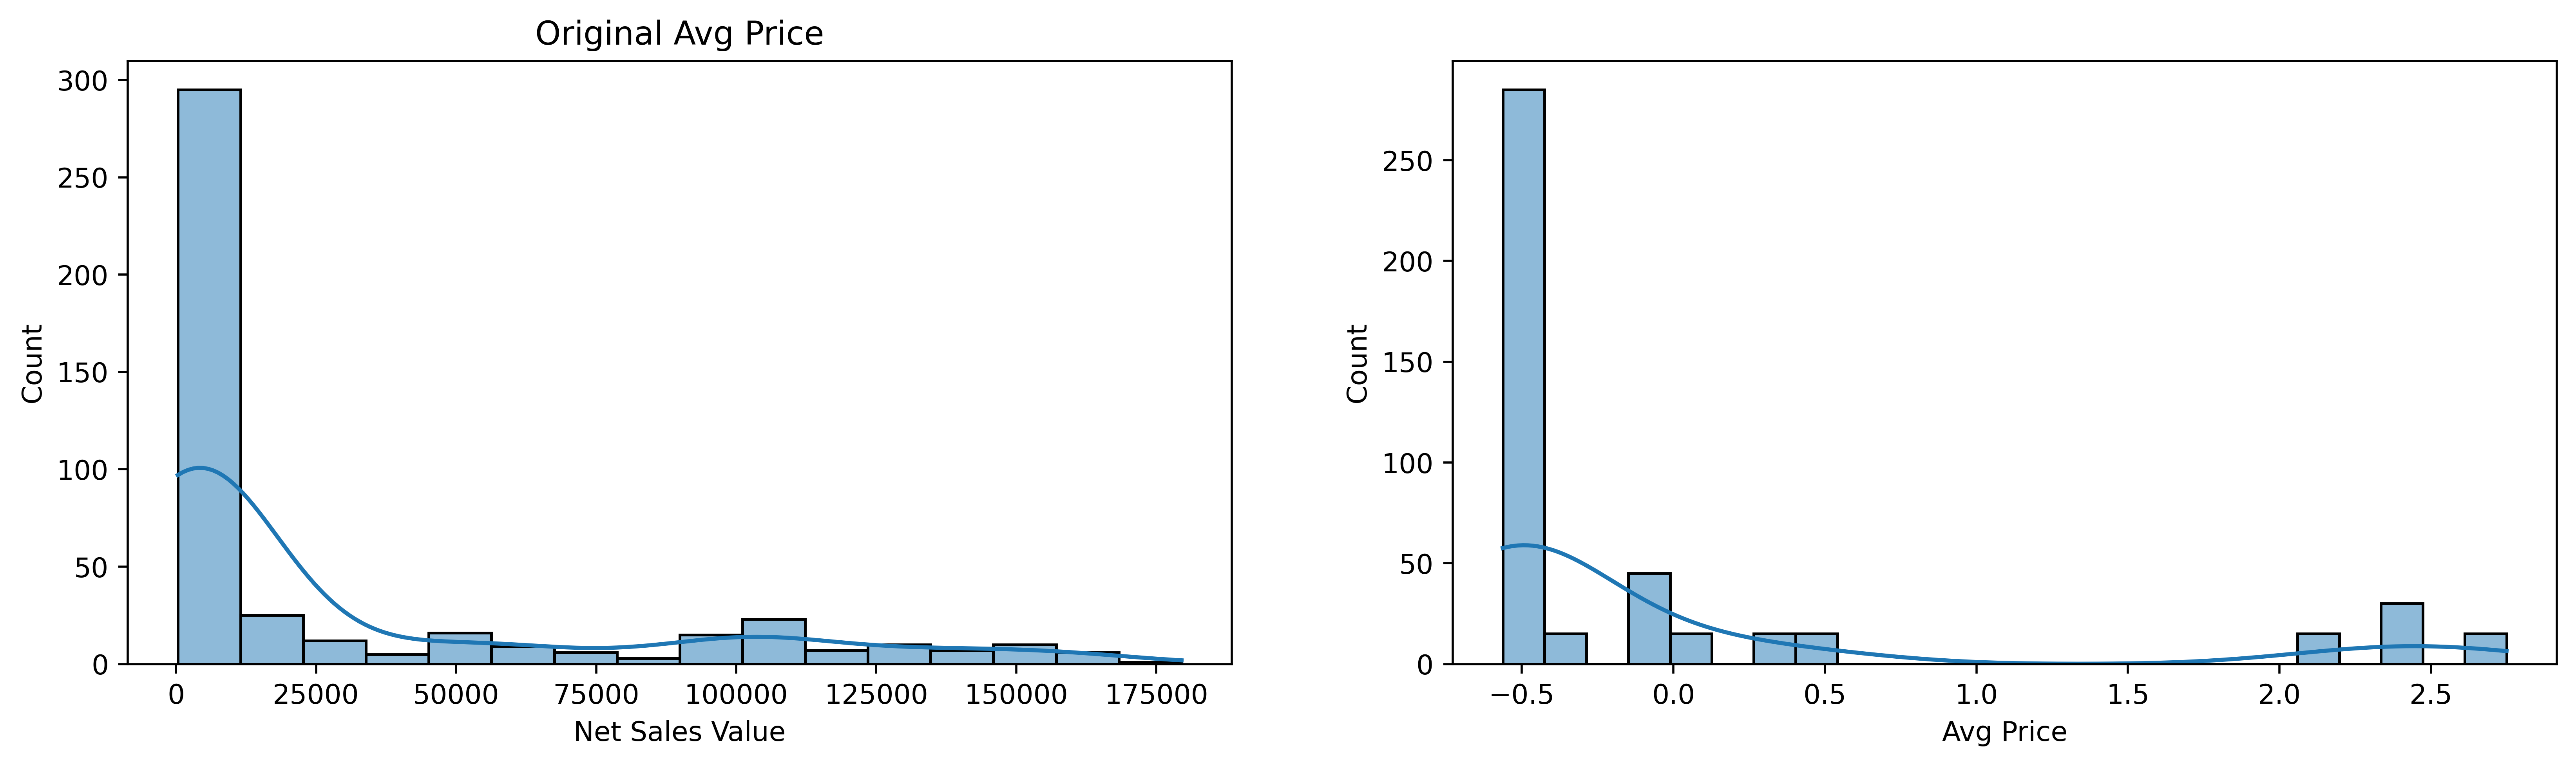

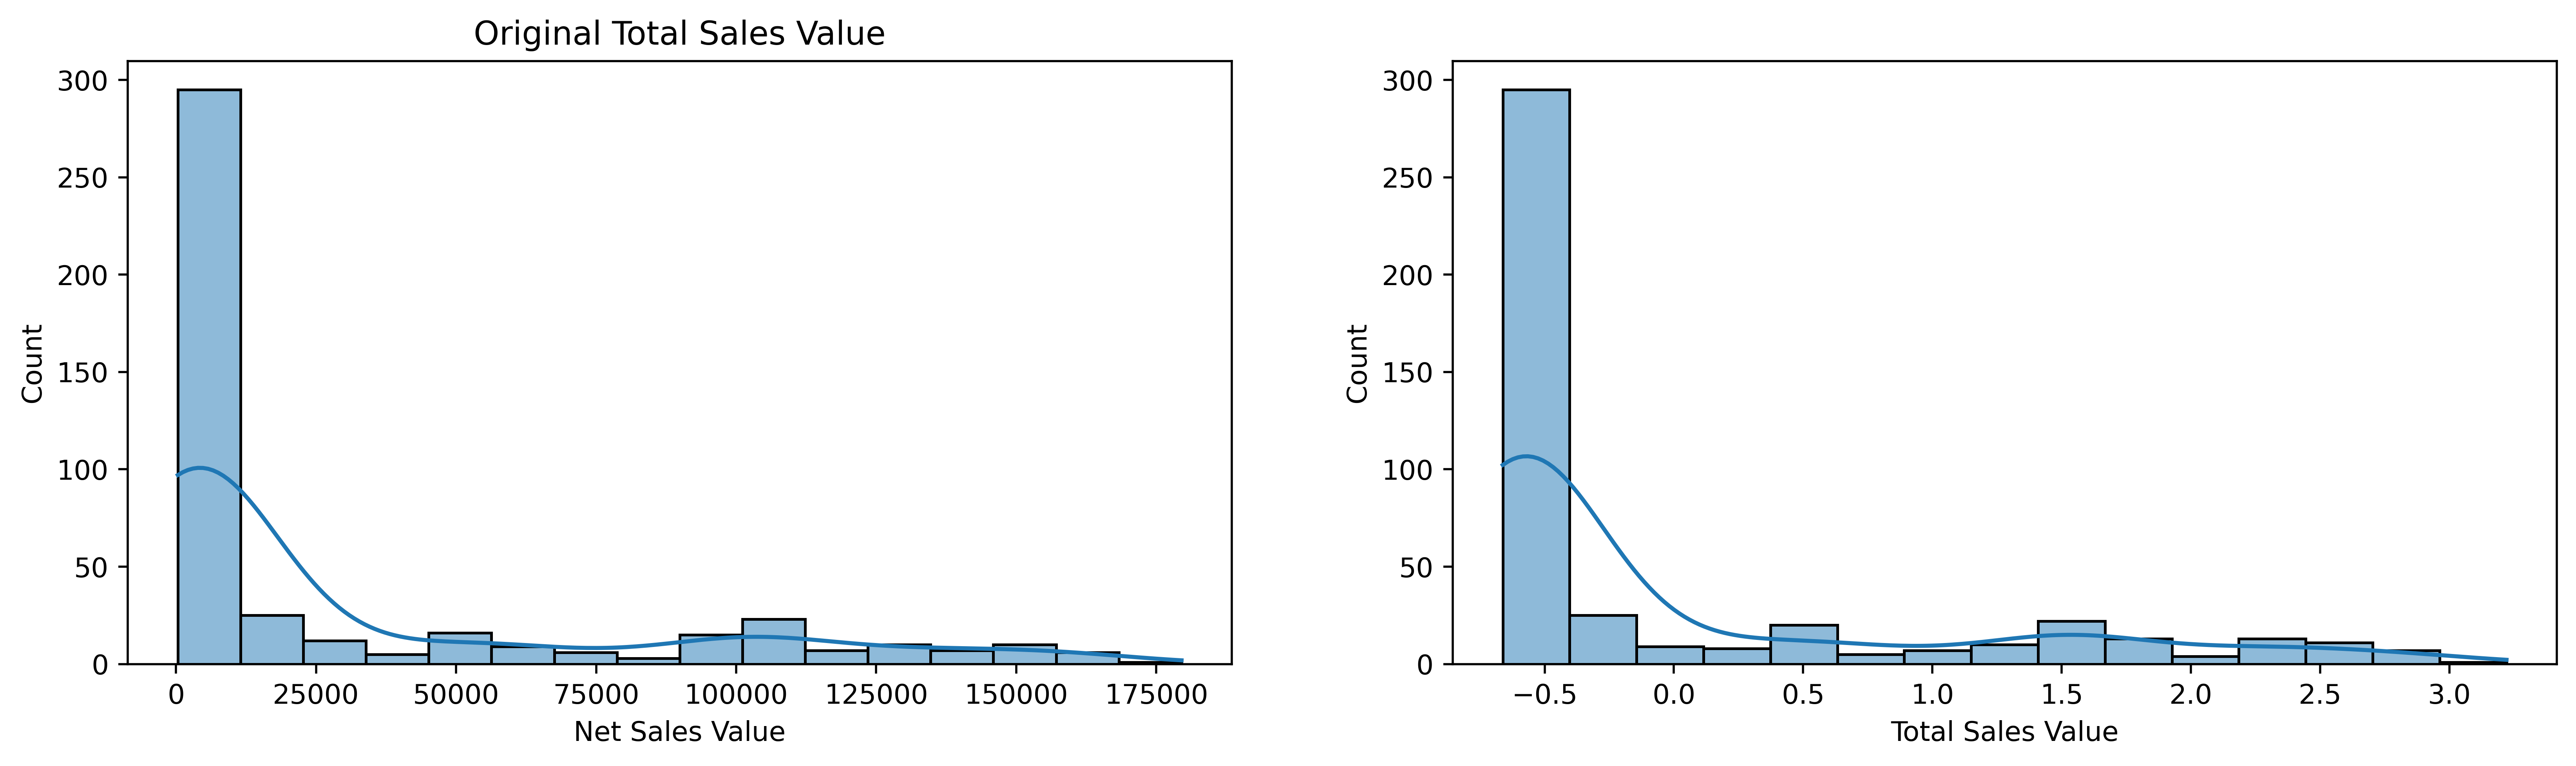

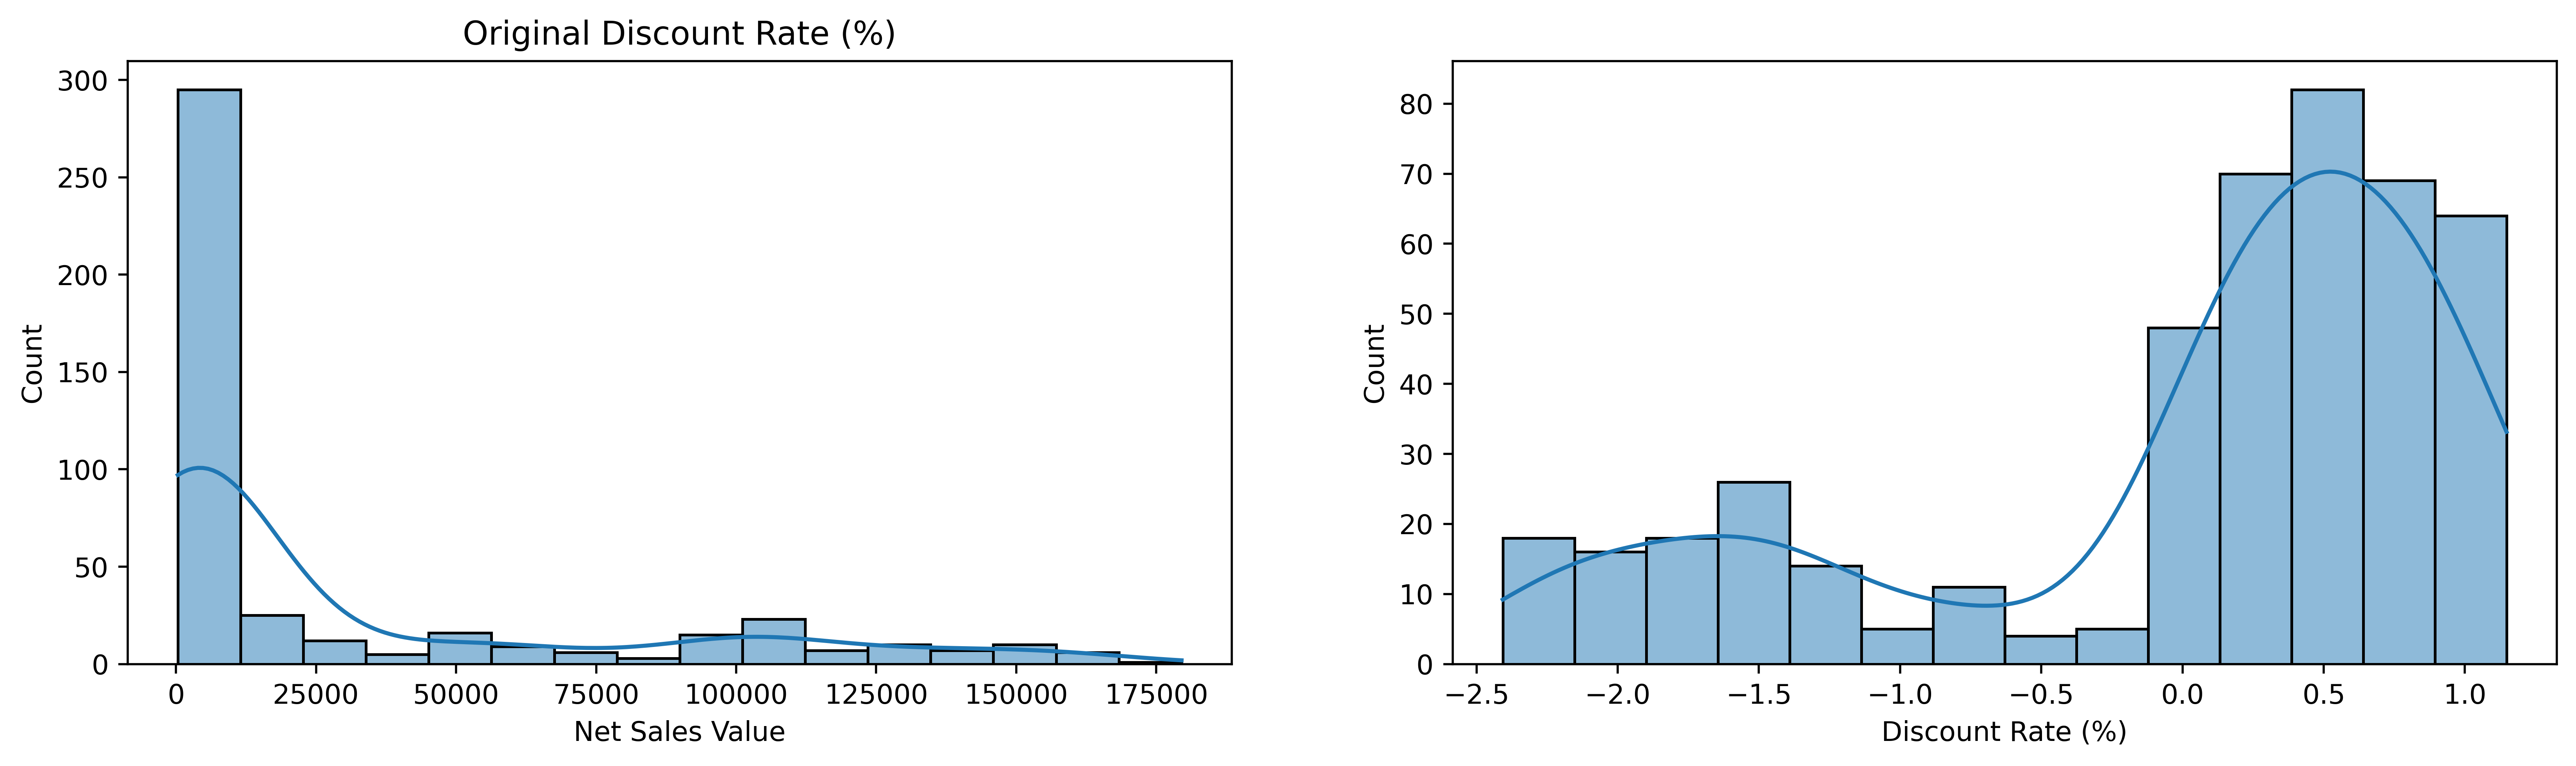

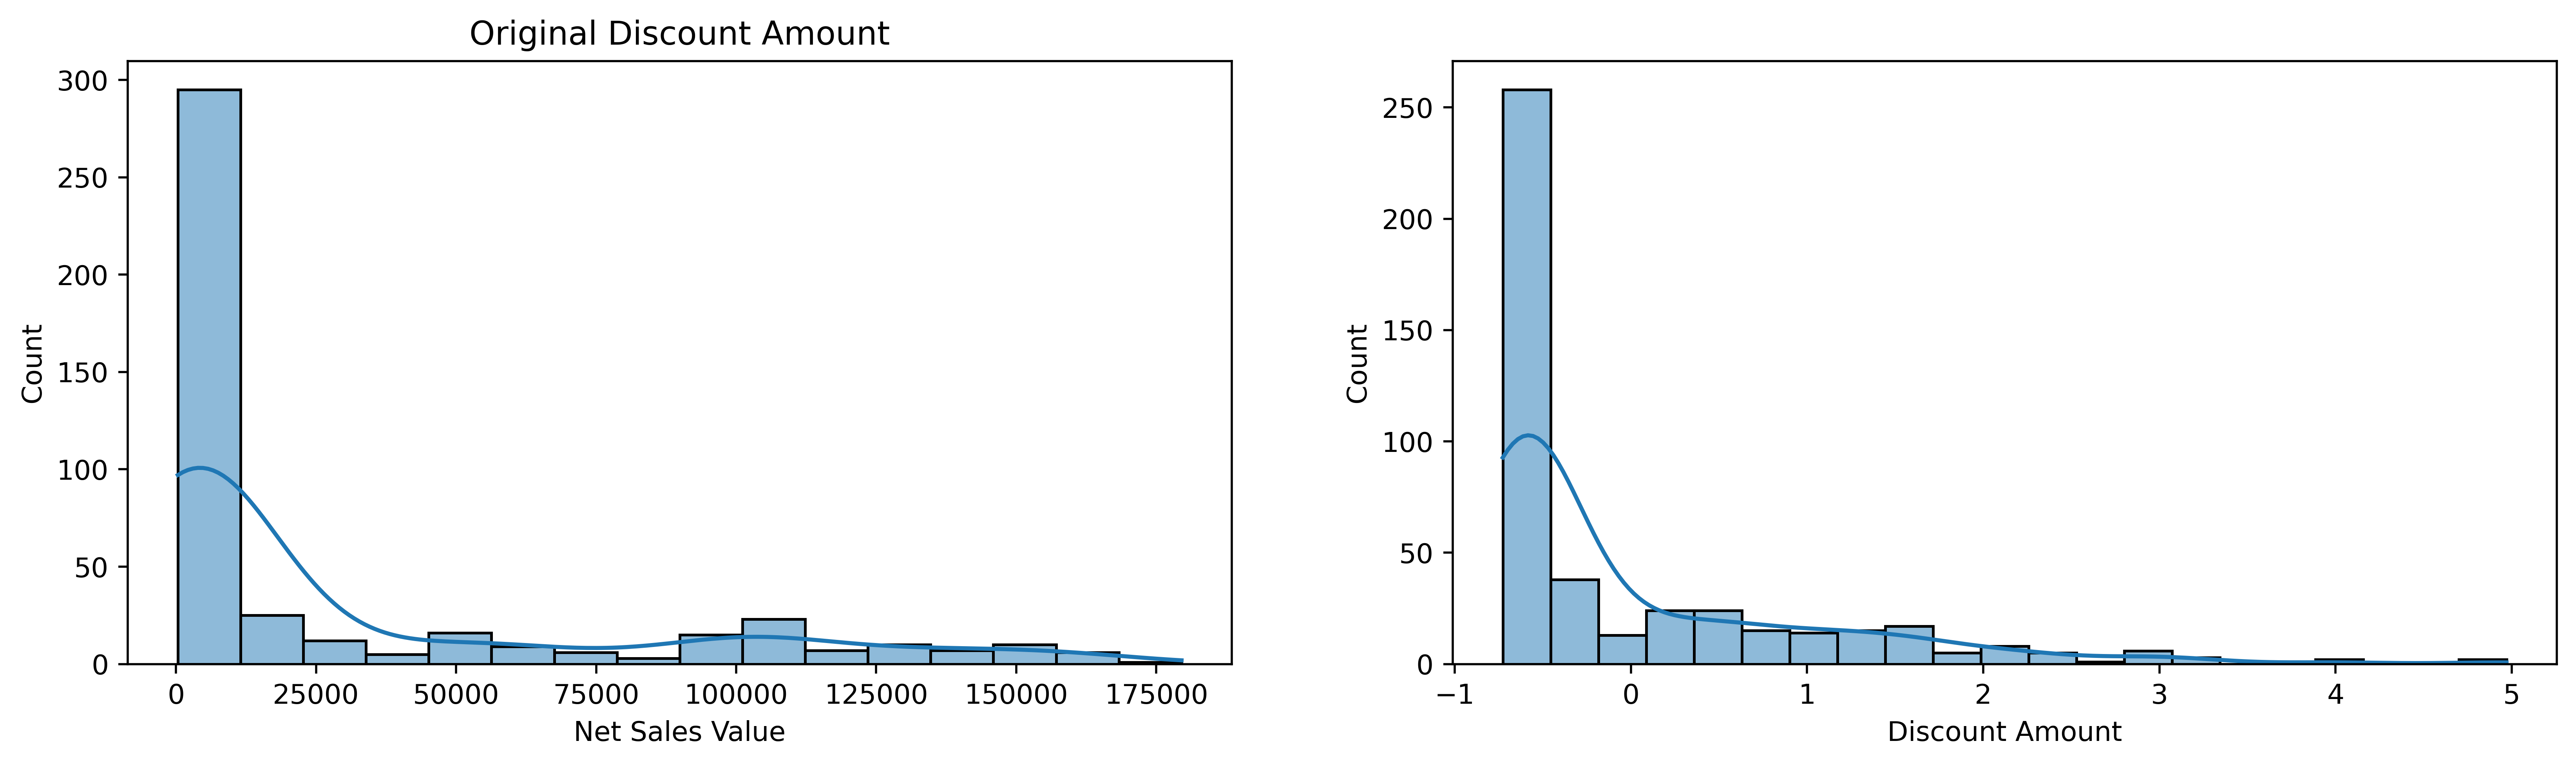

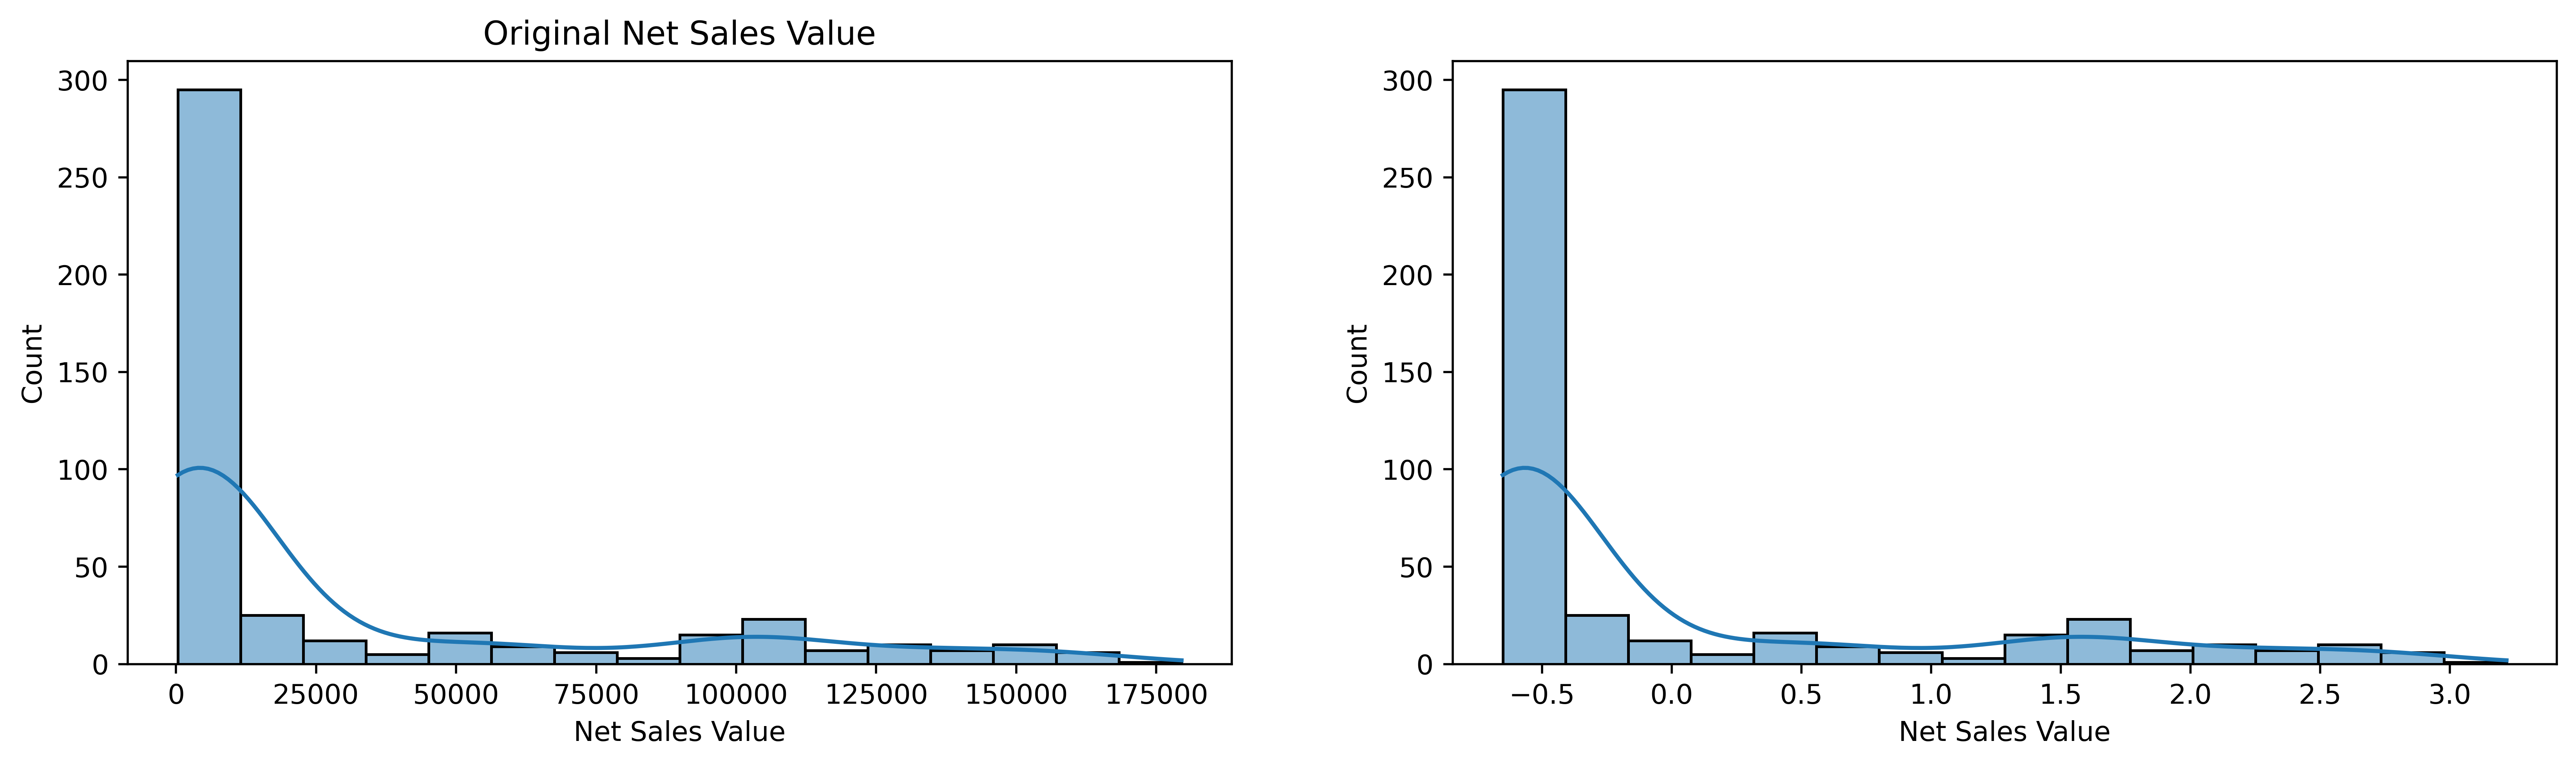

In [56]:
for col in numerical:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True)
    plt.title(f'Original {col}')
    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True)

In [ ]:
#Conversion of Categorical Data into Dummy Variables
#Discuss the need for converting categorical data into dummy variables (one-hot encoding).
#One-hot encoding is needed to convert categorical variables into a numerical format

One-hot encoding is needed to convert categorical variables into a numerical format

In [ ]:
#One-hot encoding is needed to convert categorical variables into a numerical format,because machine don't understand categorical values.
#preventing the model from assuming any oridanl realtionship between categories

In [57]:
df_encoded = pd.get_dummies(df, columns=categorical)

In [58]:
df_encoded

Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102961   
2         7      16100             112700           9.456886     10657.910157   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0      160346.501180                1                0                0   
1       89323.897039                1                0                0   
2      102042.089843                1                0                0   
3      112235.925298                1                0                0   
4       19927.053770                1                0                0   
..               ...              ...              ...              ...   
445      2197.632127                0                0                0   
446     12939.103758                0                0                0   
447      2593.102394                0                0                0   
448      4742.798174                0                0                0   
449      2624.667705                0                0                0   

     Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0                  0  ...                  0                0   
1                  0  ...                  0                0   
2                  0  ...                  0                0   
3                  0  ...                  0                0   
4                  0  ...                  0                0   
..               ...  ...                ...              ...   
445                0  ...                  0                0   
446                0  ...                  0                0   
447                0  ...                  0                0   
448                0  ...                  0                0   
449                0  ...                  0                0   

     Model_Vedic Shampoo  Model_W-Casuals  Model_W-Inners  Model_W-Lounge  \
0                      0                0               0               0   
1                      0                0               0               0   
2                      0                0               0               0   
3                      0                0               0               0   
4                      0                0               0               0   
..                   ...              ...             ...             ...   
445                    0                0               0               0   
446                    0                0               0               0   
447                    0                0               0               1   
448                    0                0               0               0   
449                    0                0               0               0   

     Model_W-Western  Model_YM-98   Model_YM-99  Model_YM-99 Plus  
0                  0             0            0                 0  
1                  0             0            0                 0  
2                  0             0            1                 0  
3                  0             0            0                 1  
4                  0             1            0                 0  
..               

# Conclusion

Summarize the key findings from the descriptive analytics and data visualizations.

In [59]:
#Descriptive statistics provided insights into the central tendency and variability of numerical data.
#Histogram and Boxplot hepls to visualize the distribution and identify outliers
#Barchart is used for frequency distribution for categorial values

Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

In [ ]:
#Standardization ensures numerical features contribute equally to the analysis.
#One-hot encoding makes categorical data suitable for machine learning models, enabling effective model training and prediction.